# **Strategic Marketing Analysis: Data-Driven Insights for High-Impact Promotions Across Customers, Products, and Campaigns**

created by Faaza Naima

**Supermarket Customers Data Dictionary**

 People
 - ID:Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
 
 Products
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
 
 Promotion
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
 
 Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to the company’s website in the last month

# 1. Business Understanding
- Defining Problem
- Project Objective
- Solution Requirements

#### 1) Analytical Approach
- Descriptive
- Diagnostic
- Prescriptive

1. Descriptive Analytics (What Happened?)
    - What is the overall success rate of our campaigns?
2. Diagnostic Analytics (Why Did It Happen?)
    - Which campaign led to the highest increase in revenue, and what factors contributed to its success?
    - How do customer characteristics (e.g., generation, education, income, family size) influence buying behavior?
    - Are frequent discount users driving long-term value or primarily responding to short-term deals?
3. Prescriptive Analytics (What Should We Do Next?)
    - Which marketing strategy (discount vs. campaign) is more effective for revenue growth?
    - Which customer segments should be prioritized to maximize campaign impact?
    - Which product combinations are frequently bought together and could be bundled to increase basket size?
    - When is the optimal time to launch a campaign for the greatest business impact?
    - Which sales channel should be prioritized based on performance and customer preference?

#### 2) Data Requirement

2.a. What Data

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 2. Data Understanding

#### 1) Data Requirement

1.a. What Format

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [28]:
# Identifies columns with less than 2 unique values, which may be unnecessary for analysis
df.nunique()[df.nunique() < 2]

Z_CostContact    1
Z_Revenue        1
dtype: int64

In [29]:
df.drop(columns=df.nunique()[df.nunique() < 2].index, inplace=True)

#### 2) Data Collection

- Data Sources  : Customer Behavioral and Demographic Data includes Demographic Data (age, education, income, marital status, household details), Behavioral DataPurchase (history, website visits, complaints, recency), and Promotion & Engagement Data (Campaign responses, discount purchases, loyalty interactions)
- Data Location : Public Data
- Data Format   : The dataset is a digital text file in tabular format
- Data Types    : The dataset consists structured data includes integer, float, and categorical (object) columns
- Data Access   : File-based data processing

#### 3) Exploratory Data Analysis

- Descriptive statistics
- Data Visualization
- Data Profiling

In [53]:
# Dividing the dataset into People, Products, Promotion, and Place for structured analysis
df_people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']]

df_products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds']]

df_promotion = df[['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                   'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

df_place = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
               'NumWebVisitsMonth']]

# Here’s a breakdown of each category:
# People 👥 – Customer demographics, behavior, and preferences
# Products 📦 – Product details, sales, and performance metrics
# Promotion 📢 – Marketing campaigns, discounts, and engagement
# Place 📍 – Distribution channels, and market reach

3.a. Descriptive Statistics

In [31]:
df_people.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000


In [12]:
'''
Demographics: Average customer age is 55 years, with an income of 52,247 (outlier at 666,666).
Household: Most have no children or teenagers (median = 0).
Customer Behavior: Average recency is 49 days, and complaints are rare (~0%).
Potential Issues: Outliers in income, birth year (1893), and spending patterns need further analysis.
'''

'\nDemographics: Average customer age is 55 years, with an income of 52,247 (outlier at 666,666).\nHousehold: Most have no children or teenagers (median = 0).\nCustomer Behavior: Average recency is 49 days, and complaints are rare (~0%).\nPotential Issues: Outliers in income, birth year (1893), and spending patterns need further analysis.\n'

In [32]:
df_products.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [14]:
'''
Top Spending: Highest on wines (303.93) and meat (166.95), lowest on fruits (26.30) and sweets (27.06).
High Variability: Large spending gaps, especially in wines (max 1493) and meat (max 1725).
Zero Spending: Some customers haven't spent on certain categories (min = 0).
Next Steps: Segment customers, identify high-value buyers, and analyze non-buyers.
'''

"\nTop Spending: Highest on wines (303.93) and meat (166.95), lowest on fruits (26.30) and sweets (27.06).\nHigh Variability: Large spending gaps, especially in wines (max 1493) and meat (max 1725).\nZero Spending: Some customers haven't spent on certain categories (min = 0).\nNext Steps: Segment customers, identify high-value buyers, and analyze non-buyers.\n"

In [33]:
df_promotion.describe()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
''' 
Deals: Avg 2.32 purchases with deals, max 15
Campaigns: Low acceptance rates (<8%), most customers didn’t participate
Response Rate: Recent campaign performed best (15% response)
Next Steps: Analyze engagement factors & optimize marketing
'''

' \nDeals: Avg 2.32 purchases with deals, max 15\nCampaigns: Low acceptance rates (<8%), most customers didn’t participate\nResponse Rate: Recent campaign performed best (15% response)\nNext Steps: Analyze engagement factors & optimize marketing\n'

In [34]:
df_place.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,4.084821,2.662054,5.790179,5.316518
std,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000
50%,4.000000,2.000000,5.000000,6.000000
75%,6.000000,4.000000,8.000000,7.000000
max,27.000000,28.000000,13.000000,20.000000


In [14]:
''' 
Purchase Channels: Avg 4.08 web, 2.66 catalog, and 5.79 store purchases.
Web Traffic: Customers visit the website ~5.3 times/month (max 20).
Variability: High range in web (max 27) and catalog (max 28) purchases.
Next Steps: Analyze purchase preferences & optimize sales channels.
'''

##### 3.b. Data Visualization


##### 3.c. Data Profiling

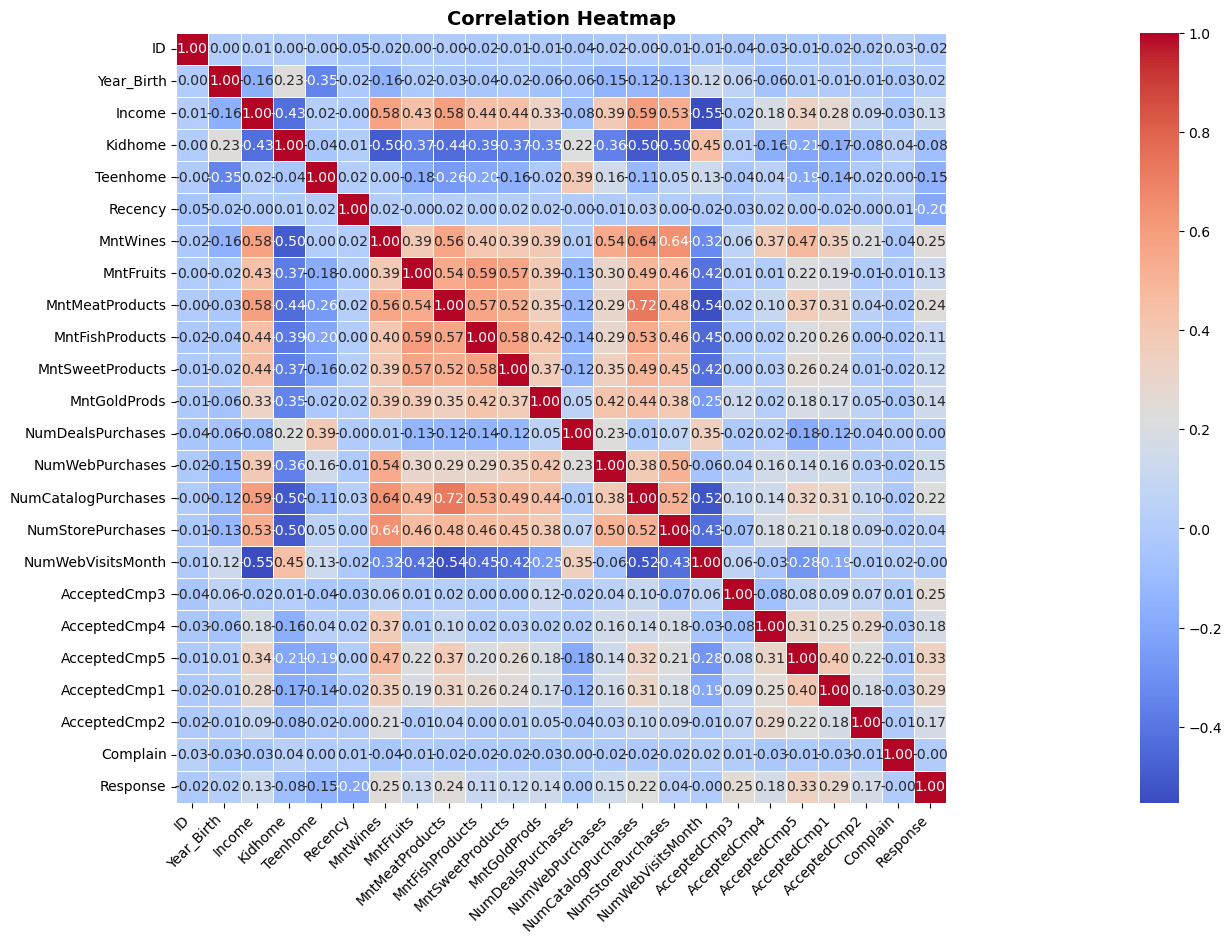

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(50, 10))
corr_matrix = df_numeric.corr()
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar=True
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()



In [491]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("profiling_report.html")

In [12]:
import webbrowser

webbrowser.open("profiling_report.html")

# 3. Data Preparation

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### 1) Data cleaning

- Missing values   
- Outliers   
- Inconsistent data formats   
- Duplicate records   

1.a. Outlier

In [54]:
# Selecting only numerical columns from each category for outlier analysis
outl_people = df_people[['Year_Birth', 'Income', 'Recency']]
outl_products = df_products[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
outl_promotion = df_promotion[['NumDealsPurchases']]
outl_place = df_place[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
outl_place_promo = pd.concat([df_place[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']],
                              df_promotion[['NumDealsPurchases']]], axis=1)

In [38]:
''' 
This function analyzes outliers in each column of the given DataFrame. 
It calculates the Interquartile Range (IQR) for each column, determines the lower and upper bounds for outliers 
(using 1.5 * IQR), and counts how many values fall below or above these bounds. 
The function then prints the outlier ranges and the number of occurrences for each column.
'''
# Global outlier
def display_outlier_ranges(df, df_name):
    bounds = {}
    
    print(f"\nOutlier Analysis for {df_name}:")
    
    for col in df.select_dtypes(include=["number"]).columns: 
        if df[col].dropna().empty:  
            print(f"{col}: Skipped (no valid data)")
            continue
        
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        below_outliers = (df[col] < lower_bound).sum()
        above_outliers = (df[col] > upper_bound).sum()
        
        print(f"{col}: {below_outliers} values below or {above_outliers} values above the outlier range.")
        
        bounds[col] = (lower_bound, upper_bound) 
    
    return bounds


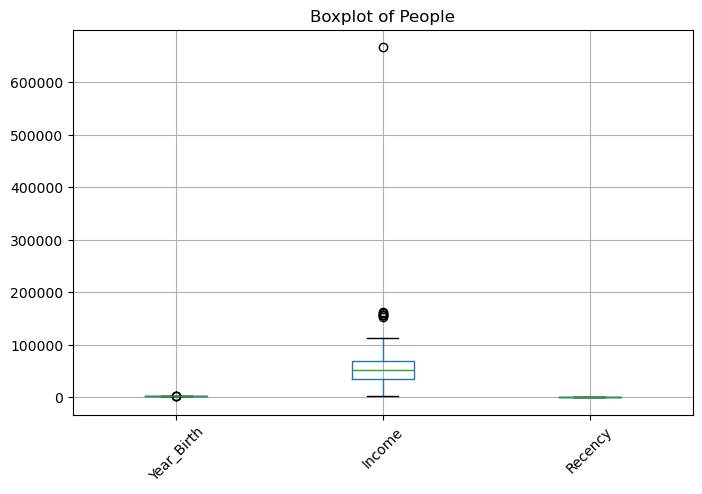


Outlier Analysis for People:
Year_Birth: 3 values below or 0 values above the outlier range.
Income: 0 values below or 8 values above the outlier range.
Recency: 0 values below or 0 values above the outlier range.


{'Year_Birth': (1932.0, 2004.0),
 'Income': (-14525.5, 118350.5),
 'Recency': (-51.0, 149.0)}

In [39]:
# Generates a boxplot for the 'People' dataset to visually display the distribution of the data 
outl_people.boxplot(figsize=(8, 5))
plt.title("Boxplot of People")
plt.xticks(rotation=45)
plt.show()

display_outlier_ranges(outl_people, "People")


In [40]:
bounds = display_outlier_ranges(outl_people[['Income']], "People")  
lower_bound, upper_bound = bounds["Income"]

outl_income = df[(df["Income"] < lower_bound) | (df["Income"] > upper_bound)]
outl_income


Outlier Analysis for People:
Income: 0 values below or 8 values above the outlier range.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,22,0,0,0,0,0,0,0,0,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,1,1,0,0,0,0,0,0,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,0,0,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,28,1,0,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,1,1,0,0,0,0,0,0,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,28,0,1,0,0,0,0,0,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,0,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,1,3,6,0,0,0,0,0,0,0


In [41]:
print(df['Income'].describe())


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [43]:
jumlah_outlier = outl_income.shape[0]
print(f"Number of outlier in income column: {jumlah_outlier}")
persentase_outlier = jumlah_outlier / df.shape[0] * 100
print(f"Outlier Percentage: {persentase_outlier:.2f}%")

Number of outlier in income column: 8
Outlier Percentage: 0.36%


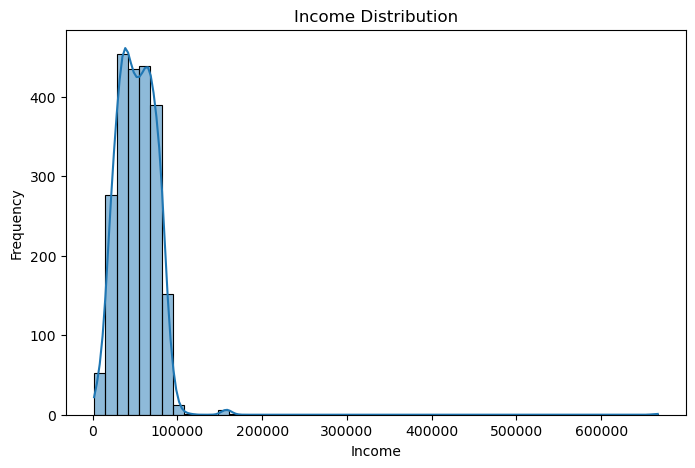

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [45]:
df_sorted = df[['Income']].sort_values('Income').reset_index(drop=True)
df_sorted['Percentile'] = (df_sorted.index + 1) / len(df_sorted)
outlier_incomes = [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
for income in outlier_incomes:
    row = df_sorted[df_sorted['Income'] == income]
    if not row.empty:
        p = row['Percentile'].values[0] * 100
        print(f"Income {income} ada di persentil ke-{p:.2f}")
    else:
        print(f"Income {income} tidak ditemukan (mungkin hanya 1 atau sudah dibulatkan)")


Income 157243.0 ada di persentil ke-98.75
Income 162397.0 ada di persentil ke-98.88
Income 153924.0 ada di persentil ke-98.62
Income 160803.0 ada di persentil ke-98.84
Income 157733.0 ada di persentil ke-98.79
Income 157146.0 ada di persentil ke-98.71
Income 156924.0 ada di persentil ke-98.66
Income 666666.0 ada di persentil ke-98.93


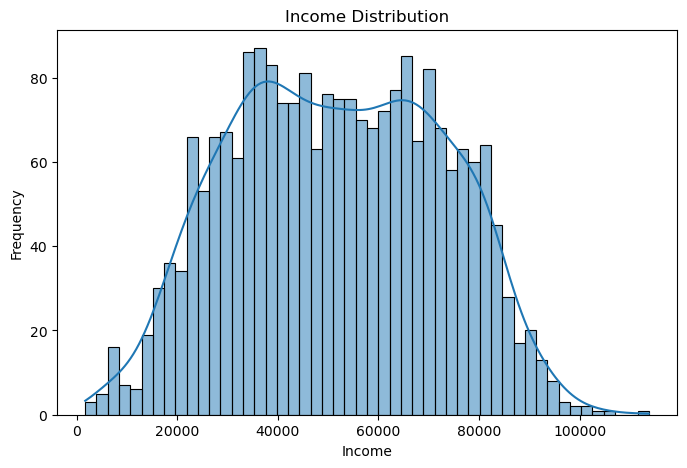

In [46]:
median_income = df['Income'].median()
df.loc[outl_income.index, 'Income'] = median_income
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


In [47]:
# Contextual Outlier
df["Spent"] = df_products.sum(axis=1)
income_q3 = df['Income'].quantile(0.75)
income_q1 = df['Income'].quantile(0.25)

spent_q3 = df['Spent'].quantile(0.75)
spent_q1 = df['Spent'].quantile(0.25)
# High income, but less spendimg
high_income_low_spent = df[(df['Income'] > income_q3) & (df['Spent'] < spent_q1)]
# Low income, but more spending
low_income_high_spent = df[(df['Income'] < income_q1) & (df['Spent'] > spent_q3)]
contextual_outl = pd.concat([high_income_low_spent, low_income_high_spent])
contextual_outl[['Income', 'Spent']]


,Income,Spent
21,2447.0,1730


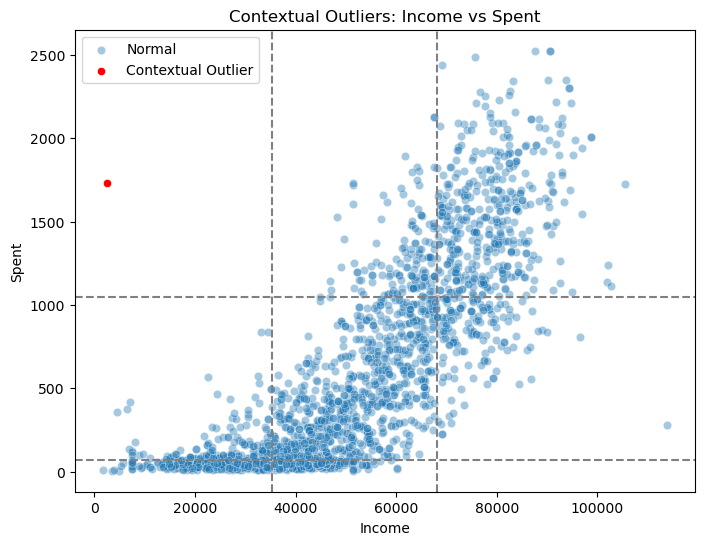

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Spent', label='Normal', alpha=0.4)
sns.scatterplot(data=contextual_outl, x='Income', y='Spent', color='red', label='Contextual Outlier')
plt.axvline(income_q1, color='grey', linestyle='--')
plt.axvline(income_q3, color='grey', linestyle='--')
plt.axhline(spent_q1, color='grey', linestyle='--')
plt.axhline(spent_q3, color='grey', linestyle='--')
plt.title('Contextual Outliers: Income vs Spent')
plt.legend()
plt.show()


In [49]:
# Replace the outliers with the median income
df.loc[contextual_outl.index, 'Income'] = median_income

In [50]:
bounds = display_outlier_ranges(outl_people[['Year_Birth']], "People")  
lower_bound, upper_bound = bounds["Year_Birth"]

outl_birth = df[(df["Year_Birth"] < lower_bound) | (df["Year_Birth"] > upper_bound)]
outl_birth


Outlier Analysis for People:
Year_Birth: 3 values below or 0 values above the outlier range.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,2,5,0,0,0,0,0,1,0,65
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,2,4,0,0,0,0,0,0,0,22
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,4,1,0,0,1,0,0,0,0,1853


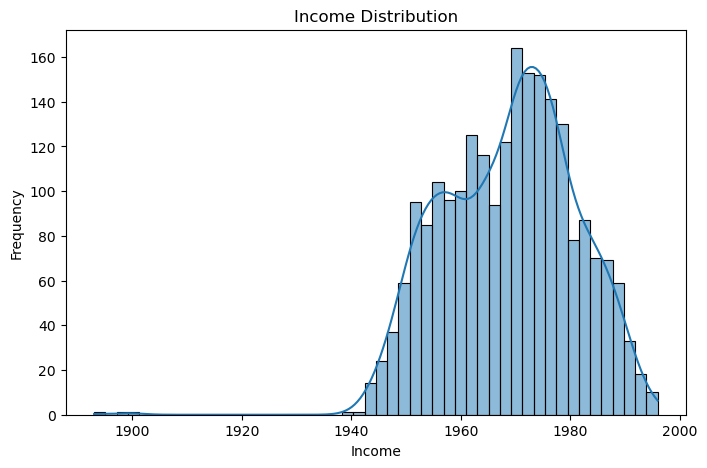

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['Year_Birth'], bins=50, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


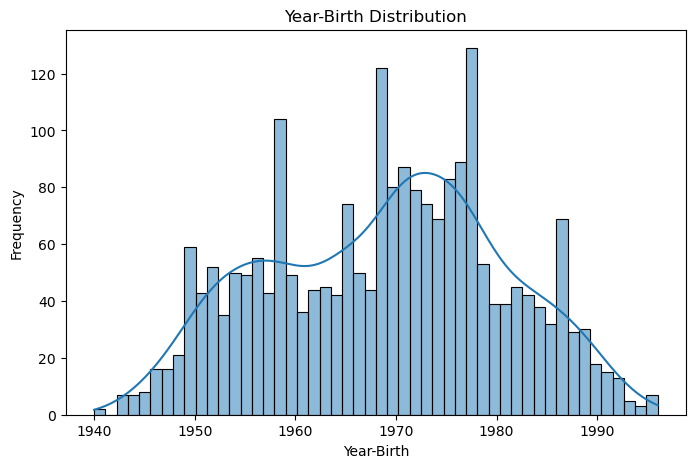

In [52]:
median_yb = df['Year_Birth'].median()
df.loc[outl_birth.index, 'Year_Birth'] = median_yb
plt.figure(figsize=(8,5))
sns.histplot(df['Year_Birth'], bins=50, kde=True)
plt.title('Year-Birth Distribution')
plt.xlabel('Year-Birth')
plt.ylabel('Frequency')
plt.show()

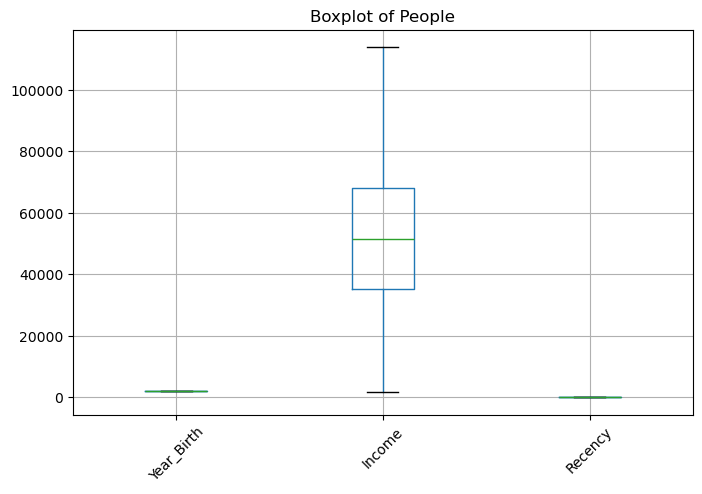


Outlier Analysis for People:
Year_Birth: 0 values below or 0 values above the outlier range.
Income: 0 values below or 0 values above the outlier range.
Recency: 0 values below or 0 values above the outlier range.


{'Year_Birth': (1932.0, 2004.0),
 'Income': (-13930.5, 117445.5),
 'Recency': (-51.0, 149.0)}

In [55]:
# First, generate df_people and outl_people to renew the updated data
# Generates a boxplot for the 'People' dataset to visually display the distribution of the data 
outl_people.boxplot(figsize=(8, 5))
plt.title("Boxplot of People")
plt.xticks(rotation=45)
plt.show()

display_outlier_ranges(outl_people, "People")


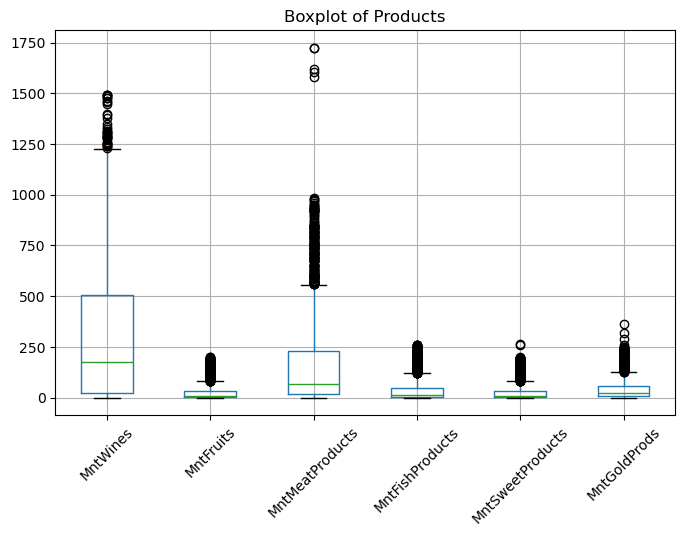


Outlier Analysis for Products:
MntWines: 0 values below or 35 values above the outlier range.
MntFruits: 0 values below or 227 values above the outlier range.
MntMeatProducts: 0 values below or 175 values above the outlier range.
MntFishProducts: 0 values below or 223 values above the outlier range.
MntSweetProducts: 0 values below or 248 values above the outlier range.
MntGoldProds: 0 values below or 207 values above the outlier range.


{'MntWines': (-697.0, 1225.0),
 'MntFruits': (-47.0, 81.0),
 'MntMeatProducts': (-308.0, 556.0),
 'MntFishProducts': (-67.5, 120.5),
 'MntSweetProducts': (-47.0, 81.0),
 'MntGoldProds': (-61.5, 126.5)}

In [56]:
# Generates a boxplot for the 'Products' dataset to visually display the distribution of the data 
outl_products.boxplot(figsize=(8, 5))
plt.title("Boxplot of Products")
plt.xticks(rotation=45)
plt.show()

display_outlier_ranges(outl_products, "Products")


In [24]:
'''  
Outliers are kept because they represent genuine customer behavior and important business insights rather than errors.
Instead of removing them, normalization techniques help manage skewed data.
'''

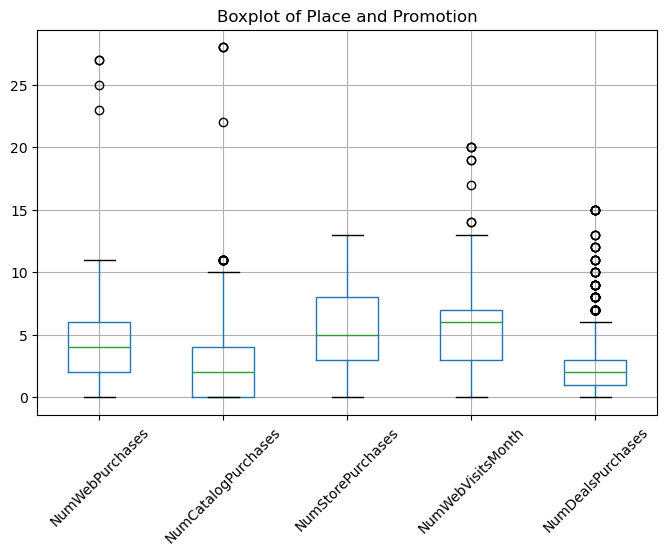


Outlier Analysis for Place & Promotion:
NumWebPurchases: 0 values below or 4 values above the outlier range.
NumCatalogPurchases: 0 values below or 23 values above the outlier range.
NumStorePurchases: 0 values below or 0 values above the outlier range.
NumWebVisitsMonth: 0 values below or 8 values above the outlier range.
NumDealsPurchases: 0 values below or 86 values above the outlier range.


{'NumWebPurchases': (-4.0, 12.0),
 'NumCatalogPurchases': (-6.0, 10.0),
 'NumStorePurchases': (-4.5, 15.5),
 'NumWebVisitsMonth': (-3.0, 13.0),
 'NumDealsPurchases': (-2.0, 6.0)}

In [57]:
# Generates a boxplot for the 'Place & Promotion' dataset to visually display the distribution of the data 
outl_place_promo.boxplot(figsize=(8, 5))
plt.title("Boxplot of Place and Promotion")
plt.xticks(rotation=45)
plt.show()

display_outlier_ranges(outl_place_promo, "Place & Promotion")


In [25]:
'''  
Outliers in Place & Promotion data are not removed because they highlight significant customer behaviors, such as high engagement with specific purchasing channels.
Instead of treating them as errors, these outliers help identify marketing trends, customer preferences, and areas for strategic business decisions.
Normalization techniques are used to manage data skewness while preserving valuable insights.
'''

#### 2) Feature Engineering

- Feature Construction/Creation: Deriving new features from existing data.
- Feature Extraction: Automatically extracting features from raw data.
- Feature Selection: Selecting the most relevant features.
- Feature Transformation: Transforming the scale or distribution of features.

2.a. Feature Construction/Creation

In [58]:
# Create the 'Age' column based on 'Year_Birth'
# Subtract birth year from the current year to calculate age
df['Age'] = 2014 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True, errors='ignore')

# Create the 'TotalAmount' column as the total spending amount
# Sum all purchase categories to get the total spending per customer
# As we previously calculated the total spending as 'Spent', we now rename it to 'TotalAmount' for clarity
df.rename(columns={'Spent': 'TotalAmount'}, inplace=True)

# Create a categorical feature based on the number of children
df["IsParent"] = np.where((df["Kidhome"] > 0) | (df["Teenhome"] > 0), 1, 0)

# Identify all columns related to campaign participation (containing 'Cmp')
# and include the 'Response' column, which indicates the latest campaign response.
# Calculate the total number of accepted campaigns per customer.
cmp_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc'] = df[cmp_cols].sum(axis=1)

2.b. Feature Selection

2.c. Feature Transformation

In [59]:
# Display the unique values to analyze distinct values within the dataset
for col in ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']:
    print(f"{col.ljust(15)}: {', '.join(map(str, df[col].unique()))}")

Education      : Graduation, PhD, Master, Basic, 2n Cycle
Marital_Status : Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO
Kidhome        : 0, 1, 2
Teenhome       : 0, 1, 2
AcceptedCmp3   : 0, 1
AcceptedCmp4   : 0, 1
AcceptedCmp5   : 0, 1
AcceptedCmp1   : 0, 1
AcceptedCmp2   : 0, 1
Complain       : 0, 1
Response       : 1, 0


- Feature Transformation for Education Category Reclassification

In [60]:
# Calculates the proportion of each education category
edu_count = df['Education'].value_counts()
edu_pct = (edu_count / len(df)) * 100

for category in edu_count.index:
    print(f"{category.ljust(12)} {str(edu_count[category]).ljust(6)} ({edu_pct[category]:.2f}%)")

Graduation   1127   (50.31%)
PhD          486    (21.70%)
Master       370    (16.52%)
2n Cycle     203    (9.06%)
Basic        54     (2.41%)


In [61]:
# Segmenting education levels in three groups
df.replace({
    "Education": {
        "Basic": "School Level",
        "2n Cycle": "School Level",
        "Graduation": "Undergraduate",
        "Master": "Postgraduate Master",
        "PhD": "Postgraduate Doctorate"
    }
}, inplace=True)


In [62]:
# Manually mapping education levels to numerical values for easier analysis 
df.replace({"Education": {
    "School Level": 0,
    "Undergraduate": 1,  
    "Postgraduate Master": 2,  
    "Postgraduate Doctorate": 3  
}}, inplace=True)

- Feature Transformation for Marital Status Category Reclassification

In [63]:
# Calculates the proportion of each marital category
edu_count = df['Marital_Status'].value_counts()
edu_pct = (edu_count / len(df)) * 100

for category in edu_count.index:
    print(f"{category.ljust(12)} {str(edu_count[category]).ljust(6)} ({edu_pct[category]:.2f}%)")

Married      864    (38.57%)
Together     580    (25.89%)
Single       480    (21.43%)
Divorced     232    (10.36%)
Widow        77     (3.44%)
Alone        3      (0.13%)
Absurd       2      (0.09%)
YOLO         2      (0.09%)


In [64]:
from sklearn.preprocessing import LabelEncoder

df["LivingWith"] = "Alone"
df.loc[df["IsParent"] == 1, "LivingWith"] = "Together"
encoder = LabelEncoder()
df["LivingWith"] = encoder.fit_transform(df["LivingWith"])

# Drop the Marital_Status column
df.drop(columns=["Marital_Status"], inplace=True)

In [65]:
# # Convert Dt_Customer column to datetime format
# # Extract the year, month, and day period from the customer enrollment date
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

- Feature Transformation for Age Reclassification

In [22]:
# # Function to assign generation based on age in 2014
# def assign_gen_2014(Age):
#     if Age <= 17:  # Gen Z (age <= 17 in 2014) x >= 1997 and x <= 2012
#         return 'Gen Z'
#     elif Age <= 33:  # Millennials/Gen Y (age 18-33 in 2014) >= 1981 and x <= 1996
#         return 'Millennials'
#     elif Age <= 49:  # Gen X (age 34-49 in 2014) x >= 1965 and x <= 1980
#         return 'Gen X'
#     elif Age <= 68:  # Boomers (age 50-68 in 2014) x >= 1946 and x <= 1964
#         return 'Boomers'
#     else:  # Silent Generation (age > 68 in 2014) x >= 1925 and x <= 194
#         return 'Silent'

#     # x <= 1924 : 'Greatest Generation'
#     # x >= 2013 and x <= 2025 : 'Gen A'
# df['gen'] = df['Age'].apply(assign_gen_2014)


#### 3) Data cleaning (After FE)

- Missing values   
- Outliers   
- Inconsistent data formats   
- Duplicate records   
- Errors and inaccuracies

3.a. Checking & Handling Missing Value

In [66]:
# Checking missing value
missing_val = df.isnull().sum()
missing_counts = missing_val[missing_val > 0]
missing_pct = (missing_val / len(df)) * 100
missing_counts.astype(str) + " (" + missing_counts.round(2).astype(str) + "%)"

Income    24 (24%)
dtype: object

In [67]:
df[df['Income'].isnull()]

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalAmount,Age,IsParent,TotalCampaignsAcc,LivingWith
10,1994,1,NaN,1,0,2013-11-15,11,5,5,6,...,0,0,0,0,0,19,31,1,0,1
27,5255,1,NaN,1,0,2013-02-20,19,5,1,3,...,0,0,0,0,0,637,28,1,0,1
43,7281,3,NaN,0,0,2013-11-05,80,81,11,50,...,0,0,0,0,0,186,55,0,0,0
48,7244,1,NaN,2,1,2014-01-01,96,48,5,48,...,0,0,0,0,0,124,63,1,0,1
58,8557,1,NaN,1,0,2013-06-17,57,11,3,22,...,0,0,0,0,0,46,32,1,0,1
71,10629,0,NaN,1,0,2012-09-14,25,25,3,43,...,0,0,0,0,0,109,41,1,0,1
90,8996,3,NaN,2,1,2012-11-19,4,230,42,192,...,0,0,0,0,0,603,57,1,0,1
91,9235,1,NaN,1,1,2014-05-27,45,7,0,8,...,0,0,0,0,0,18,57,1,0,1
92,5798,2,NaN,0,0,2013-11-23,87,445,37,359,...,0,0,0,0,0,985,41,0,0,0
128,8268,3,NaN,0,1,2013-07-11,23,352,0,27,...,0,0,0,0,0,404,53,1,0,1


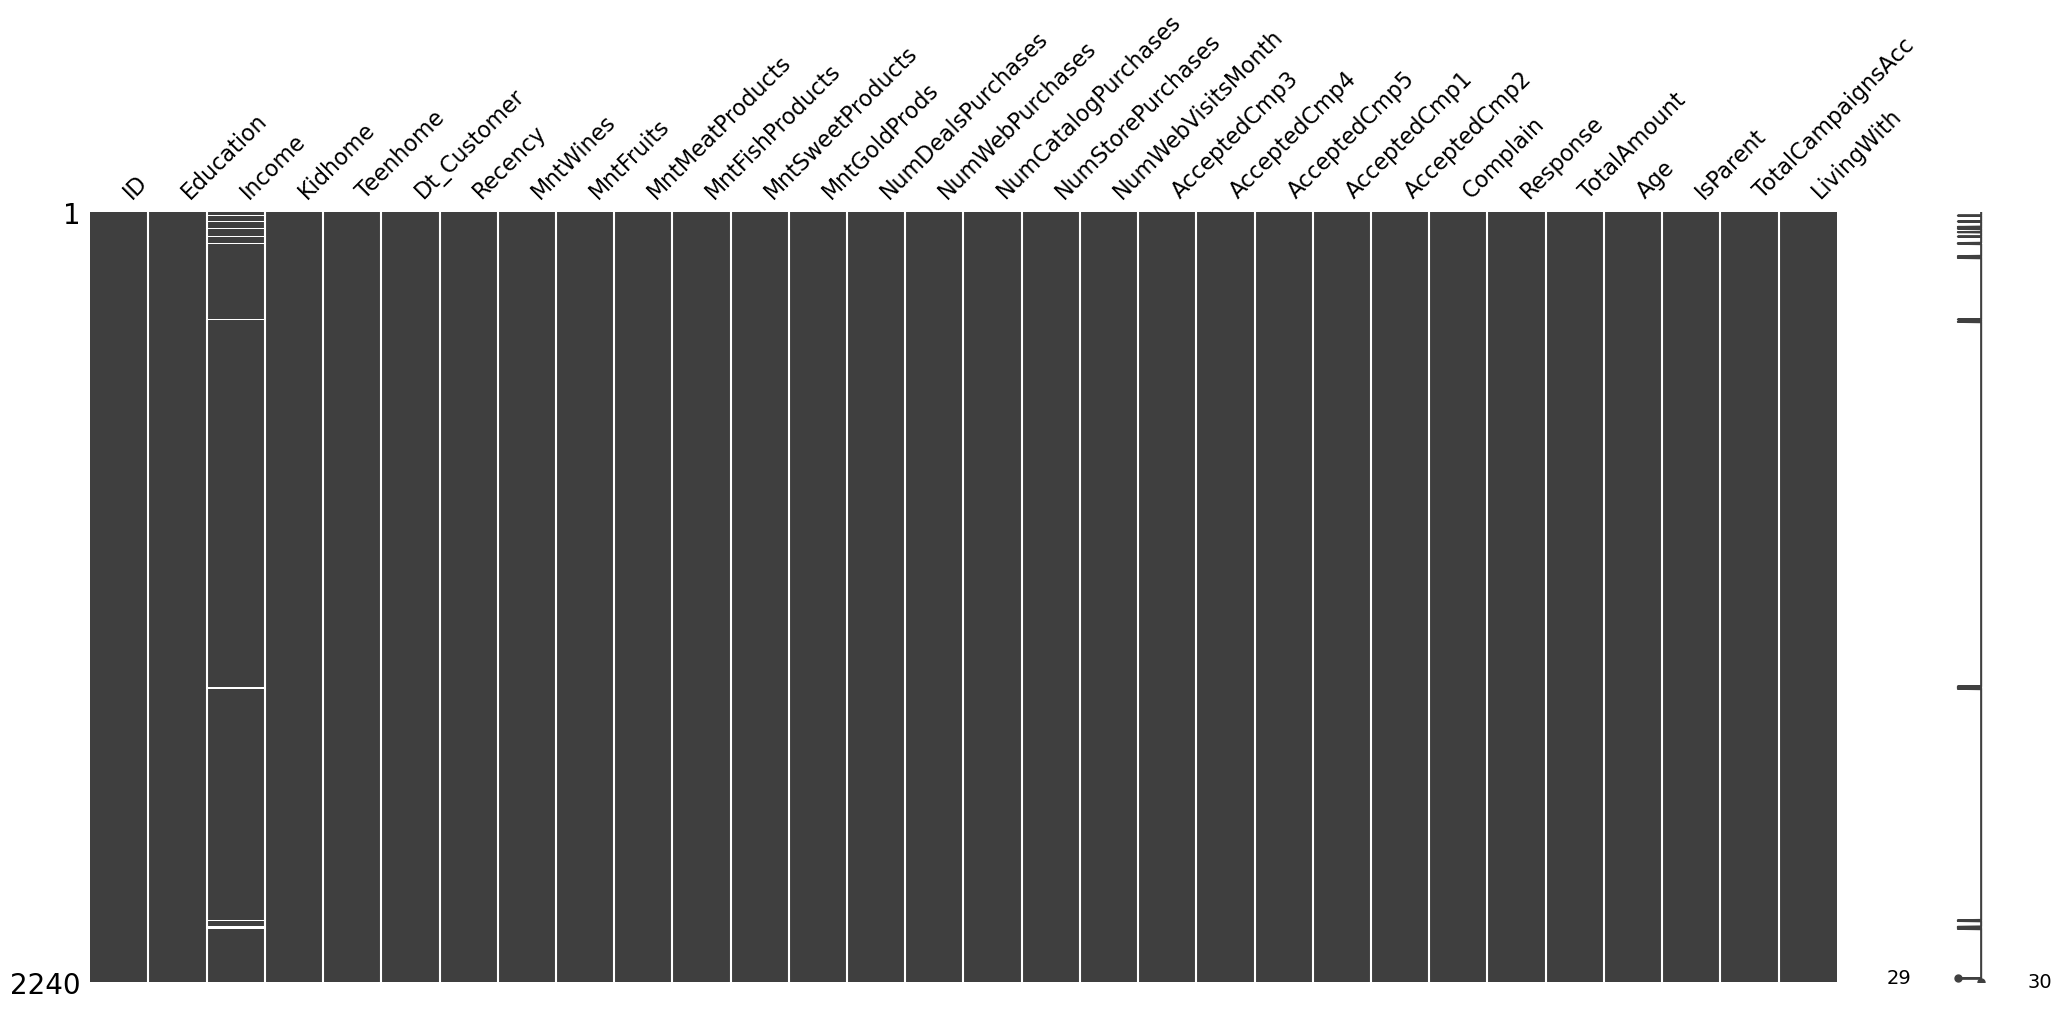

In [68]:
msno.matrix(df)
plt.show()

In [40]:
'''  
If we look at this image, it's clear that the missing data pattern is univariate.
Only the "Income" column has gaps, while the other columns are completely fine. So, the conclusion is univariate.
'''

In [69]:
# Since most variables suggest MCAR/MAR, a data-driven imputation basic method should work well
# Identify the two strongest numerical predictors of Income to inform the imputation process
df.select_dtypes(include=['number']).corr()['Income'].sort_values(ascending=False)[1:3]

TotalAmount    0.824074
MntWines       0.729581
Name: Income, dtype: float64

In [70]:
def little_mcar_test_chi2(df):
    """Performs Little's MCAR test using a chi-square test. 
    The test checks whether missing values in a dataset are randomly distributed or follow a pattern.  

    - H0 (Null Hypothesis): Missing data is completely at random (MCAR).  
    - HA (Alternative Hypothesis): Missing data is not completely at random (possibly MAR or MNAR).
    
    Steps:  
    1. Select only numerical columns from the DataFrame.  
    2. Create a missing data mask (1 if missing, 0 if present).  
    3. Compute the observed frequency of missing values across variables.  
    4. Perform a chi-square test to determine if missingness is independent of the data.  
    5. Interpret results: Reject H0 if the p-value ≤ 0.05.
    
    """
    df_missing = df.select_dtypes(include=[np.number]).copy()
    missing_mask = df_missing.isnull().astype(int)
    observed_freq = (missing_mask.T @ missing_mask).astype(int)
    observed_freq += 1e-6 # # Add small value to prevent zero-division errors
    chi2_stat, p_value, _, _ = chi2_contingency(observed_freq, correction=False) 
    return p_value

mcar_p_value = little_mcar_test_chi2(df)

if mcar_p_value is not None:
    print(f"Little’s MCAR test p-value: {mcar_p_value}")
    if mcar_p_value > 0.05:
        print("Missing data is likely MCAR (p > 0.05).")
    else:
        print("Missing data is NOT MCAR (p ≤ 0.05), possibly MAR or MNAR.")


Little’s MCAR test p-value: 1.0
Missing data is likely MCAR (p > 0.05).


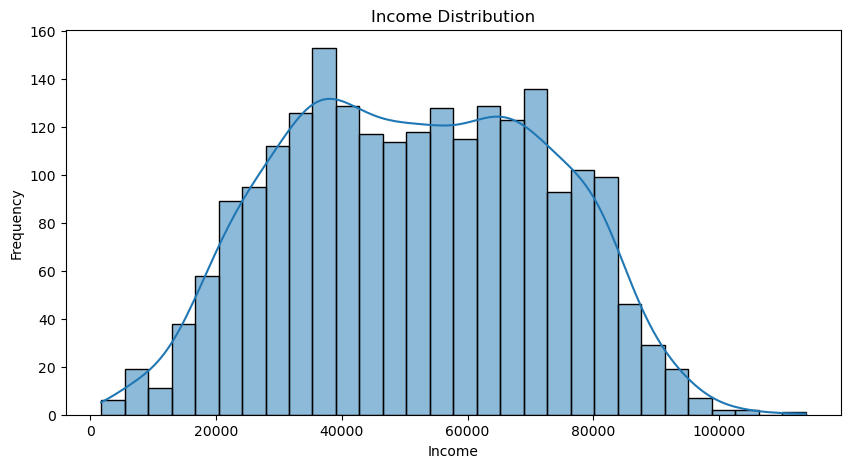

Skewness of Income: 0.016092739802236602


In [71]:
# Visualizing the distribution of Income to check skewness
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()
# If skewness > 1 or < -1, the distribution is highly skewed
income_skew=df['Income'].skew()
print("Skewness of Income:", income_skew)


In [ ]:
# The income distribution appears slightly right-skewed, as higher income values extend the tail to the right.
# The distribution is bimodal and the most common yearly incomes are approxiimately 30000 and 65000.

In [73]:
temp_df = df.copy()
temp_df['Income'] = temp_df['Income'].fillna(temp_df['Income'].median())

X = temp_df[['TotalAmount']]
y = temp_df['Income']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared value: {r2}")


R-squared value: 0.6733175635420048


In [173]:
# An R-squared value of 0.6737 indicates that approximately 67.37% of the variance in Income can be explained by TotalAmount under a linear relationship.
# This suggests a strong association, though not perfect.

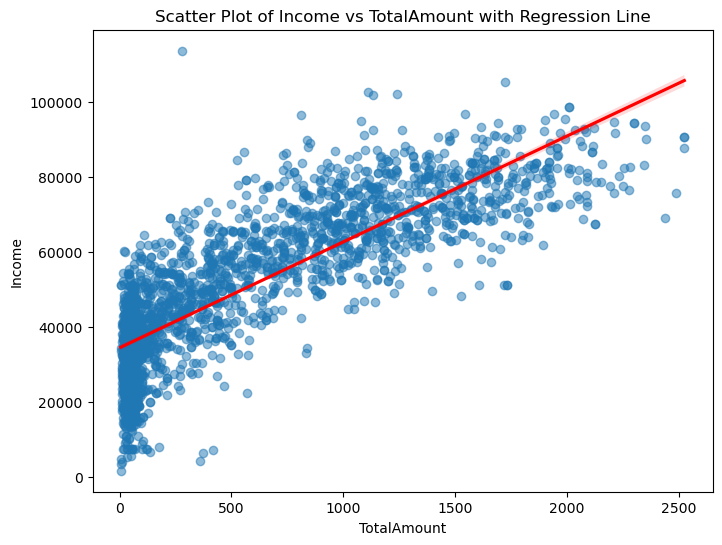

In [75]:
# Visualizing the relationship between income and total amount with a regression line for better trend analysis
plt.figure(figsize=(8, 6))
sns.regplot(x=df['TotalAmount'], y=df['Income'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Scatter Plot of Income vs TotalAmount with Regression Line")
plt.xlabel("TotalAmount")
plt.ylabel("Income")
plt.show()


In [ ]:
# The points display a positive correlation between Income and TotalAmount, suggesting that as TotalAmount increases, Income tends to increase as well

In [185]:
# Quartile-based median imputation preserves data structure (income & totalAmount), handles MCAR effectively, and avoids outlier influence.

In [76]:
''' 
# Filling missing Income values with the median
'''
# Calculate the median of the 'Income' column
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

In [77]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

3.b. Inconsistent data formats   

In [78]:
# 1. Identify inconsistencies in names, types, and formats
print("============================== Column Names =================================")
print(df.columns)
print("\n===== Data Types of Columns =====")
print("\n",df.dtypes,"\n")

excluded_columns = ['ID', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'NumWebVisitsMonth', 'TotalAmount', 'TotalConversionBuying',
                    'Age', 'Recency']

print("\n=================== Unique Values ===================")
for col in df.columns:  
    if col not in excluded_columns:
        unique_values = df[col].unique()
        print(f"{col.ljust(15)}: {', '.join(map(str, unique_values[:10]))}")



============================== Column Names =================================
Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotalAmount', 'Age', 'IsParent',
       'TotalCampaignsAcc', 'LivingWith'],
      dtype='object')

===== Data Types of Columns =====

 ID                              int64
Education                       int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatPr

In [79]:
df = df.rename(columns={
    "ID": "id",
    "Education": "edu",
    "Income": "income",
    "Kidhome": "kid_cnt",
    "Teenhome": "teen_cnt",
    "Dt_Customer": "dt_cust",
    "Recency": "last_purchase",
    "MntWines": "spent_wine",
    "MntFruits": "spent_fruit",
    "MntMeatProducts": "spent_meat",
    "MntFishProducts": "spent_fish",
    "MntSweetProducts": "spent_sweet",
    "MntGoldProds": "spent_gold",
    "NumDealsPurchases": "deals_buy",
    "NumWebPurchases": "web_buy",
    "NumCatalogPurchases": "catalog_buy",
    "NumStorePurchases": "store_buy",
    "NumWebVisitsMonth": "web_visits",
    "AcceptedCmp3": "cmp3",
    "AcceptedCmp4": "cmp4",
    "AcceptedCmp5": "cmp5",
    "AcceptedCmp1": "cmp1",
    "AcceptedCmp2": "cmp2",
    "Complain": "complaint",
    "Response": "last_cmp",
    "TotalAmount": "total_spent",
    "Age": "age",
    "IsParent": "is_parent",
    "TotalCampaignsAcc": "total_cmp_acc",
    "TotalConversionBuying": "conv_rate",
    "LivingWith": "household"
})


3.c. Duplicate records   

In [80]:
df.duplicated().sum()

0

3.d. Errors and inaccuracies

In [ ]:
# Errors and inaccuracies have been resolved

# 4. Data Visualization

Based on customer data, we can analyze demographics patterns through generation, education level, living arrangements, financial status, and family members.

In [80]:
'''  
Explore which generation took part the most in the data to understand the challenges faced and identify the best generation to target in future campaigns.
Which generation constitutes the majority of our customer base, and how can this insight help us to understand potential challenges and refine our future strategies?
'''

'  \nExplore which generation took part the most in the data to understand the challenges faced and identify the best generation to target in future campaigns.\nWhich generation constitutes the majority of our customer base, and how can this insight help us to understand potential challenges and refine our future strategies?\n'

In [81]:
df['age'].describe()

count    2240.000000
mean       45.096875
std        11.694144
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: age, dtype: float64

In [82]:
# Function to assign generation based on age in 2014
def assign_gen_2014(age):
    if age <= 17:  # Gen Z (age <= 17 in 2014) x >= 1997 and x <= 2012
        return 'Gen Z'
    elif age <= 33:  # Millennials/Gen Y (age 18-33 in 2014) >= 1981 and x <= 1996
        return 'Millennials'
    elif age <= 49:  # Gen X (age 34-49 in 2014) x >= 1965 and x <= 1980
        return 'Gen X'
    elif age <= 68:  # Boomers (age 50-68 in 2014) x >= 1946 and x <= 1964
        return 'Boomers'
    else:  # Silent Generation (age > 68 in 2014) x >= 1925 and x <= 194
        return 'Silent'

    # x <= 1924 : 'Greatest Generation'
    # x >= 2013 and x <= 2025 : 'Gen A'
df['gen'] = df['age'].apply(assign_gen_2014)


In [83]:
# Count occurrences of each generation
gen = df['gen'].value_counts().reset_index()
gen.columns = ['Generation', 'Count']
fig = px.pie(
    gen, 
    names='Generation', 
    values='Count', 
    hole=0
)
fig.update_traces(
    pull=[0.1, 0.1, 0.3, 0.1, 0], 
    hoverinfo='label+percent+value' 
)

fig.show()


In [ ]:
# The largest proportion of the company's customers is Gen X, followed by Baby Boomers, accounting for 82% of the customers cumulatively.
# These potential customers can be targeted candidate in the next campaign through further further analysis.

In [84]:
# Summarize spending per generation using stacked bar chart
spending_by_gen = df.groupby('gen')[['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold']].sum().reset_index()
spending_by_gen['total_spent'] = spending_by_gen[['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold']].sum(axis=1)
spending_melted = spending_by_gen.melt(id_vars=['gen'], value_vars=['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold'],
                                       var_name='Product Type', value_name='Amount_Spent')
spending_melted['Product Type'] = spending_melted['Product Type'].str.replace('spent_', '', regex=False).str.title()
fig = px.bar(spending_melted, x='gen', y='Amount_Spent', color='Product Type', 
             title='Total Spending by Generation with Product Breakdown', 
             labels={'Amount_Spent': 'Total Spent', 'gen': 'Generation'})
fig.show()


In [ ]:
'''  
- Gen X recorded the highest expenditure compared to other generations.
- Wine emerged as the product with the largest spending, particularly among Gen X.
- The graph highlights generational spending patterns across various product categories.
'''

'  \n- Boomers recorded the highest expenditure compared to other generations.\n- Wine emerged as the product with the largest spending, particularly among Boomers\n- The graph highlights generational spending patterns across various product categories.\n'

In [85]:
# Summarize spending per generation using stacked bar chart
spending_by_gen = df.groupby('gen')[['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold']].mean().reset_index()
spending_by_gen['total_spent'] = spending_by_gen[['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold']].sum(axis=1)
spending_melted = spending_by_gen.melt(id_vars=['gen'], value_vars=['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold'],
                                       var_name='Product Type', value_name='Amount_Spent')
spending_melted['Product Type'] = spending_melted['Product Type'].str.replace('spent_', '', regex=False).str.title()
fig = px.bar(spending_melted, x='gen', y='Amount_Spent', color='Product Type', 
             title='Total Spending by Generation with Product Breakdown', 
             labels={'Amount_Spent': 'Total Spent', 'gen': 'Generation'})
fig.show()


In [ ]:
'''   
- Silents have the highest average spending among all generations.
- Their small contribution to the dataset makes this average less representative.
- Limited data size impacts the reliability and diversity of the conclusions drawn.
'''

'   \n- Millennials have the highest average spending among all generations.\n- Their small contribution to the dataset makes this average less representative.\n- Limited data size impacts the reliability and diversity of the conclusions drawn.\n'

In [87]:
# Visualize total complaints per generation
complaints_by_gen = df.groupby('gen')['complaint'].sum().reset_index()

fig = px.bar(complaints_by_gen, x='gen', y='complaint', title='Complaints by Generation', color='gen')
fig.show()


In [ ]:
# Boomers have the highest number of cases compared to other generations, while Silents have the lowest

In [88]:
# Displaying the percentage distribution of education levels within each gender category
crosstab_norm = pd.crosstab(df['gen'], df['edu'], normalize='index') * 100
crosstab_norm

edu,0,1,2,3
gen,,,,
Boomers,7.641634,48.484848,18.577075,25.296443
Gen X,11.753731,51.212687,16.324627,20.708955
Millennials,18.961039,53.246753,12.467532,15.324675
Silent,0.000000,20.833333,25.000000,54.166667


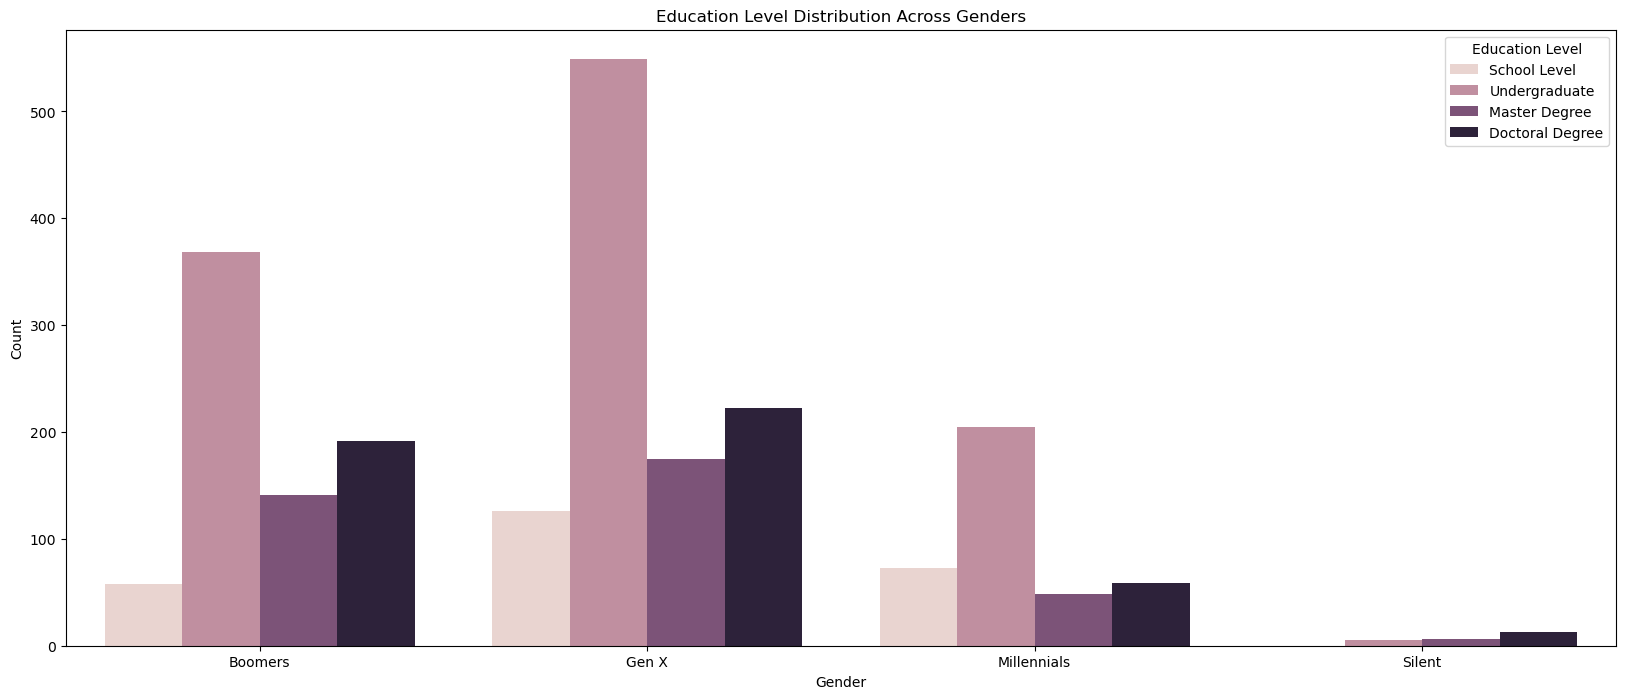

In [89]:
# Visualizing the distribution of education levels within each gender category
plt.figure(figsize=(20, 8))

sns.countplot(data=df, x='gen', hue='edu')
plt.title("Education Level Distribution Across Genders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Education Level", labels=["School Level", "Undergraduate", "Master Degree", "Doctoral Degree"])  
plt.show()


In [91]:
''' 
Overall, Generation X leads in the total number of cases, followed by the Boomers generation
while Silents and Millennials have significantly fewer cases.
Overall, customers with an undergraduate degree are the most common across all generations—
except for the Silent Generation, where doctoral degree holders dominate.
'''

' \nOverall, Generation X leads in the total number of cases, followed by the Boomers generation\nwhile Silents and Millennials have significantly fewer cases.\nOverall, customers with an undergraduate degree are the most common across all generations—\nexcept for the Silent Generation, where doctoral degree holders dominate.\n'

In [92]:
# Summarizing the total number of purchases for each generation
purchases_by_gen = df.groupby('gen')[['web_buy', 'catalog_buy', 'store_buy']].sum().reset_index()
purchases_melted = purchases_by_gen.melt(
    id_vars=['gen'], 
    value_vars=['web_buy', 'catalog_buy', 'store_buy'],
    var_name='Purchase_Channel', 
    value_name='Total_Purchases'
)
purchases_melted['Purchase_Channel'] = purchases_melted['Purchase_Channel'].replace({
    'web_buy': 'Web',
    'catalog_buy': 'Catalog',
    'store_buy': 'Store'
})
fig = px.bar(
    purchases_melted, 
    x='gen', 
    y='Total_Purchases', 
    color='Purchase_Channel',
    title='Total Purchases by Generation and Channel',
    barmode='group',
    labels={'Total_Purchases': 'Total Purchases', 'gen': 'Generation'}
)

fig.show()


In [93]:
# Calculating the average number of purchases for each channel based on generation group
avg_purchases_by_gen = df.groupby('gen')[['web_buy', 'catalog_buy', 'store_buy']].mean().reset_index()
avg_purchases_melted = avg_purchases_by_gen.melt(
    id_vars=['gen'], 
    value_vars=['web_buy', 'catalog_buy', 'store_buy'],
    var_name='Purchase_Channel', 
    value_name='Average_Purchases'
)
avg_purchases_melted['Purchase_Channel'] = avg_purchases_melted['Purchase_Channel'].replace({
    'web_buy': 'Web',
    'catalog_buy': 'Catalog',
    'store_buy': 'Store'
})
fig = px.bar(
    avg_purchases_melted, 
    x='gen', 
    y='Average_Purchases', 
    color='Purchase_Channel',
    title='Average Purchases by Generation and Channel',
    barmode='group',
    labels={'Average_Purchases': 'Average Purchases', 'gen': 'Generation'}
)
fig.show()


In [ ]:
'''  
Store channel consistently contributes the highest proportion to individual average sales across all generations,
compared to Web and Catalog channels.
'''

'  \nhe Store channel consistently contributes the highest proportion to individual average sales across all generations,\ncompared to Web and Catalog channels.\n'

In [94]:
# Calculating and comparing the average web visits and web purchases per generation
avg_web_metrics_by_gen = df.groupby('gen')[['web_visits', 'web_buy']].mean().reset_index()
avg_web_metrics_melted = avg_web_metrics_by_gen.melt(
    id_vars=['gen'], 
    value_vars=['web_visits', 'web_buy'],
    var_name='Web_Metric', 
    value_name='Average_Count'
)
avg_web_metrics_melted['Web_Metric'] = avg_web_metrics_melted['Web_Metric'].replace({
    'web_visits': 'Visit',
    'web_buy': 'Buy'
})
fig = px.bar(
    avg_web_metrics_melted, 
    x='gen', 
    y='Average_Count', 
    color='Web_Metric',
    title='Average Web Visits and Web Purchases by Generation',
    barmode='group',
    labels={'Average_Count': 'Average Count', 'gen': 'Generation'}
)
fig.show()



In [95]:
'''
The Silent Generation tends to shop online more frequently than other generations, 
despite visiting online platforms less often. In contrast, other generations visit more but purchase less.
'''

'\nThe Silent Generation tends to shop online more frequently than other generations, \ndespite visiting online platforms less often. In contrast, other generations visit more but purchase less.\n'

In [96]:
# Calculating total purchases for each channel
total_purchases = df[['web_buy', 'catalog_buy', 'store_buy']].sum()
purchase_proportions = (total_purchases / total_purchases.sum()) * 100
purchase_proportions

web_buy        32.581989
catalog_buy    21.233486
store_buy      46.184524
dtype: float64

In [97]:
# Calculating the Distribution of Individuals by Household Status, Generation, and Parental Status
df_sb = df.groupby(["household", "gen", "is_parent"]).size().reset_index(name="count")
df_sb["household"] = df_sb["household"].replace({0: "Alone", 1: "Together"})
df_sb["is_parent"] = df_sb["is_parent"].replace({0: "No Child", 1: "With Child"})
fig = px.sunburst(
    df_sb, 
    path=["household", "gen", "is_parent"],  
    values="count",  
    title="Distribution of Household, Generation, and Parental Status"
)
fig.update_traces(textinfo="label+percent entry") 
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0), 
    height=800, 
    width=800, 
)
fig.show()



In [ ]:
# Most individuals live together with family members, especially children, with Boomers and Gen X dominating.
# Fewer, mostly Boomers, live alone.

In [98]:
# Calculating total spending by household status, generation, and parental status
df_sb = df.groupby(["household", "gen", "is_parent"])["total_spent"].sum().reset_index()
df_sb["household"] = df_sb["household"].replace({0: "Alone", 1: "Together"})
df_sb["is_parent"] = df_sb["is_parent"].replace({0: "No Child", 1: "With Child"})
fig = px.sunburst(
    df_sb, 
    path=["household", "gen", "is_parent"],  
    values="total_spent",  
    title="Total Spending by Household, Generation, and Parental Status"
)

fig.update_traces(textinfo="label+percent entry") 
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0), 
    height=800, 
    width=800, 
)

fig.show()


In [65]:
# "Together" households make up 48% of total spending.
# Boomers (both with and without children) contribute significantly to spending.

In [99]:
# Aggregate total spending by household and generation
df_bar = df.groupby(["household", "gen"])["total_spent"].sum().reset_index()
df_bar["household"] = df_bar["household"].replace({0: "Alone", 1: "Together"})
fig = px.bar(
    df_bar, 
    x="household", 
    y="total_spent", 
    color="gen", 
    barmode="group",
    title="Total Spend by Household & Generation",
    labels={"Total_Spend": "Total Spend", "household": "Household Type", "gen": "Generation"}
)
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0), 
    height=600, 
    width=800, 
    xaxis_title="Household Type",
    yaxis_title="Total Spend",
)
fig.show()


In [ ]:
# The group of total spend among household type with Gen X leading in both categories.

In [100]:
# Calculate percentage contribution within each household type
df_bar = df.groupby(["household", "gen"])["total_spent"].sum().reset_index()
df_bar["household"] = df_bar["household"].replace({0: "Alone", 1: "Together"})
df_bar["percent"] = df_bar.groupby("household")["total_spent"].transform(lambda x: x / x.sum() * 100)
df_bar["percent_label"] = df_bar["percent"].apply(lambda x: f"{x:.1f}%")
fig = px.bar(
    df_bar, 
    x="household", 
    y="total_spent", 
    color="gen",  
    barmode="stack",  
    text=df_bar["percent_label"],  # Add percentage labels
    title="Total Spend by Household & Generation",
    labels={"total_spent": "Total Spend", "household": "Household Type", "gen": "Generation"}
)
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0), 
    height=600, 
    width=800, 
    xaxis_title="Household Type",
    yaxis_title="Total Spend",
)
fig.show()


In [ ]:
# The total spend for those living alone is significantly higher than for those living together, with Boomers leading in both categories.

In [101]:
# Grouping data by the number of teens and summing total spending
df_grouped = df.groupby(['teen_cnt'])['total_spent'].sum().reset_index()
fig = px.bar(
    df_grouped,
    x='teen_cnt',
    y='total_spent',
    title='Total Spending Based on Number of Teenagers',
    labels={'teen_cnt': 'Teenagers', 'total_spent': 'Total Spending'}
)
fig.show()

In [ ]:
# showing a significant concentration of spending among households with zero teens

In [104]:
# Grouping data by the number of child and summing total spending
df_grouped = df.groupby(['kid_cnt'])['total_spent'].sum().reset_index()
fig = px.bar(
    df_grouped,
    x='kid_cnt',
    y='total_spent',
    title='Total Spending Based on Number of Kids',
    labels={'kid_cnt': 'Kids', 'total_spent': 'Total Spending'}
)
fig.show()

In [ ]:
# showing a significant concentration of spending among households with zero children.

In [103]:
# Groups spending by living with teenagers
df_grouped['total_spent'] = df.groupby(['teen_cnt'])['total_spent'].sum().sort_values(ascending=False)
df_grouped['percentage'] = (df_grouped['total_spent'] / df['total_spent'].sum()) * 100
df_grouped['percentage']


0    59.120714
1    38.621639
2     2.257647
Name: percentage, dtype: float64

In [106]:
# Total spent proportion is higher when there are more less teens in home.
# Households without teens contribute the most spending at 59.12%

In [108]:
# Groups spending by living with children
df_grouped['total_spent'] = df.groupby(['kid_cnt'])['total_spent'].sum().sort_values(ascending=False)
df_grouped['percentage'] = (df_grouped['total_spent'] / df['total_spent'].sum()) * 100
df_grouped['percentage']


0    85.876220
1    13.609995
2     0.513785
Name: percentage, dtype: float64

In [109]:
# Total spent proportion is higher when there are more less kid in home.
# Households without kids contribute the most spending at 85.88%

In [110]:
# Total Spending Distribution by Number of Kids and Teens
df['kid_cnt'], df['teen_cnt'] = zip(*df[['kid_cnt', 'teen_cnt']].apply(sorted, axis=1))
df_grouped = df.groupby(['kid_cnt', 'teen_cnt'], as_index=False)['total_spent'].sum()
total_spent_all = df['total_spent'].sum()
df_grouped['percentage'] = (df_grouped['total_spent'] / total_spent_all) * 100

print(df_grouped)


   kid_cnt  teen_cnt  total_spent  percentage
0        0         0       705647   52.000976
1        0         1       533243   39.296073
2        0         2        23054    1.698910
3        1         1        80490    5.931519
4        1         2        14554    1.072522


In [111]:
# Households without kids and teens account for the highest spending at 52.00%

In [157]:
# Look for segment of the customer who consider as targeted customer will receive given campaign across generations, considering education, income, and family composition
# Filter customers who are not parents, boomers generation, undergraduate level, and lower middle class economics

df['is_parent'] = df['is_parent'].astype(str)
filtered_df = df[(df['is_parent'] == '0')]
filtered_edu_df = filtered_df[filtered_df['edu'] == 1]
filtered_income = filtered_edu_df[filtered_df['income_level'] == 'Lower Middle Class']
segment_counts = filtered_income.groupby(['gen', 'segment', 'edu', 'income_level']).size().reset_index(name='count')
segment_counts# 108

,gen,segment,edu,income_level,count
0,Boomers,about_to_sleep,1,Lower Middle Class,2
1,Boomers,at_Risk,1,Lower Middle Class,30
2,Boomers,cant_loose,1,Lower Middle Class,16
3,Boomers,champions,1,Lower Middle Class,12
4,Boomers,hibernating,1,Lower Middle Class,2
5,Boomers,loyal_customers,1,Lower Middle Class,29
6,Boomers,need_attention,1,Lower Middle Class,4
7,Boomers,potential_loyalists,1,Lower Middle Class,10
8,Boomers,promising,1,Lower Middle Class,1
9,Gen X,at_Risk,1,Lower Middle Class,24


# 5.  Modelling

#### 1) KPI

In [112]:
# Calculating success rates for each campaign (cmp1 to cmp5)
for cmp in ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']:
    success_rate = round(df[df[cmp] == 1].shape[0] / df.shape[0] * 100, 1)  # Round to 1 decimal place
    print(f"Campaign success rate ({cmp}): {success_rate}%")

Campaign success rate (cmp1): 6.4%
Campaign success rate (cmp2): 1.3%
Campaign success rate (cmp3): 7.3%
Campaign success rate (cmp4): 7.5%
Campaign success rate (cmp5): 7.3%
Campaign success rate (last_cmp): 14.9%


In [173]:
# 1. Customer Demographics
# Average Age of Customers = Current Year - Year_Birth
# Income Distribution (Mean, Median, Quartiles of Income)
# Customer Segmentation based on Education, Marital_Status, and Income
# Household Composition
# % of customers with Kids (Kidhome > 0)
# % of customers with Teenagers (Teenhome > 0)

In [67]:
# The calculations have been explained in data visualization session
# Income level distribution will examine at marketing-customer segment

In [68]:
# 2. Customer Engagement & Loyalty
# Customer Retention = % of customers with Recency < X days (Active Customers)
# Customer Churn Rate = % of customers with Recency > X days (Inactive Customers)
# Complaint Rate = % of customers with Complain = 1
# Tenure with Company = (Current Date - Dt_Customer) in years

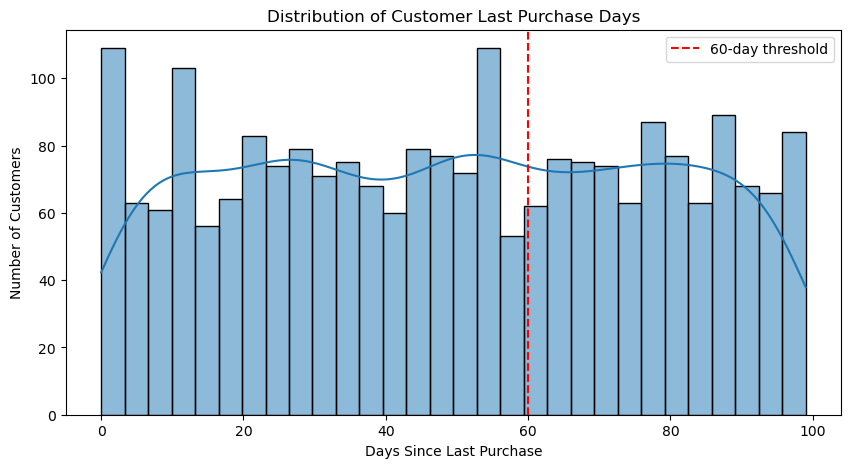

In [113]:
# Visualizing the distribution of 'last_purchase' days
plt.figure(figsize=(10,5))
sns.histplot(df['last_purchase'], bins=30, kde=True)
plt.axvline(x=60, color='red', linestyle='--', label='60-day threshold')
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Last Purchase Days")
plt.legend()
plt.show()


In [117]:
'''   
The chart displays the distribution of the days since customers last made a purchase, with a red line at 60 days indicating inactivity.
Based on the chart, 60 days was chosen as the threshold because it shows a significant decline in customer numbers after this period. 
It indicates most customers made their last purchase before reaching 60 days, making it ideal for identifying inactive customers.
Why not using 30 days as threshold?
30 days shows stable customer numbers, while 60 days indicates a clearer decline, making it better for identifying inactive customers.

'''

'   \nThe chart displays the distribution of the days since customers last made a purchase, with a red line at 60 days indicating inactivity.\nBased on the chart, 60 days was chosen as the threshold because it shows a significant decline in customer numbers after this period. \nIt indicates most customers made their last purchase before reaching 60 days, making it ideal for identifying inactive customers.\nWhy not using 30 days as threshold?\n30 days shows stable customer numbers, while 60 days indicates a clearer decline, making it better for identifying inactive customers.\n\n'

In [118]:
# Analyzing Retention and Churn Across Different Inactivity Thresholds
thresholds = range(30, 105, 15)  # Test 30 to 120 days in 15-day intervals
results = []

for t in thresholds:
    retention = (df['last_purchase'] < t).mean() * 100
    churn = (df['last_purchase'] >= t).mean() * 100
    results.append({'Threshold': t, 'Retention (%)': retention, 'Churn Rate (%)': churn})

results_df = pd.DataFrame(results)
print(results_df)


   Threshold  Retention (%)  Churn Rate (%)
0         30      30.892857       69.107143
1         45      44.508929       55.491071
2         60      60.535714       39.464286
3         75      75.401786       24.598214
4         90      90.267857        9.732143


In [119]:
# As the threshold increases, more customers are considered retained, and fewer are classified as churned.

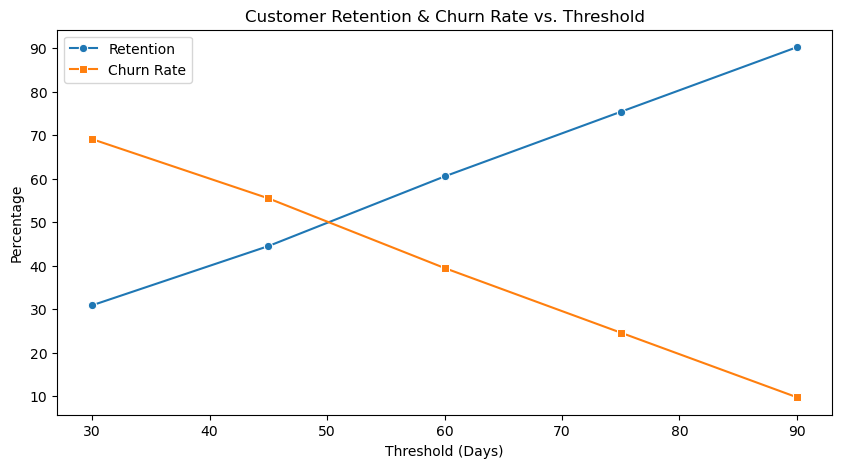

In [120]:
# Visualizing Retention and Churn Across Different Inactivity Thresholds
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x='Threshold', y='Retention (%)', marker='o', label="Retention")
sns.lineplot(data=results_df, x='Threshold', y='Churn Rate (%)', marker='s', label="Churn Rate")
plt.xlabel("Threshold (Days)")
plt.ylabel("Percentage")
plt.title("Customer Retention & Churn Rate vs. Threshold")
plt.legend()
plt.show()


In [121]:
'''The graph shows that retention increases while churn rate decreases as the threshold days extend,
indicating better retention over a longer period.
The intersection of retention and churn rates highlights the optimal threshold to reduce customer loss and improve retention strategies.'''

'The graph shows that retention increases while churn rate decreases as the threshold days extend,\nindicating better retention over a longer period.\nThe intersection of retention and churn rates highlights the optimal threshold to reduce customer loss and improve retention strategies.'

In [122]:
# Customer Engagement & Loyalty
active_threshold = 60  # Define X days for active customers
customer_retention = (df['last_purchase'] < active_threshold).mean() * 100
customer_churn_rate = (df['last_purchase'] >= active_threshold).mean() * 100
complaint_rate = (df['complaint'] == 1).mean() * 100

engagement = {
    'Customer Retention (%)': customer_retention,
    'Customer Churn Rate (%)': customer_churn_rate,
    'Complaint Rate (%)': complaint_rate
}

In [123]:
print("Customer Engagement:")
engagement

Customer Engagement:


{'Customer Retention (%)': 60.535714285714285,
 'Customer Churn Rate (%)': 39.464285714285715,
 'Complaint Rate (%)': 0.9375}

In [124]:
num_complaints = df[df['complaint'] == 1].shape[0]
print(f"Number of complaints: {num_complaints}")

Number of complaints: 21


In [125]:
df.shape

(2240, 31)

In [126]:
# Customer engagement data shows that 60.53% of customers are retained, while 39.47% have churned.
# The complaint rate is very low at 0.93%, indicating overall customer satisfaction.

In [127]:
# 3. Spending Behavior
# Total Spending per Customer = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
# Average Spending per Category (Mean/Median of each Mnt* column)
# Category Preference = % of total spending on each category
# High-Value Customers (HVCs) = Customers with top X% total spending

In [128]:
# Spending Behavior
total_spent = df[['spent_wine', 'spent_fruit', 'spent_meat', 'spent_fish', 'spent_sweet', 'spent_gold']].sum(axis=1)
average_spending = total_spent.mean()
high_value_customers = (total_spent > total_spent.quantile(0.80)).mean() * 100

spending = {
    'Average Spending per Customer': average_spending,
    'High-Value Customers (%)': high_value_customers
}

In [129]:
print("\nSpending Behavior:")
spending


Spending Behavior:


{'Average Spending per Customer': 605.7982142857143,
 'High-Value Customers (%)': 19.910714285714285}

In [ ]:
# Each customer spends about $605.8 on average, and around 19.91% are considered high-value customers who tend to spend more than the average.

In [130]:
# 4. Promotional Campaign Analysis
# Campaign Acceptance Rate = % of customers who accepted any campaign (AcceptedCmp* or Response = 1)
# Best Performing Campaign = Campaign with highest acceptance rate
# Customers Who Accept Multiple Campaigns = % of customers with multiple AcceptedCmp* = 1
# Effectiveness of Discounts = Correlation between NumDealsPurchases and Total Spending

In [140]:
total_cmp_acc = df[['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']].mean(axis=1)
campaign_acceptance_rate = (total_cmp_acc).mean() * 100
best_performing_campaign = df[['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']].mean().idxmax()

campaign_metrics = {
    'Campaign Acceptance Rate (%)': campaign_acceptance_rate,
    'Best Performing Campaign': best_performing_campaign
}

In [141]:
print("\nCampaign Behavior:")
campaign_metrics


Campaign Behavior:


{'Campaign Acceptance Rate (%)': 7.447916666666665,
 'Best Performing Campaign': 'last_cmp'}

In [133]:
# 5. Shopping Channel Analysis
# Average Purchases per Channel
# Website = NumWebPurchases
# Catalog = NumCatalogPurchases
# Store = NumStorePurchases
# Preferred Shopping Channel = % of total purchases made through each channel
# Website Engagement = Avg. NumWebVisitsMonth vs. NumWebPurchases
# Online vs. Offline Shopping Trend = Compare Web + Catalog vs. Store Purchases

In [142]:
# Shopping Channel Analysis
preferred_shopping_channel = df[['web_buy', 'catalog_buy', 'store_buy']].sum().idxmax()
website_engagement = (df['web_visits'].mean(), df['web_buy'].mean())

purchases = {
    'Preferred Shopping Channel': preferred_shopping_channel,
    'Website Engagement (Avg Visits vs Purchases)': website_engagement
}

In [143]:
print("\nShopping Channel Analysis:\n")
purchases


Shopping Channel Analysis:



{'Preferred Shopping Channel': 'store_buy',
 'Website Engagement (Avg Visits vs Purchases)': (5.316517857142857,
  4.084821428571429)}

In [76]:
# 6. Customer Segmentation & Clustering (Advanced)
# RFM Analysis (Recency, Frequency, Monetary)
# Recency = Recency
# Frequency = NumWebPurchases + NumCatalogPurchases + NumStorePurchases
# Monetary = Total Spending
# Customer Clustering (e.g., K-Means) based on spending, demographics, and engagemen

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

# RFM Analysis & Clustering
recency_score = pd.qcut(df['last_purchase'], 5, labels=[5,4,3,2,1]).astype(int)
frequency_score = pd.qcut(df['web_buy'] + df['catalog_buy'] + df['store_buy'], 5, labels=[1,2,3,4,5]).astype(int)
monetary_score = pd.qcut(total_spent, 5, labels=[1,2,3,4,5]).astype(int)
rfm_score = recency_score + frequency_score + monetary_score

df['total_spent'] = total_spent
df['total_cmp_acc'] = total_cmp_acc
df['Recency_Score'] = recency_score
df['Frequency_Score'] = frequency_score
df['Monetary_Score'] = monetary_score
df['RFM_Score'] = rfm_score

In [145]:
# RFM Analysis
recency_score = pd.qcut(df['last_purchase'], 5, labels=[5,4,3,2,1]).astype(int)
frequency_score = pd.qcut(df['web_buy'] + df['catalog_buy'] + df['store_buy'], 5, labels=[1,2,3,4,5]).astype(int)
monetary_score = pd.qcut(df['total_spent'], 5, labels=[1,2,3,4,5]).astype(int)
rf_segment = recency_score.astype(str) + frequency_score.astype(str)
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
df['Segment'] = rf_segment.replace(seg_map, regex=True)
df['Recency_Score'] = recency_score
df['Frequency_Score'] = frequency_score
df['Monetary_Score'] = monetary_score
df['RFM_Score'] = recency_score + frequency_score + monetary_score

In [146]:
# Ensure 'RFM_SCORE' is in string format to match regex patterns
df['RFM_SCORE'] = df['Recency_Score'].astype(str) + df['Frequency_Score'].astype(str)
df['segment'] = df['RFM_SCORE'].replace(seg_map, regex=True)
rfm_summary = df[["Segment", "Recency_Score", "Frequency_Score", "Monetary_Score"]].groupby("Segment").agg(["mean", "count"])
rfm_summary


Recency_Score       Frequency_Score       Monetary_Score  \
                             mean count            mean count           mean   
Segment                                                                        
about_to_sleep           3.000000   192        1.447917   192       1.536458   
at_Risk                  1.538889   360        3.488889   360       3.869444   
cant_loose               1.471338   157        5.000000   157       4.496815   
champions                5.000000   168        4.422619   168       4.297619   
hibernating              1.460490   367        1.468665   367       1.599455   
loyal_customers          3.482659   346        4.456647   346       4.341040   
need_attention           3.000000    79        3.000000    79       3.354430   
new_customers            5.000000   111        1.000000   111       1.297297   
potential_loyalists      4.508621   348        2.548851   348       2.775862   
promising                4.000000   112        1.000000   112       1.196429   

                           
                    count  
Segment                    
about_to_sleep        192  
at_Risk               360  
cant_loose            157  
champions             168  
hibernating           367  
loyal_customers       346  
need_attention         79  
new_customers         111  
potential_loyalists   348  
promising             112

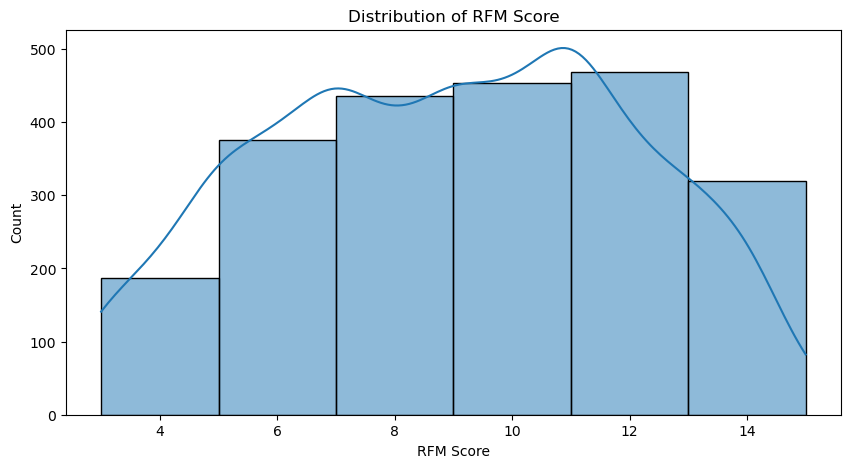

In [147]:
# **Visualisasi Distribusi RFM Scores**
plt.figure(figsize=(10, 5))
sns.histplot(df['RFM_Score'], bins=6, kde=True)
plt.title("Distribution of RFM Score")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.show()

In [149]:
# Treemap Visualization of Customer Segments with Count and Percentage
df_treemap = df.groupby("Segment").size().reset_index(name="count")
df_treemap["percent"] = (df_treemap["count"] / df_treemap["count"].sum() * 100).round(2)
df_treemap["Parent"] = "Customer Segments"
fig = px.treemap(
    df_treemap, 
    path=["Parent", "Segment"], 
    values="count", 
    title="Recency and Frequency Grid",
    color="Segment",
    color_discrete_map={
        "Champions": "lightblue",
        "Loyal Customers": "grey",
        "Potential Loyalists": "lightgreen",
        "New Customers": "gold",
        "Promising": "yellow",
        "Need Attention": "khaki",
        "About To Sleep": "lightcyan",
        "Hibernating": "lightsteelblue",
        "At Risk": "coral",
        "Can't Lose Them": "red",
    }
)
fig.update_traces(
    texttemplate="<b>%{label}</b><br>%{value} customers<br>(%{customdata:.2f}%)",
    customdata=df_treemap["percent"],
    textinfo="label+text"
)
fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),
    height=800,
    width=1000,
)
fig.show()


In [82]:
'''  
Targeted Campaign Strategies
1) Discount for "At Risk" & "Can't Lose Them"
These customers used to shop frequently but have started to drop off. A well-timed discount can encourage them to return before they leave for good.
Example: "We miss you! Here’s 20% off just for you!"
2) Bundling for "Loyal Customers"
Your most engaged and high-value customers deserve something special. Exclusive bundles or VIP deals will make them feel appreciated and keep them coming back.
Example: "Exclusive bundle just for our VIP customers!"
3) Awareness Campaign for "New Customers" & "Promising"
New customers need a reason to stay. Educate them about your products and offer incentives like a discount on their next purchase or a trial package.
Example: "Your journey starts here! Try our best-selling bundle at a special price!"
4) Reactivation Campaign focuses on bringing back inactive customers (At Risk Customers, Hibernating Customers, Can't Lose Them) with personalized messages and exclusive offers.
Example: "We miss you! Enjoy 20% off your next purchase!"
'''

'  \nTargeted Campaign Strategies\n1) Discount for "At Risk" & "Can\'t Lose Them"\nThese customers used to shop frequently but have started to drop off. A well-timed discount can encourage them to return before they leave for good.\nExample: "We miss you! Here’s 20% off just for you!"\n2) Bundling for "Loyal Customers"\nYour most engaged and high-value customers deserve something special. Exclusive bundles or VIP deals will make them feel appreciated and keep them coming back.\nExample: "Exclusive bundle just for our VIP customers!"\n3) Awareness Campaign for "New Customers" & "Promising"\nNew customers need a reason to stay. Educate them about your products and offer incentives like a discount on their next purchase or a trial package.\nExample: "Your journey starts here! Try our best-selling bundle at a special price!"\n4) Reactivation Campaign focuses on bringing back inactive customers (At Risk Customers, Hibernating Customers, Can\'t Lose Them) with personalized messages and exclu

#### 2) Marketing Analysis

#### 2.a. Customer Analysis based on Demographic and Behavioral
- Income Based Preferences Analysis
- Cohort Analysis
- RFM Analysis
- CLV

2.a.1 Income Based Preferences Analysis

In [150]:
df['income'].describe()

count      2240.000000
mean      51651.881920
std       20538.551456
min        1730.000000
25%       35616.750000
50%       51381.500000
75%       68098.250000
max      113734.000000
Name: income, dtype: float64

In [151]:
''' 
https://commons.wikimedia.org/wiki/File:United_States_Class_Structure_Comparison,1984-2014.jpg
https://en-academic.com/dic.nsf/enwiki/17959
Even though the theory was established in 2004, it is still relevant based on the Science Journal of Sociology and Anthropology 
under the title "Middle Class: For Itself and for the Others," 
written by Anna Tarkhnishvili and published in 2013.
https://www.academia.edu/96823459/Middle_Class_For_Itself_and_for_the_Others?auto=download
'''

' \nhttps://commons.wikimedia.org/wiki/File:United_States_Class_Structure_Comparison,1984-2014.jpg\nhttps://en-academic.com/dic.nsf/enwiki/17959\nEven though the theory was established in 2004, it is still relevant based on the Science Journal of Sociology and Anthropology \nunder the title "Middle Class: For Itself and for the Others," \nwritten by Anna Tarkhnishvili and published in 2013.\nhttps://www.academia.edu/96823459/Middle_Class_For_Itself_and_for_the_Others?auto=download\n'

In [152]:
def cat_income(income):
    if income > 500000:
        return 'Upper Class'
    elif 100000 <= income <= 500000:
        return 'Upper Middle Class' # professional class or white collars (high educational attainment (advanced post-secondary education)
    elif 35000 <= income < 100000:
        return 'Lower Middle Class' # semi-professionals, people in technical and lower-level management positions who work for those in the upper middle class. this subclass have lower educational attainment
    elif 16000 <= income < 35000:
        return 'Working Class'
    else:
        return 'Lower Class'
df['income_level']= df['income'].apply(cat_income)

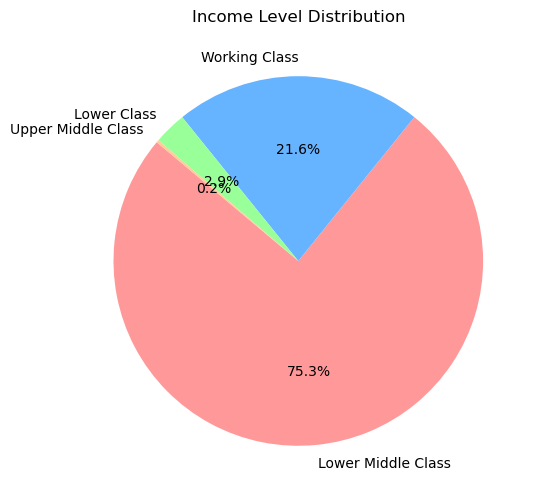

In [153]:
income_counts = df['income_level'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], startangle=140)
plt.title('Income Level Distribution')
plt.show()

In [158]:
# Calculates the percentage of spending per category based in categorizes income levels
# and visualizes the spending distribution across different income groups
df_products = ['spent_wine', 'spent_gold', 'spent_meat', 'spent_fish', 'spent_sweet']
income_prod_summ = df.groupby('income_level')[df_products].sum().reset_index()
income_prod_summ[df_products] = income_prod_summ[df_products].div(
    income_prod_summ[df_products].sum(axis=1), axis=0
) * 100
income_prod_melt = income_prod_summ.melt(id_vars=['income_level'], 
                                         var_name='df_products', 
                                         value_name='pct_spent')
income_prod_melt = income_prod_melt.sort_values(by='pct_spent', ascending=False)
income_prod = px.bar(
    income_prod_melt, x='income_level', y='pct_spent', color='df_products', 
    title='Percentage of Total Spending by Income Group (Grouped)', 
    barmode='group', text='pct_spent'
)
income_prod.update_layout(
    xaxis_title='Income Group',
    yaxis_title='Percentage of Spending (%)',
    legend_title='Product Categories'
)
income_prod.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
for trace in income_prod.data:
    trace.name = trace.name.replace('spent_', '')
income_prod.show()



In [464]:
'''   
- In general, wine stands out as the most preferred product among the community, except for the lower-income group.
- Meanwhile, lower-income families tend to allocate more of their spending on meat.
- Additionally, sweet products are the least favored compared to other categories.
'''

In [ ]:
corr_results = {}
for product in df_products:
    corr = np.corrcoef(df['income'], df[product])[0, 1]
    corr_results[product] = corr
for product, corr in corr_results.items():
    print(f"The correlation between income dan {product}: {corr:.2f}")


The correlation between income dan spent_wine: 0.73
The correlation between income dan spent_gold: 0.41
The correlation between income dan spent_meat: 0.68
The correlation between income dan spent_fish: 0.55
The correlation between income dan spent_sweet: 0.55


In [ ]:
'''   
- Spending on wine (0.73) and meat (0.69) correlates strongly with income, indicating higher income leads to greater spending in these categories.
- Fish (0.55), sweet (0.55), and gold (0.42) show moderate positive correlation, reflecting similar but less pronounced trends.
- Overall, spending increases with income across all products. Wine and meat appear to be valuable products more strongly associated with wealthier individuals.
'''

2.a.2. Cohort Analysis

In [163]:
import pandas as pd
df['year_month'] = df['dt_cust'].dt.to_period('M')
result = df.groupby('year_month')['id'].count().reset_index()
result.columns = ['year_month', 'cust_count']
result


,year_month,cust_count
0,2012-07,2
1,2012-08,118
2,2012-09,99
3,2012-10,95
4,2012-11,97
5,2012-12,83
6,2013-01,107
7,2013-02,100
8,2013-03,102
9,2013-04,88


In [164]:
from datetime import datetime, timedelta
# Function to calculate the start date based on Recency and set to the 1st day of the month
# Apply the function to the DataFrame and create the 'last_buy' column
today = datetime(2014, 7, 1)

def calc_last_buy(last_purchase):
    last_buy_date = today - timedelta(days=last_purchase)
    return last_buy_date.replace(day=1)
df['last_buy'] = df['last_purchase'].apply(calc_last_buy)

In [165]:
# Calculate the difference in years and months between Dt_Customer and last_buy, and save it in the cohort index
# Calculate the year and month difference between Dt_Customer and last_buy
import pandas as pd
year_diff = df['last_buy'].dt.year - df['dt_cust'].dt.year
month_diff = df['last_buy'].dt.month - df['dt_cust'].dt.month + 1
month_diff = month_diff % 12
df['month_diff'] = month_diff
df['year_diff'] = year_diff
df['cohort_index'] = year_diff * 12 + month_diff
df.head()

,id,edu,income,kid_cnt,teen_cnt,dt_cust,last_purchase,spent_wine,spent_fruit,spent_meat,...,RFM_Score,Segment,RFM_SCORE,segment,income_level,year_month,last_buy,month_diff,year_diff,cohort_index
0,5524,1,58138.0,0,0,2012-09-04,58,635,88,546,...,13,loyal_customers,35,loyal_customers,Lower Middle Class,2012-09,2014-05-01,9,2,33
1,2174,1,46344.0,1,1,2014-03-08,38,11,1,6,...,6,promising,41,promising,Lower Middle Class,2014-03,2014-05-01,3,0,3
2,4141,1,71613.0,0,0,2013-08-21,26,426,49,127,...,12,loyal_customers,44,loyal_customers,Lower Middle Class,2013-08,2014-06-01,11,1,23
3,6182,1,26646.0,0,1,2014-02-10,26,11,4,20,...,7,potential_loyalists,42,potential_loyalists,Working Class,2014-02,2014-06-01,5,0,5
4,5324,3,58293.0,0,1,2014-01-19,94,173,43,118,...,7,at_Risk,13,at_Risk,Lower Middle Class,2014-01,2014-03-01,3,0,3


In [167]:
# Calculate the difference in years and months between Dt_Customer and last_buy, and save it in the cohort index
# Calculate the year and month difference between Dt_Customer and last_buy
import pandas as pd
year_diff = df['last_buy'].dt.year - df['dt_cust'].dt.year
year_diff = np.maximum(year_diff - 1, 0)
month_diff = df['last_buy'].dt.month - df['dt_cust'].dt.month + 1
month_diff = month_diff % 12
df['month_diff'] = month_diff
df['year_diff'] = year_diff
df['cohort_index'] = year_diff * 12 + month_diff
df.head()

,id,edu,income,kid_cnt,teen_cnt,dt_cust,last_purchase,spent_wine,spent_fruit,spent_meat,...,RFM_Score,Segment,RFM_SCORE,segment,income_level,year_month,last_buy,month_diff,year_diff,cohort_index
0,5524,1,58138.0,0,0,2012-09-04,58,635,88,546,...,13,loyal_customers,35,loyal_customers,Lower Middle Class,2012-09,2014-05-01,9,1,21
1,2174,1,46344.0,1,1,2014-03-08,38,11,1,6,...,6,promising,41,promising,Lower Middle Class,2014-03,2014-05-01,3,0,3
2,4141,1,71613.0,0,0,2013-08-21,26,426,49,127,...,12,loyal_customers,44,loyal_customers,Lower Middle Class,2013-08,2014-06-01,11,0,11
3,6182,1,26646.0,0,1,2014-02-10,26,11,4,20,...,7,potential_loyalists,42,potential_loyalists,Working Class,2014-02,2014-06-01,5,0,5
4,5324,3,58293.0,0,1,2014-01-19,94,173,43,118,...,7,at_Risk,13,at_Risk,Lower Middle Class,2014-01,2014-03-01,3,0,3


In [168]:
df.columns

Index(['id', 'edu', 'income', 'kid_cnt', 'teen_cnt', 'dt_cust',
       'last_purchase', 'spent_wine', 'spent_fruit', 'spent_meat',
       'spent_fish', 'spent_sweet', 'spent_gold', 'deals_buy', 'web_buy',
       'catalog_buy', 'store_buy', 'web_visits', 'cmp3', 'cmp4', 'cmp5',
       'cmp1', 'cmp2', 'complaint', 'last_cmp', 'total_spent', 'age',
       'is_parent', 'total_cmp_acc', 'household', 'gen', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'RFM_Score', 'Segment',
       'RFM_SCORE', 'segment', 'income_level', 'year_month', 'last_buy',
       'month_diff', 'year_diff', 'cohort_index'],
      dtype='object')

In [169]:
df['count_buy'] = df[['web_buy', 'catalog_buy', 'store_buy', 'web_visits']].sum(axis=1)
df[['id', 'count_buy', 'year_month', 'last_purchase', 'cohort_index']]

,id,count_buy,year_month,last_purchase,cohort_index
0,5524,29,2012-09,58,21
1,2174,9,2014-03,38,3
2,4141,24,2013-08,26,11
3,6182,12,2014-02,26,5
4,5324,19,2014-01,94,3
...,...,...,...,...,...
2235,10870,21,2013-06,46,0
2236,4001,22,2014-06,56,0
2237,7270,24,2014-01,91,4
2238,8235,24,2014-01,8,6


In [170]:
# Maximum possible months based on cohort_index
max_months = df['cohort_index'].max()

# Initialize ord columns up to cohort_index
for i in range(1, max_months + 1):
    column_name = f'ord{i}'
    df[column_name] = 0  # Set all ord columns to 0 initially

# Distribute count_buy starting with ord1
for idx, row in df.iterrows():
    count = row['count_buy']
    cohort_index = row['cohort_index']
    
    # Set ord1 to 1 (first purchase always goes here)
    df.at[idx, 'ord1'] = 1
    count -= 1  # Decrease remaining purchases

    # Evenly distribute the remaining count_buy across ord2 to ord(cohort_index)
    if count > 0:
        step = max(1, (cohort_index - 1) // count)  # Calculate step interval
        month = 2  # Start from ord2
        while count > 0 and month <= cohort_index:
            df.at[idx, f'ord{month}'] = 1  # Assign 1 purchase
            count -= 1  # Decrease remaining purchases
            month += step  # Move to the next step interval

In [171]:
cohort_cumulative = df.pivot_table(
    index='year_month',  # Cohort start (e.g., year and month of first purchase)
    columns='cohort_index',  # Cohort index (e.g., time elapsed in months)
    values='count_buy',  # Metric to analyze (e.g., number of customers or purchases)
    aggfunc='sum'  # Aggregation function (e.g., sum or mean)
)


In [172]:
cohort_cumulative = cohort_cumulative.cumsum(axis=1)


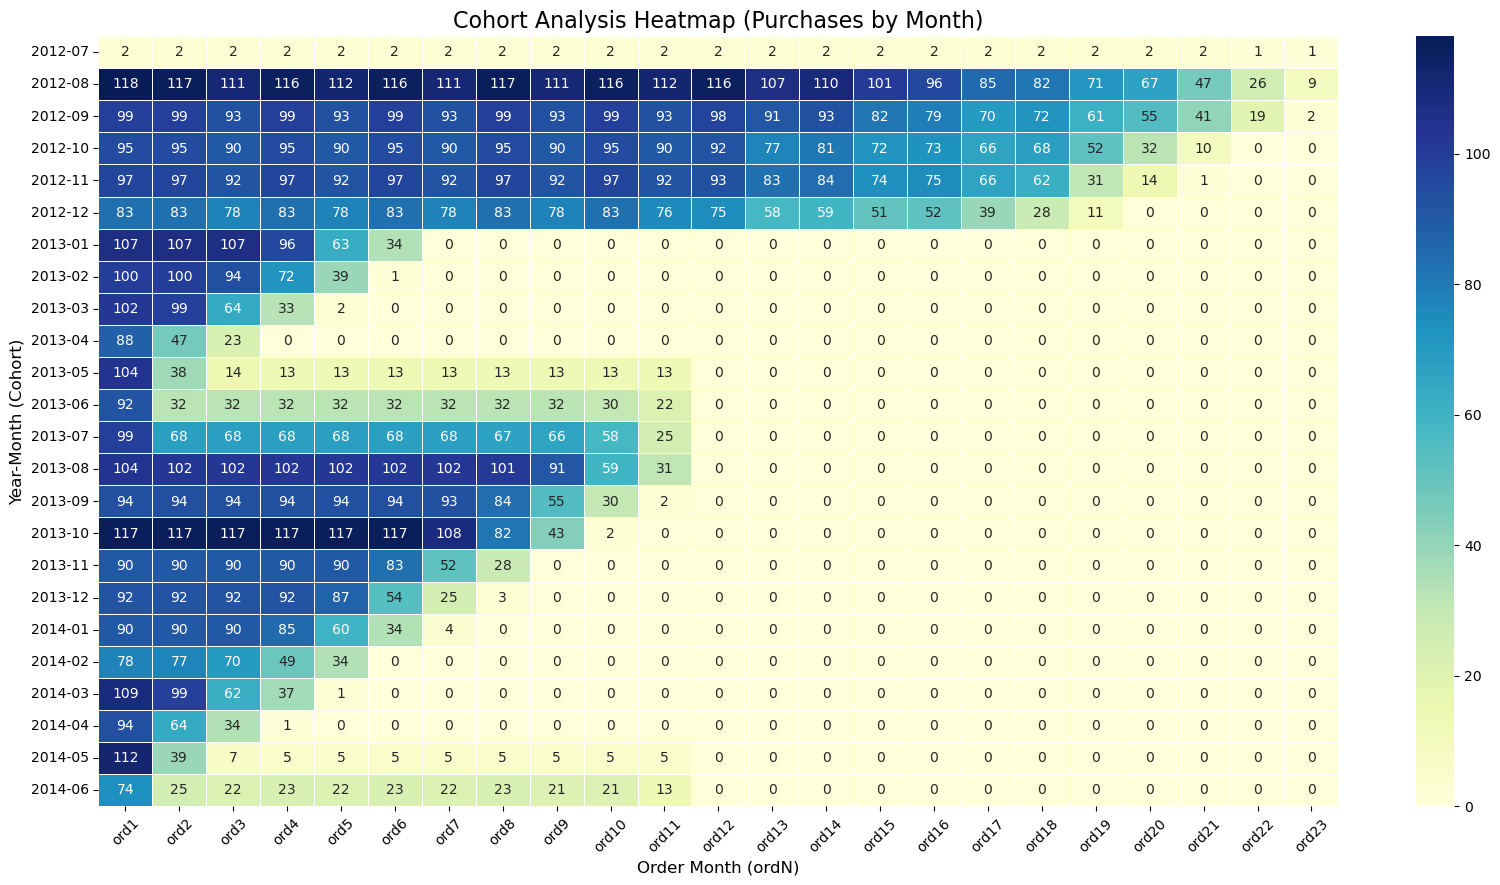

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame with ordN columns and a year_month column
ord_columns = [col for col in df.columns if col.startswith('ord')]  # Select ordN columns

# Group by year_month and sum the ordN columns
cohort_summary = df.groupby('year_month')[ord_columns].sum()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cohort_summary, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

plt.title("Cohort Analysis Heatmap (Purchases by Month)", fontsize=16)
plt.ylabel("Year-Month (Cohort)", fontsize=12)
plt.xlabel("Order Month (ordN)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)  # Keep y-axis labels upright
plt.show()


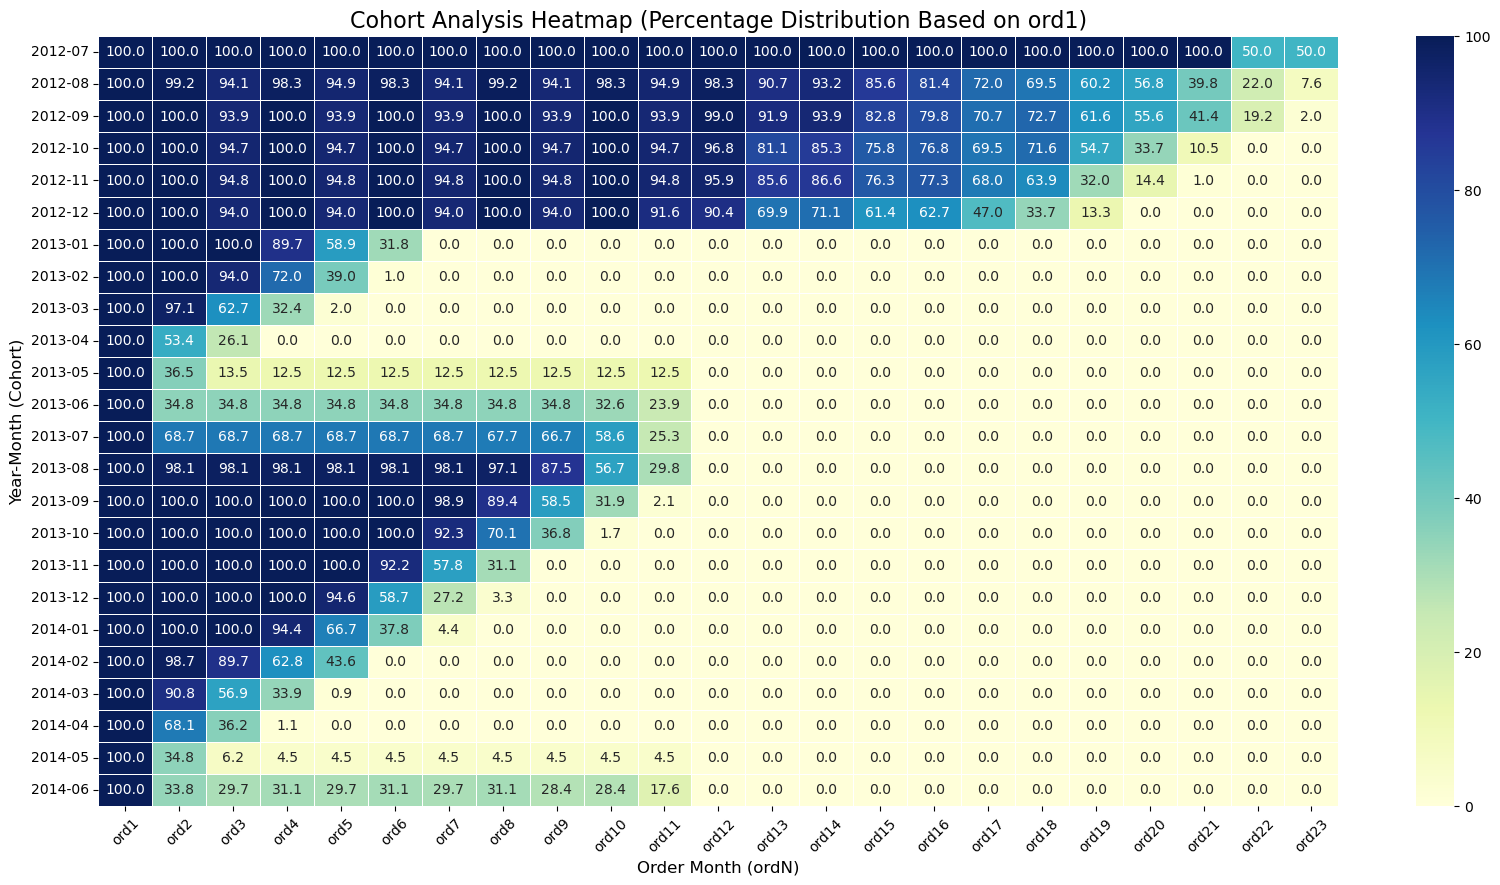

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `cohort_summary` is your DataFrame with ordN sums grouped by year_month
# Calculate percentages based on ord1
cohort_percentage = cohort_summary.div(cohort_summary['ord1'], axis=0) * 100

# Plotting the heatmap for percentage distribution
plt.figure(figsize=(20, 10))
sns.heatmap(cohort_percentage, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

plt.title("Cohort Analysis Heatmap (Percentage Distribution Based on ord1)", fontsize=16)
plt.ylabel("Year-Month (Cohort)", fontsize=12)
plt.xlabel("Order Month (ordN)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.yticks(rotation=0)  # Keep y-axis labels upright
plt.show()


In [ ]:
'''   
1. The graph shows two distinct trends cab be observed. 
2. Customer retention starts high in the early months across all cohorts but gradually declines over time.
3. The 3rd quartile shows stable retention with a slight downward trend, reflecting positive retention performance.
4. In contrast, the first semester faces the highest churn rate, posing a significant challenge for the company.
'''

'   \n1. The graph shows two distinct trends cab be observed. \n2. Customer retention starts high in the early months across all cohorts but gradually declines over time.\n3. The second semester shows stable retention with a slight downward trend, reflecting positive retention performance.\n4. In contrast, the first semester faces the highest churn rate, posing a significant challenge for the company.\n'

ACTIVE VS INACTIVE

In [176]:
df['status_temp'] = df['last_purchase'].apply(lambda x: 'inactive' if x > 60 else 'active')
# Group by status and segment, then count
status_segment_count = df.groupby(['status_temp', 'segment']).size().unstack().fillna(0)
status_segment_count

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
status_temp,,,,,,,,,,
active,192.0,10.0,5.0,168.0,7.0,346.0,79.0,111.0,348.0,112.0
inactive,0.0,350.0,152.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0


In [177]:
'''  
The inactive but valuable segments, "At Risk" (350) and "Can't Lose Them" (152), represent high-potential customers. 
Reactivation should focus on personalized offers, exclusive perks, and urgency to regain their loyalty and prevent loss.
'''

'  \nThe inactive but valuable segments, "At Risk" (350) and "Can\'t Lose Them" (152), represent high-potential customers. \nReactivation should focus on personalized offers, exclusive perks, and urgency to regain their loyalty and prevent loss.\n'

In [179]:
# Customer segment based on enrollment year has the highest retention
filtered_df = df[df['status_temp'] == 'active']
grouped_data = filtered_df.groupby(['year_month', 'segment']).size().unstack(fill_value=0)
grouped_data

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
year_month,,,,,,,,,,
2012-07,0,0,0,0,0,1,0,0,0,0
2012-08,10,1,0,5,0,18,6,1,22,2
2012-09,5,1,0,18,0,21,3,3,18,1
2012-10,8,1,0,6,2,16,3,4,12,5
2012-11,3,0,0,8,0,19,2,4,12,6
2012-12,5,1,0,3,0,10,3,6,17,4
2013-01,12,0,0,8,0,23,2,4,13,1
2013-02,7,1,0,8,1,20,4,6,19,3
2013-03,10,1,0,8,0,14,4,3,16,6


In [180]:
'''
Loyal Customers remain stable, and Potential Loyalists are growing, showing successful engagement. 
However, At Risk customers need attention for reactivation. Efforts to convert Potential Loyalists into loyal customers are progressing well.
'''

'\nLoyal Customers remain stable, and Potential Loyalists are growing, showing successful engagement. \nHowever, At Risk customers need attention for reactivation. Efforts to convert Potential Loyalists into loyal customers are progressing well.\n'

2.a.3 Customer Lifetime Value

In [181]:
# CLV will calculate at Marketing Performance Analysis

#### 2.b) Marketing Performance Analysis

In [182]:
# Acceptance Rate for Each Campaign
# Calculate acceptance rates for all campaigns
campaigns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']
acceptance_rates = {campaign: df[campaign].mean() * 100 for campaign in campaigns}

# Convert to a DataFrame for better visualization
import pandas as pd
acceptance_df = pd.DataFrame(list(acceptance_rates.items()), columns=['Campaign', 'Acceptance Rate (%)'])
print(acceptance_df)


   Campaign  Acceptance Rate (%)
0      cmp1             6.428571
1      cmp2             1.339286
2      cmp3             7.276786
3      cmp4             7.455357
4      cmp5             7.276786
5  last_cmp            14.910714


In [183]:
import plotly.express as px

fig = px.bar(acceptance_df, x='Campaign', y='Acceptance Rate (%)',
             title='Acceptance Rates by Campaign', color='Campaign')
fig.show()


In [184]:
sales_per_campaign = {
    'cmp1': df[df['cmp1'] == 1]['total_spent'].sum(),
    'cmp2': df[df['cmp2'] == 1]['total_spent'].sum(),
    'cmp3': df[df['cmp3'] == 1]['total_spent'].sum(),
    'cmp4': df[df['cmp4'] == 1]['total_spent'].sum(),
    'cmp5': df[df['cmp5'] == 1]['total_spent'].sum(),
    'last_cmp': df[df['last_cmp'] == 1]['total_spent'].sum(),
}
for campaign, sales in sales_per_campaign.items():
    print(f"{campaign} Sales: {sales}")


cmp1 Sales: 213440
cmp2 Sales: 39230
cmp3 Sales: 117448
cmp4 Sales: 190902
cmp5 Sales: 263426
last_cmp Sales: 329789


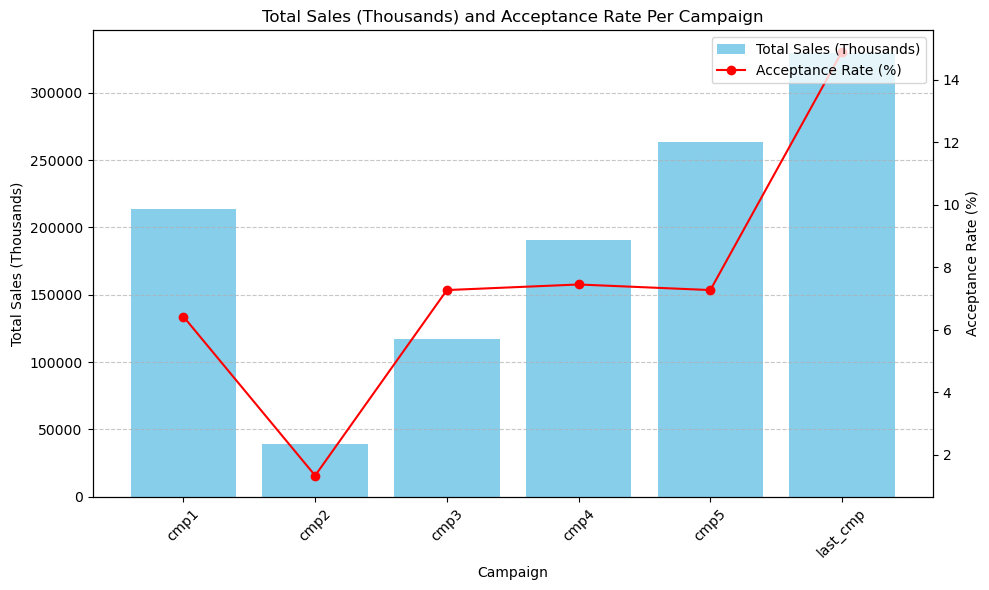

In [185]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart: Total Sales per Campaign
sales_df = pd.DataFrame(list(sales_per_campaign.items()), columns=['Campaign', 'Total Sales'])
sales_df['Total Sales (Thousands)'] = sales_df['Total Sales']
ax1.bar(sales_df['Campaign'], sales_df['Total Sales (Thousands)'], color='skyblue', label='Total Sales (Thousands)')
ax1.set_title('Total Sales (Thousands) and Acceptance Rate Per Campaign')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Total Sales (Thousands)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Line Chart: Acceptance Rate per Campaign
acceptance_df = pd.DataFrame(list(acceptance_rates.items()), columns=['Campaign', 'Acceptance Rate'])
ax2 = ax1.twinx()
ax2.plot(acceptance_df['Campaign'], acceptance_df['Acceptance Rate'], marker='o', linestyle='-', color='red', label='Acceptance Rate (%)')
ax2.set_ylabel('Acceptance Rate (%)')

labels = list(sales_df['Campaign'])
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels, rotation=45)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [186]:
''' 
Most campaigns saw sales go up, with acceptance rates bouncing around a bit.
Basically, "last_cmp" is the winner, and "cmp2" needs a an evaluate.
'''

' \nMost campaigns saw sales go up, with acceptance rates bouncing around a bit.\nBasically, "last_cmp" is the winner, and "cmp2" needs a an evaluate.\n'

In [187]:
# Generalized pairwise comparison with hypothesis testing
for i, campaign1 in enumerate(campaigns):
    for campaign2 in campaigns[i+1:]:
        cmp1 = df[campaign1].value_counts()
        cmp2 = df[campaign2].value_counts()

        # Get unique values from both campaigns
        unique_values = sorted(list(set(cmp1.index) | set(cmp2.index)))

        # Create contingency table dynamically
        contingency_table = []
        for value in unique_values:
            count1 = cmp1.get(value, 0)  # Get count, default to 0 if value not found
            count2 = cmp2.get(value, 0)
            contingency_table.append([count1, count2])

        # Perform Chi-Square test
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        # Print results
        print(f"Comparison: {campaign1} vs {campaign2}")
        print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")

        # # State hypotheses
        # print("H0: The response rates between the two campaigns are independent.")
        # print("Ha: The response rates between the two campaigns are dependent.")

        # Decision
        if p_value < 0.05:
            print("Decision: Reject H0 (Significant difference in response rates).")
        else:
            print("Decision: Fail to Reject H0 (No significant difference in response rates).")
        print("")

Comparison: cmp1 vs cmp2
Chi-Square Statistic: 76.35045459156163, P-value: 2.3753671294574718e-18
Decision: Reject H0 (Significant difference in response rates).

Comparison: cmp1 vs cmp3
Chi-Square Statistic: 1.1330165770179166, P-value: 0.2871328110878396
Decision: Fail to Reject H0 (No significant difference in response rates).

Comparison: cmp1 vs cmp4
Chi-Square Statistic: 1.6723650832704102, P-value: 0.19594205031469228
Decision: Fail to Reject H0 (No significant difference in response rates).

Comparison: cmp1 vs cmp5
Chi-Square Statistic: 1.1330165770179166, P-value: 0.2871328110878396
Decision: Fail to Reject H0 (No significant difference in response rates).

Comparison: cmp1 vs last_cmp
Chi-Square Statistic: 83.65591262945932, P-value: 5.88838754884313e-20
Decision: Reject H0 (Significant difference in response rates).

Comparison: cmp2 vs cmp3
Chi-Square Statistic: 94.34417343190825, P-value: 2.6516628480762646e-22
Decision: Reject H0 (Significant difference in response rate

In [189]:
'''
- Campaign 2 is significantly different from all other campaigns, that may reflect an ineffective strategy.
- The Last Campaign also stands out, showing significant differences from all others, suggesting a unique response pattern that may reflect a highly effective.
- Campaigns 1, 3, 4, and 5 show no significant differences, indicating similar performance and potential for grouped strategic evaluation.
'''

'\n- Campaign 2 is significantly different from all other campaigns, that may reflect an ineffective strategy.\n- The Last Campaign also stands out, showing significant differences from all others, suggesting a unique response pattern that may reflect a highly effective.\n- Campaigns 1, 3, 4, and 5 show no significant differences, indicating similar performance and potential for grouped strategic evaluation.\n'

In [ ]:
# CLV Calculation (Assumption: Avg. Customer Lifespan = 2.5 years, since cust. retention around 60%, Discount Rate = 10%)
purchase_frequency = df["store_buy"] + df["web_buy"] + df["catalog_buy"]
average_order_value = df["total_spent"] / purchase_frequency.replace(0, 1)  # Avoid division by zero
customer_churn_rate = (df['last_purchase'] >= active_threshold).mean() * 100 
customer_value = average_order_value * purchase_frequency
clv = (customer_value * 5) / (1 + customer_churn_rate)
df["CLV"] = clv
repeat_purchase_rate = (df["store_buy"] + df["web_buy"] + df["catalog_buy"] > 1).mean() * 100
aov = df["total_spent"].sum() / purchase_frequency.sum()

In [192]:
# Display key metrics
churn, repeat_purchase_rate, aov, df[["id", "CLV"]].head()

(9.732142857142858,
 99.46428571428572,
 48.32062101627319,
      id         CLV
 0  5524  199.805825
 1  2174    3.336275
 2  4141   95.887026
 3  6182    6.548985
 4  5324   52.144748)

In [193]:
selected_columns = ['id', 'gen', 'segment', 'year_month','deals_buy', 'web_buy',
       'catalog_buy', 'store_buy', 'web_visits', 'cmp3', 'cmp4', 'cmp5',
       'cmp1', 'cmp2', 'complaint', 'last_cmp', 'last_purchase']
df[selected_columns]

,id,gen,segment,year_month,deals_buy,web_buy,catalog_buy,store_buy,web_visits,cmp3,cmp4,cmp5,cmp1,cmp2,complaint,last_cmp,last_purchase
0,5524,Boomers,loyal_customers,2012-09,3,8,10,4,7,0,0,0,0,0,0,1,58
1,2174,Boomers,promising,2014-03,2,1,1,2,5,0,0,0,0,0,0,0,38
2,4141,Gen X,loyal_customers,2013-08,1,8,2,10,4,0,0,0,0,0,0,0,26
3,6182,Millennials,potential_loyalists,2014-02,2,2,0,4,6,0,0,0,0,0,0,0,26
4,5324,Millennials,at_Risk,2014-01,5,5,3,6,5,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Gen X,loyal_customers,2013-06,2,9,3,4,5,0,0,0,0,0,0,0,46
2236,4001,Boomers,need_attention,2014-06,7,8,2,5,7,0,0,0,1,0,0,0,56
2237,7270,Millennials,at_Risk,2014-01,1,2,3,13,6,0,1,0,0,0,0,0,91
2238,8235,Boomers,champions,2014-01,2,6,5,10,3,0,0,0,0,0,0,0,8


In [194]:
year_month_segment_count = df.groupby(['year_month', 'segment']).size().unstack().fillna(0)
year_month_segment_count

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
year_month,,,,,,,,,,
2012-07,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-08,10.0,27.0,12.0,5.0,15.0,18.0,6.0,1.0,22.0,2.0
2012-09,5.0,11.0,8.0,18.0,11.0,21.0,3.0,3.0,18.0,1.0
2012-10,8.0,22.0,11.0,6.0,8.0,16.0,3.0,4.0,12.0,5.0
2012-11,3.0,19.0,14.0,8.0,10.0,19.0,2.0,4.0,12.0,6.0
2012-12,5.0,16.0,3.0,3.0,16.0,10.0,3.0,6.0,17.0,4.0
2013-01,12.0,15.0,10.0,8.0,19.0,23.0,2.0,4.0,13.0,1.0
2013-02,7.0,16.0,8.0,8.0,9.0,20.0,4.0,6.0,19.0,3.0
2013-03,10.0,17.0,10.0,8.0,14.0,14.0,4.0,3.0,16.0,6.0


In [195]:
# Loyal_Customers and Champions remain relatively steady but do not show a strong upward trend -> retention
# The at_Risk and cant loose segments have relatively high counts across multiple months -> re-engage

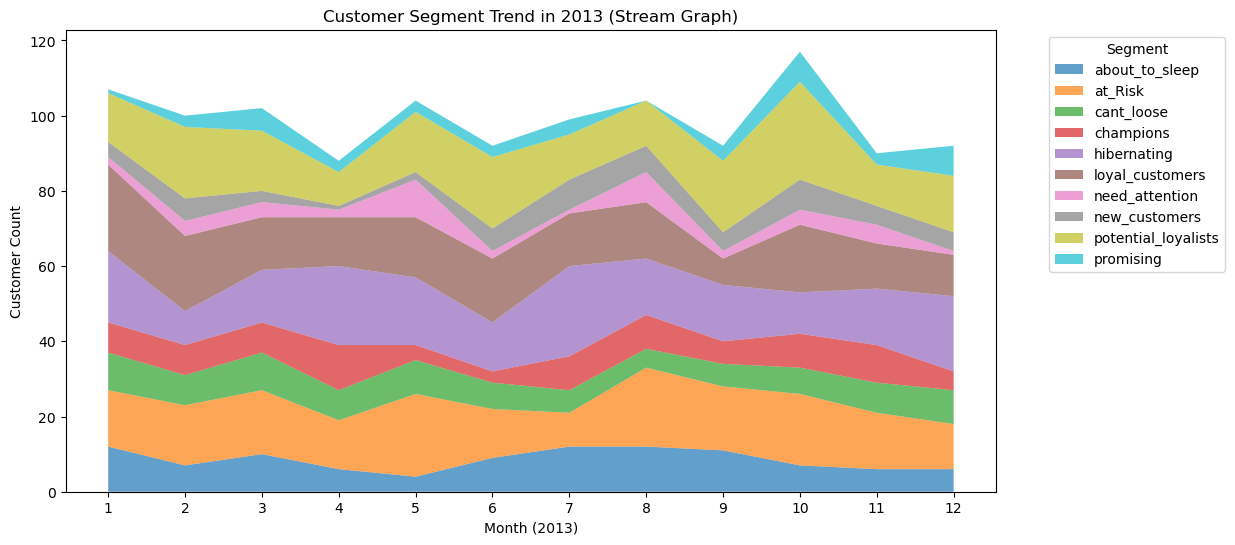

In [226]:
selected_year = 2013
df['year_temp'] = df['dt_cust'].dt.year
df['month_temp'] = df['dt_cust'].dt.month
df_filtered = df[df['year_temp'] == selected_year]
year_month_segment = df_filtered.groupby(['month_temp', 'segment']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
plt.stackplot(year_month_segment.index, 
              [year_month_segment[seg] for seg in year_month_segment.columns], 
              labels=year_month_segment.columns, alpha=0.7)
plt.xlabel(f'Month ({selected_year})')
plt.ylabel('Customer Count')
plt.title(f'Customer Segment Trend in {selected_year} (Stream Graph)')
plt.xticks(year_month_segment.index)
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [196]:
df['status_temp'] = df['last_purchase'].apply(lambda x: 'inactive' if x > 60 else 'active')
status_segment_count = df.groupby(['status_temp', 'segment']).size().unstack().fillna(0)
status_segment_count

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
status_temp,,,,,,,,,,
active,192.0,10.0,5.0,168.0,7.0,346.0,79.0,111.0,348.0,112.0
inactive,0.0,350.0,152.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# Campaign Acceptance Analysis by Customer Segment
campaign_columns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp', 'segment']
accepted_campaigns = df.melt(id_vars=['segment'], 
                             value_vars=['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp'], 
                             var_name='campaign', 
                             value_name='accepted')
accepted_campaigns = accepted_campaigns[accepted_campaigns['accepted'] == 1]
campaign_segment_counts = accepted_campaigns.pivot_table(index='campaign', 
                                                         columns='segment', 
                                                         aggfunc='size', 
                                                         fill_value=0)
campaigns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']
acceptance_rates = {campaign: df[campaign].mean() * 100 for campaign in campaigns}
acceptance_df = pd.DataFrame(acceptance_rates.items(), columns=['campaign', 'Acceptance Rate (%)'])
acceptance_df.set_index('campaign', inplace=True)
campaign_segment_counts = campaign_segment_counts.join(acceptance_df)
campaign_segment_counts


,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising,Acceptance Rate (%)
campaign,,,,,,,,,,,
cmp1,0,29,26,20,0,50,7,0,12,0,6.428571
cmp2,0,7,7,4,1,7,0,0,2,2,1.339286
cmp3,12,25,12,16,19,31,2,12,21,13,7.276786
cmp4,3,47,22,23,5,44,6,0,17,0,7.455357
cmp5,0,41,28,28,0,50,4,0,12,0,7.276786
last_cmp,12,40,26,58,12,70,9,19,81,7,14.910714


In [202]:
'''
Calculates the acceptance rate based on the total number of customers in each segment.
all customers in the segment are counted as the base for the calculation, 
so the acceptance rate is calculated as a percentage of the total customers in the segment, not just the ones who responded.

'''
# Calculate total customers per segment
total_customers_per_segment = df['segment'].value_counts()
# Calculate accepted campaigns per segment
accepted_campaigns_per_segment = accepted_campaigns.groupby(['campaign', 'segment']).size()
# Normalize by the total customers to get percentage acceptance rate
campaign_segment_percentage = accepted_campaigns_per_segment.unstack(fill_value=0).divide(total_customers_per_segment, axis=1) * 100
# Join acceptance rate for each campaign
campaign_segment_percentage = campaign_segment_percentage.join(acceptance_df)
campaign_segment_percentage


,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising,Acceptance Rate (%)
campaign,,,,,,,,,,,
cmp1,0.0000,8.055556,16.560510,11.904762,0.000000,14.450867,8.860759,0.000000,3.448276,0.000000,6.428571
cmp2,0.0000,1.944444,4.458599,2.380952,0.272480,2.023121,0.000000,0.000000,0.574713,1.785714,1.339286
cmp3,6.2500,6.944444,7.643312,9.523810,5.177112,8.959538,2.531646,10.810811,6.034483,11.607143,7.276786
cmp4,1.5625,13.055556,14.012739,13.690476,1.362398,12.716763,7.594937,0.000000,4.885057,0.000000,7.455357
cmp5,0.0000,11.388889,17.834395,16.666667,0.000000,14.450867,5.063291,0.000000,3.448276,0.000000,7.276786
last_cmp,6.2500,11.111111,16.560510,34.523810,3.269755,20.231214,11.392405,17.117117,23.275862,6.250000,14.910714


In [ ]:
# cmp1: moderate-engage loyal cust and cant lose segment. The form likely: upselling, product awareness, personalized, regular promotion
# cmp2: niche-poorly targeted, likely a niche or premium which not match the market
# cmp3: reactivation + seasonal-strong response from hibernating and potential loyal. Not that hibernating responds, suggest reactivation
# cmp4: win-back - strong response from cant loose and at risk, likely gives any discount or free shipping
# cmp5: loyalty/retention - targeted loyal and champions cust with vip deals or early access new products (reward)
# last_cmp: major retargeting - strong response from newer, potential and loyal. Besides, at risk and cant loose also give any response. The campaign likely end-of-season sale, exclusive flash deal, personalized offer

In [203]:
'''
- cmp1: Low overall acceptance (6.43%), highest in 'At Risk' and 'Can't Lose' segments.
- cmp2: Very low acceptance (1.34%) across most segments.
- cmp3: Stronger performance (7.28%), especially in 'Champions', 'Loyal Customers', and 'New Customers'.
- cmp4: Moderate success (7.46%), strong in 'At Risk', 'Can't Lose', and 'Loyal Customers'.
- cmp5: Similar to cmp1 with decent success in 'Can't Lose' and 'Champions' (7.28% overall).
- Last Campaign: Best performance (14.91%), especially in 'Champions', 'Loyal Customers', and 'New Customers'.
'''

"\n- cmp1: Low overall acceptance (6.43%), highest in 'At Risk' and 'Can't Lose' segments.\n- cmp2: Very low acceptance (1.34%) across most segments.\n- cmp3: Stronger performance (7.28%), especially in 'Champions', 'Loyal Customers', and 'New Customers'.\n- cmp4: Moderate success (7.46%), strong in 'At Risk', 'Can't Lose', and 'Loyal Customers'.\n- cmp5: Similar to cmp1 with decent success in 'Can't Lose' and 'Champions' (7.28% overall).\n- Last Campaign: Best performance (14.91%), especially in 'Champions', 'Loyal Customers', and 'New Customers'.\n"

In [204]:
'''
H0 (Null Hypothesis): There is no significant relationship between campaign acceptance and customer segments.
Ha (Alternative Hypothesis): There is a significant relationship between campaign acceptance and customer segments.
'''
# Chi-Square Test: Relationship Between Campaign (Nominal) and Customer Segments (Ordinal)
contingency_table = df.melt(id_vars=['segment'], 
                            value_vars=['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp'], 
                            var_name='campaign', 
                            value_name='accepted')
contingency_table = contingency_table[contingency_table['accepted'] == 1]
pivot_table = contingency_table.pivot_table(index='segment', columns='campaign', aggfunc='size', fill_value=0)
chi2, p, dof, expected = chi2_contingency(pivot_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
    print("There is a significant relationship between campaign and customer segments.")
else:
    print("No significant relationship found between campaign and customer segments.")


Chi-Square Statistic: 230.97114087324027
P-Value: 7.960665832554347e-27
There is a significant relationship between campaign and customer segments.


In [205]:
# Testing Differences in Campaign Acceptance Across Customer Segments
'''
H0 (Null Hypothesis): There is no significant difference in campaign acceptance across customer segments.
Ha (Alternative Hypothesis): There is a significant difference in campaign acceptance across customer segments.
'''
campaigns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']
kruskal_results = {}

for campaign in campaigns:
    groups = [df[df['segment'] == segment][campaign] for segment in df['segment'].unique()]
    stat, p = kruskal(*groups)
    kruskal_results[campaign] = (stat, p)

# Display results
for campaign, (stat, p) in kruskal_results.items():
    print(f"{campaign}: Kruskal-Wallis Statistic = {stat}, p-value = {p}")
    if p < 0.05:
        print("  → Significant difference in campaign acceptance across customer segments.")
    else:
        print("  → No significant difference in campaign acceptance across customer segments.")


cmp1: Kruskal-Wallis Statistic = 133.35231991694107, p-value = 2.4222178935735532e-24
  → Significant difference in campaign acceptance across customer segments.
cmp2: Kruskal-Wallis Statistic = 25.206702682764725, p-value = 0.0027508368126880622
  → Significant difference in campaign acceptance across customer segments.
cmp3: Kruskal-Wallis Statistic = 14.090748306414907, p-value = 0.1191335551469648
  → No significant difference in campaign acceptance across customer segments.
cmp4: Kruskal-Wallis Statistic = 100.16208601869545, p-value = 1.459103944617248e-17
  → Significant difference in campaign acceptance across customer segments.
cmp5: Kruskal-Wallis Statistic = 152.739359908322, p-value = 2.3864062788141604e-28
  → Significant difference in campaign acceptance across customer segments.
last_cmp: Kruskal-Wallis Statistic = 140.58785096069272, p-value = 7.801077309289535e-26
  → Significant difference in campaign acceptance across customer segments.


In [206]:
'''   
Compare Campaign Success Metrics If you want to evaluate more than just acceptance rates, you can compare metrics like:
Total Revenue Generated:
'''

for campaign in campaigns:
    revenue = df.loc[df[campaign] == 1, 'total_spent'].sum()
    print(f"Total Revenue for {campaign}: {revenue}")

Total Revenue for cmp1: 213440
Total Revenue for cmp2: 39230
Total Revenue for cmp3: 117448
Total Revenue for cmp4: 190902
Total Revenue for cmp5: 263426
Total Revenue for last_cmp: 329789


In [207]:
correlation = df[campaigns].corr()
correlation

,cmp1,cmp2,cmp3,cmp4,cmp5,last_cmp
cmp1,1.000000,0.175315,0.094751,0.251300,0.403078,0.293982
cmp2,0.175315,1.000000,0.072020,0.292210,0.221533,0.169293
cmp3,0.094751,0.072020,1.000000,-0.079512,0.080316,0.254258
cmp4,0.251300,0.292210,-0.079512,1.000000,0.306526,0.177019
cmp5,0.403078,0.221533,0.080316,0.306526,1.000000,0.326634
last_cmp,0.293982,0.169293,0.254258,0.177019,0.326634,1.000000


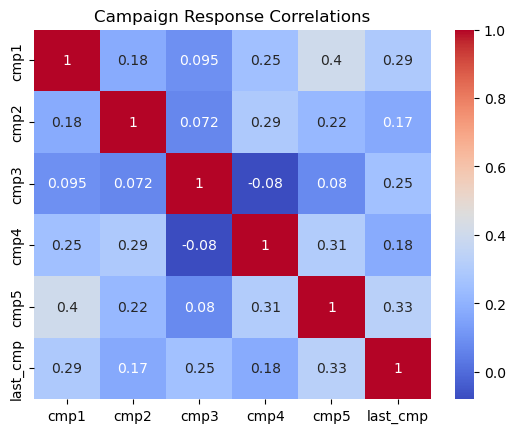

In [208]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Campaign Response Correlations')
plt.show()

In [209]:
'''  
1) last_cmp: Positively correlates with all campaigns, suggesting shared influencing factors.
2) cmp5: Strongly correlates with cmp1 and cmp4, indicating similar influences.
3) cmp2: Weak correlation with others, suggesting distinct characteristics.
4) cmp3: Very weak negative correlation with cmp4, indicating no strong relationship.

Optimizing: last_cmp has a positive correlation with all campaigns, so its successful elements can be applied to future campaigns.
Synergy of CMP5, CMP1, CMP4 : Similar strategies in these three campaigns can be combined for maximum results.
'''

'  \n1) last_cmp: Positively correlates with all campaigns, suggesting shared influencing factors.\n2) cmp5: Strongly correlates with cmp1 and cmp4, indicating similar influences.\n3) cmp2: Weak correlation with others, suggesting distinct characteristics.\n4) cmp3: Very weak negative correlation with cmp4, indicating no strong relationship.\n\nOptimizing: last_cmp has a positive correlation with all campaigns, so its successful elements can be applied to future campaigns.\nSynergy of CMP5, CMP1, CMP4 : Similar strategies in these three campaigns can be combined for maximum results.\n'

In [210]:
'''   
Compare Campaign Success Metrics to evaluate more than just acceptance rates
Demographics (Who Responded): Group responses by features like age, 
income, or education to understand customer profiles for each campaign
'''

segment_analysis = df.groupby(['gen'])[['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']].sum()
print(segment_analysis)


             cmp1  cmp2  cmp3  cmp4  cmp5  last_cmp
gen                                                
Boomers        60    13    41    71    53       107
Gen X          49    12    76    71    60       145
Millennials    33     5    43    23    46        76
Silent          2     0     3     2     4         6


In [211]:
'''
- Gen X and Boomers are most responsive, especially to Last_CMP.
- Millennials show lower engagement.
- Silent Generation has minimal engagement, suggesting a need for adjusted strategies.
'''

'\n- Gen X and Boomers are most responsive, especially to Last_CMP.\n- Millennials show lower engagement.\n- Silent Generation has minimal engagement, suggesting a need for adjusted strategies.\n'

In [212]:
# Group data by generation and sum campaign metrics
df_melted = segment_analysis.reset_index().melt(id_vars='gen', var_name='campaign', value_name='value')
fig = px.line_polar(df_melted, r='value', theta='campaign', color='gen', line_close=True,
                    title='Campaign Metrics by Generation')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 160] 
        )
    )
)
fig.show()


In [213]:
# Gen X customers show higher values in almost overall campaigns. Boomers remain moderate, 
# Silent stay low, and Millenials is moderate, especially on last_cmp.

In [214]:
segment_pct = df.groupby(['gen'])[['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']].mean() * 100
print(segment_pct)

                 cmp1      cmp2       cmp3      cmp4       cmp5   last_cmp
gen                                                                       
Boomers      7.905138  1.712780   5.401845  9.354414   6.982872  14.097497
Gen X        4.570896  1.119403   7.089552  6.623134   5.597015  13.526119
Millennials  8.571429  1.298701  11.168831  5.974026  11.948052  19.740260
Silent       8.333333  0.000000  12.500000  8.333333  16.666667  25.000000


In [216]:
# Individual Campaign Acceptance Percentages
campaigns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']

cmp_percentages = {}
for campaign in campaigns:
    total_given = df[campaign].value_counts().get(1, 0)
    total_not_given = df[campaign].value_counts().get(0, 0)
    total_participants = total_given + total_not_given
    given_pct = (total_given / total_participants) * 100
    not_given_pct = (total_not_given / total_participants) * 100
    cmp_percentages[campaign] = {
        'Accepted %': round(given_pct, 2),
        'Not Accepted %': round(not_given_pct, 2)
    }

cmp_percent_df = pd.DataFrame(cmp_percentages).T
cmp_percent_df.index.name = "Campaign"
cmp_percent_df


,Accepted %,Not Accepted %
Campaign,,
cmp1,6.43,93.57
cmp2,1.34,98.66
cmp3,7.28,92.72
cmp4,7.46,92.54
cmp5,7.28,92.72
last_cmp,14.91,85.09


In [217]:
# Overall Acceptance Percentages (At Least One Campaign Accepted)
df['any_accepted'] = df[campaigns].any(axis=1).astype(int)

total_accepted = df['any_accepted'].sum()
total_participants = len(df)

overall_acceptance = {
    'Accepted %': round((total_accepted / total_participants) * 100, 2),
    'Not Accepted %': round(((total_participants - total_accepted) / total_participants) * 100, 2)
}

overall_df = pd.DataFrame([overall_acceptance], index=['Overall'])
overall_df


,Accepted %,Not Accepted %
Overall,27.19,72.81


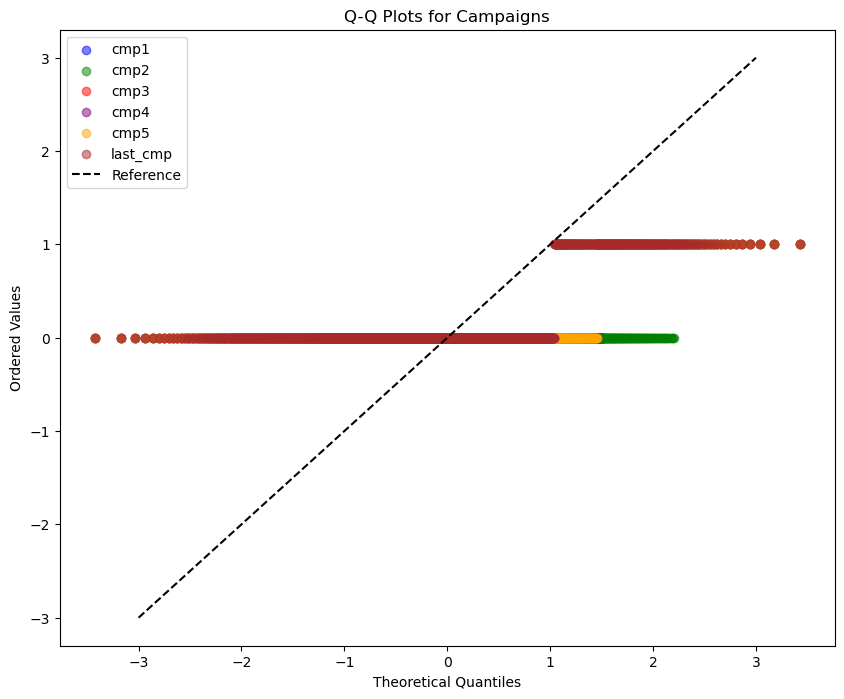

In [218]:

# Normality Test for Each Campaign
campaigns = ['cmp1', 'cmp2', 'cmp3', 'cmp4', 'cmp5', 'last_cmp']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

plt.figure(figsize=(10, 8))
for cmp, color in zip(campaigns, colors):
    osm, osr = stats.probplot(df[cmp], dist='norm')[0]
    plt.scatter(osm, osr, color=color, alpha=0.5, label=cmp)
plt.plot([-3, 3], [-3, 3], 'k--', label='Reference')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plots for Campaigns')
plt.legend()
plt.show()


In [219]:
# The Q-Q plot shows all cmp values clustering at 0 and 1, which deviates from the diagonal. This suggests the data is non-normal, likely binary.

In [220]:
'''  
Levene's Test (Non-Parametrik)
H₀: The variances among all campaigns (cmp1, cmp2, cmp3, cmp4, cmp5, last_cmp) are equal
Hₐ: At least one campaign has a different variance
'''
stat, p = stats.levene(df['cmp1'], df['cmp2'], df['cmp3'], df['cmp4'], df['cmp5'], df['last_cmp'])
print(f"Levene’s Test: p-value = {p:.4f}")

Levene’s Test: p-value = 0.0000


In [106]:
# Levene's Test p-value of 0.0000 means the group variances differ significantly, so equal variances cannot be assumed.

Discount

In [221]:
sales_per_campaign = {
    'cmp1': df[df['cmp1'] == 1]['total_spent'].sum(),
    'cmp2': df[df['cmp2'] == 1]['total_spent'].sum(),
    'cmp3': df[df['cmp3'] == 1]['total_spent'].sum(),
    'cmp4': df[df['cmp4'] == 1]['total_spent'].sum(),
    'cmp5': df[df['cmp5'] == 1]['total_spent'].sum(),
    'last_cmp': df[df['last_cmp'] == 1]['total_spent'].sum(),
    'deals_buy': df[df['deals_buy'] >= 1]['total_spent'].sum(),
}
for campaign, sales in sales_per_campaign.items():
    print(f"{campaign} Sales: {sales}")


cmp1 Sales: 213440
cmp2 Sales: 39230
cmp3 Sales: 117448
cmp4 Sales: 190902
cmp5 Sales: 263426
last_cmp Sales: 329789
deals_buy Sales: 1300189


In [222]:
disc = ['deals_buy']
acceptance_rates = {
    d: (df[d] > 0).mean() * 100 for d in disc
}
acceptance_df = pd.DataFrame(list(acceptance_rates.items()), columns=['Discount', 'Acceptance Rate (%)'])
print(acceptance_df)

    Discount  Acceptance Rate (%)
0  deals_buy            97.946429


In [223]:
from scipy.stats import ttest_ind
# Calculate total spending
df['total_spending'] = (
    df['spent_wine'] + df['spent_fruit'] + df['spent_meat'] +
    df['spent_fish'] + df['spent_sweet'] + df['spent_gold']
)
discount_users = df[df['deals_buy'] > 0]['total_spending']
non_discount_users = df[df['deals_buy'] == 0]['total_spending']

# Perform Independent T-test (Welch’s t-test)
t_stat, p_value = ttest_ind(discount_users, non_discount_users, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: There is a significant difference in total spending between customers who used discounts and those who didn’t.")
else:
    print("Conclusion: There is no significant difference in total spending between customers who used discounts and those who didn’t.")

T-statistic: -5.5012
P-value: 0.0000
Conclusion: There is a significant difference in total spending between customers who used discounts and those who didn’t.


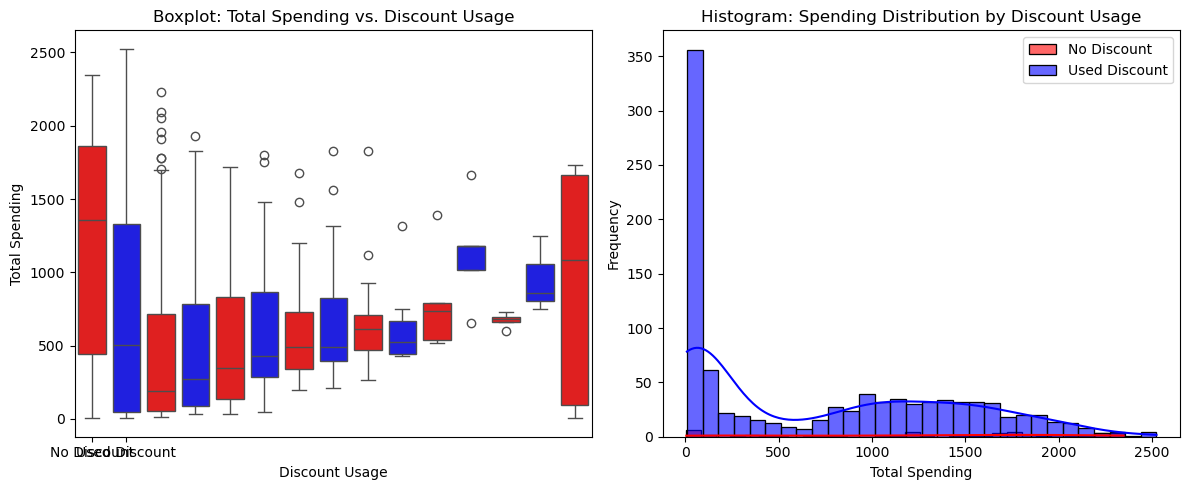

In [224]:
plt.figure(figsize=(12, 5))

# Boxplot: Total spending vs. Discount usage
plt.subplot(1, 2, 1)
sns.boxplot(x=df["deals_buy"], y=df["total_spent"], palette=["red", "blue"])
plt.xticks([0, 1], ["No Discount", "Used Discount"])
plt.xlabel("Discount Usage")
plt.ylabel("Total Spending")
plt.title("Boxplot: Total Spending vs. Discount Usage")

# Histogram: Spending distribution comparison
plt.subplot(1, 2, 2)
sns.histplot(df[df["deals_buy"] == 0]["total_spent"], bins=30, kde=True, color="red", label="No Discount", alpha=0.6)
sns.histplot(df[df["deals_buy"] == 1]["total_spent"], bins=30, kde=True, color="blue", label="Used Discount", alpha=0.6)
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.title("Histogram: Spending Distribution by Discount Usage")
plt.legend()

plt.tight_layout()
plt.show()


In [225]:
# Spending variance has been larger for customers using discounts (blue).
# Customers who have used discounts have been more evenly distributed; 
# however, their spending has remained in a lower range, meaning they have tended to spend less than customers who haven’t used discounts.

#### 2.b) Product Performance Analysis

In [228]:
# Association Rule Analysis for Spending Data
selected_columns = [
    'spent_wine', 'spent_fruit', 'spent_meat',
    'spent_fish', 'spent_sweet', 'spent_gold'
]
df_copy = df[selected_columns].copy()
# Convert numeric values to boolean (spent > 0 → True, spent == 0 → False)
df_copy = df_copy.applymap(lambda x: x > 0)
def calculate_support(df, items):
    """
    Calculate support for a given itemset.
    Support measures how frequently the itemset 
    (a combination of products) appears in the dataset.
    """
    if not all(item in df.columns for item in items):
        return 0  # Prevent errors if columns are missing
    count = df[list(items)].all(axis=1).sum()
    total = len(df)
    return count / total if total > 0 else 0

def calculate_confidence(df, antecedent, consequent):
    """
    Calculate confidence for a given rule.
    Confidence measures the likelihood that if a customer buys the antecedent (one item),
    they will also buy the consequent (another item).
    Ratio of the support of both items (support_ab) 
    to the support of just the antecedent (support_a)
    """
    support_ab = calculate_support(df, antecedent + consequent)
    support_a = calculate_support(df, antecedent)
    return support_ab / support_a if support_a > 0 else 0

def calculate_lift(df, antecedent, consequent):
    """
    Calculate lift for a given rule.
    Lift measures how much more likely the consequent is to be bought when the antecedent is bought,
    compared to if the two items were independent of each other
    """
    confidence = calculate_confidence(df, antecedent, consequent)
    support_b = calculate_support(df, consequent)
    return confidence / support_b if support_b > 0 else 0
results = []
for antecedent, consequent in combinations(selected_columns, 2):
    support = calculate_support(df_copy, [antecedent, consequent])
    confidence = calculate_confidence(df_copy, [antecedent], [consequent])
    lift = calculate_lift(df_copy, [antecedent], [consequent])
    results.append({
        'Antecedent': antecedent,
        'Consequent': consequent,
        'Support': round(support, 4),
        'Confidence': round(confidence, 4),
        'Lift': round(lift, 4)
    })
rules_df = pd.DataFrame(results)
rules_df

,Antecedent,Consequent,Support,Confidence,Lift
0,spent_wine,spent_fruit,0.8179,0.8226,1.0015
1,spent_wine,spent_meat,0.9942,1.0000,1.0004
2,spent_wine,spent_fish,0.8228,0.8276,0.9988
3,spent_wine,spent_sweet,0.8076,0.8123,0.9992
4,spent_wine,spent_gold,0.9670,0.9726,0.9998
5,spent_fruit,spent_meat,0.8214,1.0000,1.0004
6,spent_fruit,spent_fish,0.7357,0.8957,1.0810
7,spent_fruit,spent_sweet,0.7241,0.8815,1.0844
8,spent_fruit,spent_gold,0.8054,0.9804,1.0079
9,spent_meat,spent_fish,0.8281,0.8285,0.9999


In [229]:
'''   
Champions and Loyal Customers make the best VIP bundling targets due to higher spending and stronger engagement.
Combined VIP Bundling: Sort rules by prioritize high lift and high support for VIP bundling. (high lift indicates strong association)
'''
support_threshold = 0.80
vip_cand = rules_df[rules_df['Support'] >= support_threshold].copy()
vip_cand['score'] = (vip_cand['Lift']) + vip_cand['Support']
vip_bdl = vip_cand.sort_values(by='score', ascending=False)
vip_bdl.head(5)


,Antecedent,Consequent,Support,Confidence,Lift,score
1,spent_wine,spent_meat,0.9942,1.0000,1.0004,1.9946
11,spent_meat,spent_gold,0.9723,0.9728,1.0000,1.9723
4,spent_wine,spent_gold,0.9670,0.9726,0.9998,1.9668
9,spent_meat,spent_fish,0.8281,0.8285,0.9999,1.8280
5,spent_fruit,spent_meat,0.8214,1.0000,1.0004,1.8218


In [230]:
''' 
- Wine and meat have a strong association, making them ideal for bundling or promotional offers.
- Meat and gold, as well as wine and gold, show strong connections, suggesting effective targeted promotions.
'''

' \n- Wine and meat have a strong association, making them ideal for bundling or promotional offers.\n- Meat and gold, as well as wine and gold, show strong connections, suggesting effective targeted promotions.\n'

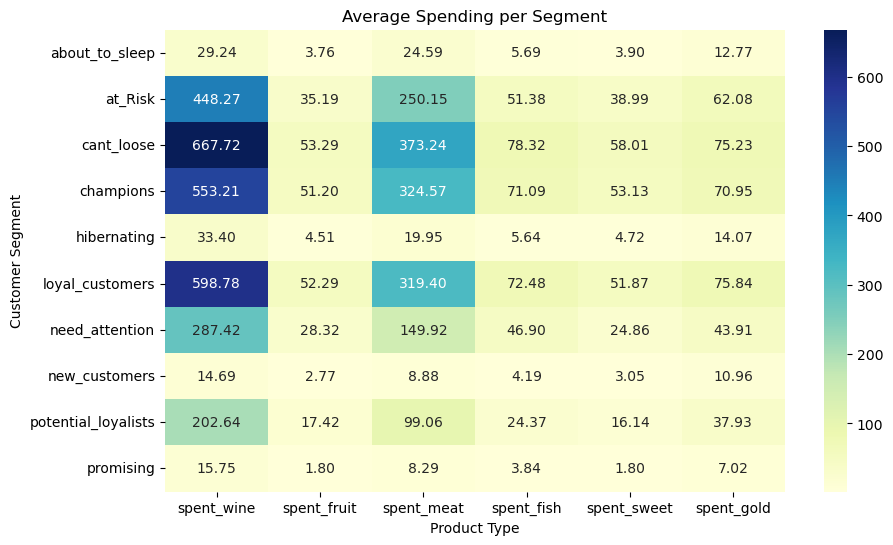

In [231]:
# Group by 'Segment' and display the average spending per person and visualizing using heatmap
cust_avg = df.groupby('Segment')[['spent_wine', 'spent_fruit', 'spent_meat', 
                                    'spent_fish', 'spent_sweet', 'spent_gold']].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cust_avg, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Spending per Segment")
plt.xlabel("Product Type")
plt.ylabel("Customer Segment")
plt.show()


In [232]:
# Average Bundling: Sort by highest support, as it indicates the most common associations among customers.
avg_bundling = rules_df.sort_values(by='Support', ascending=False)
avg_bundling.head(5)

,Antecedent,Consequent,Support,Confidence,Lift
1,spent_wine,spent_meat,0.9942,1.0000,1.0004
11,spent_meat,spent_gold,0.9723,0.9728,1.0000
4,spent_wine,spent_gold,0.9670,0.9726,0.9998
9,spent_meat,spent_fish,0.8281,0.8285,0.9999
2,spent_wine,spent_fish,0.8228,0.8276,0.9988


In [233]:
''' 
- Wine and meat have a strong association, making them ideal for bundling or promotional offers.
- Meat and gold, as well as wine and gold, show strong connections, suggesting effective targeted promotions.
- Combo Deals:
    1) Bundle wine and meat together (packages) for promotions or discounts.
       Insight: Customers who buy wine almost always buy meat.
       Action: Offer a discount on meat when purchasing wine.
       Example Promo: “Buy Wine, Get 10% Off on Meat!”
    2) Bundle Wine & Gold
       Insight: Wine and gold are often bought together.
       Action: Create premium package deals for both items.
       Example Promo: “Luxury Bundle: Wine & Gold at a Special Price!”
- Encourage cross-selling:
    Ex: Customers buying meat are likely to buy gold or fish.
        🥩💰 Buy Meat & Get a Special Discount on Gold!
        Flow:
        Customer buys meat → At checkout, offer gold at a special price.
        💬 "Would you like to add gold at a special price?"
        🔥 Exclusive Deal: Get Gold at a Discount When You Buy Meat!
'''

' \n- Wine and meat have a strong association, making them ideal for bundling or promotional offers.\n- Meat and gold, as well as wine and gold, show strong connections, suggesting effective targeted promotions.\n- Combo Deals:\n    1) Bundle wine and meat together (packages) for promotions or discounts.\n       Insight: Customers who buy wine almost always buy meat.\n       Action: Offer a discount on meat when purchasing wine.\n       Example Promo: “Buy Wine, Get 10% Off on Meat!”\n    2) Bundle Wine & Gold\n       Insight: Wine and gold are often bought together.\n       Action: Create premium package deals for both items.\n       Example Promo: “Luxury Bundle: Wine & Gold at a Special Price!”\n- Encourage cross-selling:\n    Ex: Customers buying meat are likely to buy gold or fish.\n        🥩💰 Buy Meat & Get a Special Discount on Gold!\n        Flow:\n        Customer buys meat → At checkout, offer gold at a special price.\n        💬 "Would you like to add gold at a special price?

PARETO

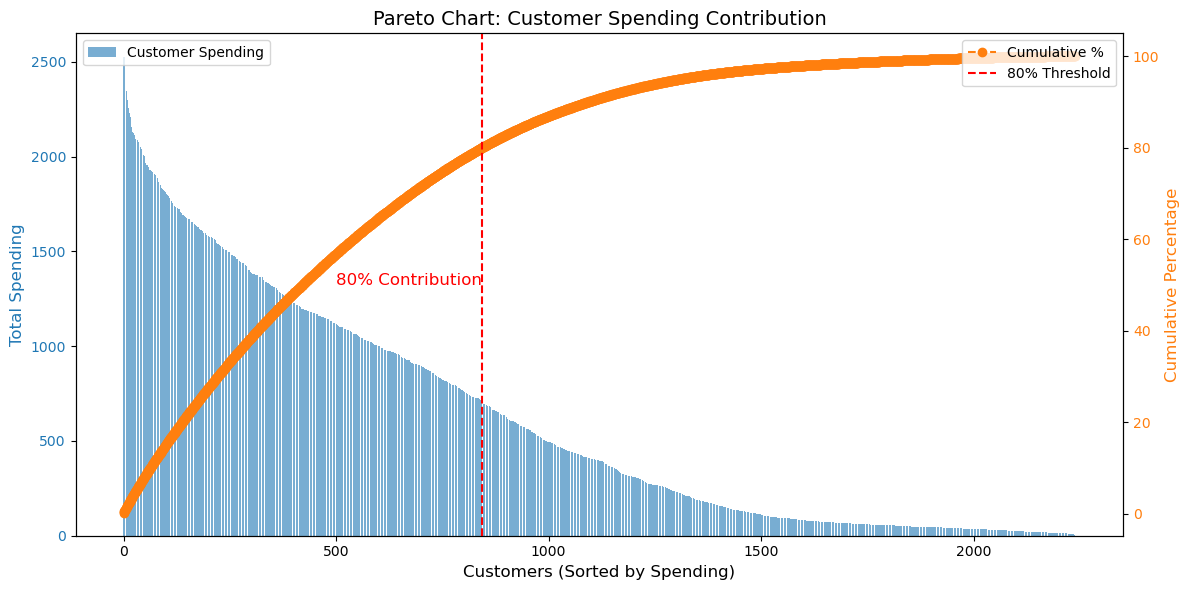

843

In [234]:
# 1. Customer Revenue Contribution (Top Spending Customers)
# Metric: Total Spending per customer
# Identify the top 20% of customers contributing to 80% of revenue.
df_sorted = df.sort_values(by="total_spent", ascending=False).reset_index()
df_sorted["Cumulative_Spending"] = df_sorted["total_spent"].cumsum()
df_sorted["Cumulative_Percentage"] = df_sorted["Cumulative_Spending"] / df_sorted["total_spent"].sum() * 100
pareto_threshold = np.argmax(df_sorted["Cumulative_Percentage"] >= 80)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(df_sorted.index, df_sorted["total_spent"], color='C0', alpha=0.6, label="Customer Spending")
ax1.set_xlabel("Customers (Sorted by Spending)", fontsize=12)
ax1.set_ylabel("Total Spending", color='C0', fontsize=12)
ax1.tick_params(axis='y', labelcolor='C0', labelsize=10)
ax2 = ax1.twinx()
ax2.plot(df_sorted.index, df_sorted["Cumulative_Percentage"], color='C1', marker='o', linestyle='dashed', label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage", color='C1', fontsize=12)
ax2.tick_params(axis='y', labelcolor='C1', labelsize=10)
ax2.axvline(x=pareto_threshold, color='r', linestyle='dashed', label="80% Threshold")
ax2.text(pareto_threshold, 50, "80% Contribution", color="red", fontsize=12, ha="right")
plt.title("Pareto Chart: Customer Spending Contribution", fontsize=14)
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()
pareto_threshold

In [235]:
''' 
Out of 2,240 customers, 843 contribute to approximately 80% of total spending, demonstrating the Pareto principle.
Prioritizing these key customers can significantly enhance efficiency and revenue.
'''

' \nOut of 2,240 customers, 843 contribute to approximately 80% of total spending, demonstrating the Pareto principle.\nPrioritizing these key customers can significantly enhance efficiency and revenue.\n'

In [237]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Group by Segment
# grouped = df.groupby('segment')
# # Total spent per segment (for bars and cumulative)
# spent_by_segment = grouped['total_spent'].sum().sort_values(ascending=False)
# # Bar: Relative to the top spender
# relative_percentage = spent_by_segment / spent_by_segment.max() * 100
# # Line: Cumulative percentage of total spent
# cumulative_percentage = spent_by_segment.cumsum() / spent_by_segment.sum() * 100
# # CLV
# clv_per_segment = grouped['CLV'].mean()[spent_by_segment.index]  # match order with bars

# # Plotting
# fig, ax1 = plt.subplots(figsize=(12, 6))
# # Bar chart
# bars = ax1.bar(relative_percentage.index, relative_percentage, color='C0', alpha=0.7, label="Relative % to Top Segment")
# for i, bar in enumerate(bars):
#     yval = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width()/2, yval + 1,
#              f"{yval:.1f}%\nCLV: {clv_per_segment.iloc[i]:.0f}",  # Display CLV below %
#              ha='center', fontsize=9)

# ax1.set_xlabel("Customer Segments", fontsize=12)
# ax1.set_ylabel("Relative % to Top Segment", color='C0', fontsize=12)
# ax1.tick_params(axis='y', labelcolor='C0')
# ax1.set_xticks(range(len(relative_percentage.index)))
# ax1.set_xticklabels(relative_percentage.index, rotation=45)
# ax1.set_ylim(0, 120)

# # Line chart for cumulative percentage
# ax2 = ax1.twinx()
# ax2.plot(relative_percentage.index, cumulative_percentage, color='C1', marker='o', linestyle='--', label="Cumulative % of Total Spent")
# for i, val in enumerate(cumulative_percentage):
#     ax2.text(i, val, f"{val:.1f}%", color='C1', fontsize=9, ha='left')

# ax2.set_ylabel("Cumulative % of Total Spent", color='C1', fontsize=12)
# ax2.tick_params(axis='y', labelcolor='C1')
# ax2.set_ylim(0, 110)

# # Vertical line at 80%
# pareto_threshold = np.argmax(cumulative_percentage >= 80)
# ax2.axvline(pareto_threshold, color='r', linestyle='dashed', label="80% Threshold")
# ax2.text(pareto_threshold, 50, "80% Contribution", color="red", fontsize=11, ha="right")

# # Legends and title
# fig.suptitle("Customer Segment Analysis: Relative vs. Cumulative Spent", fontsize=14)
# fig.tight_layout()
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# plt.show()


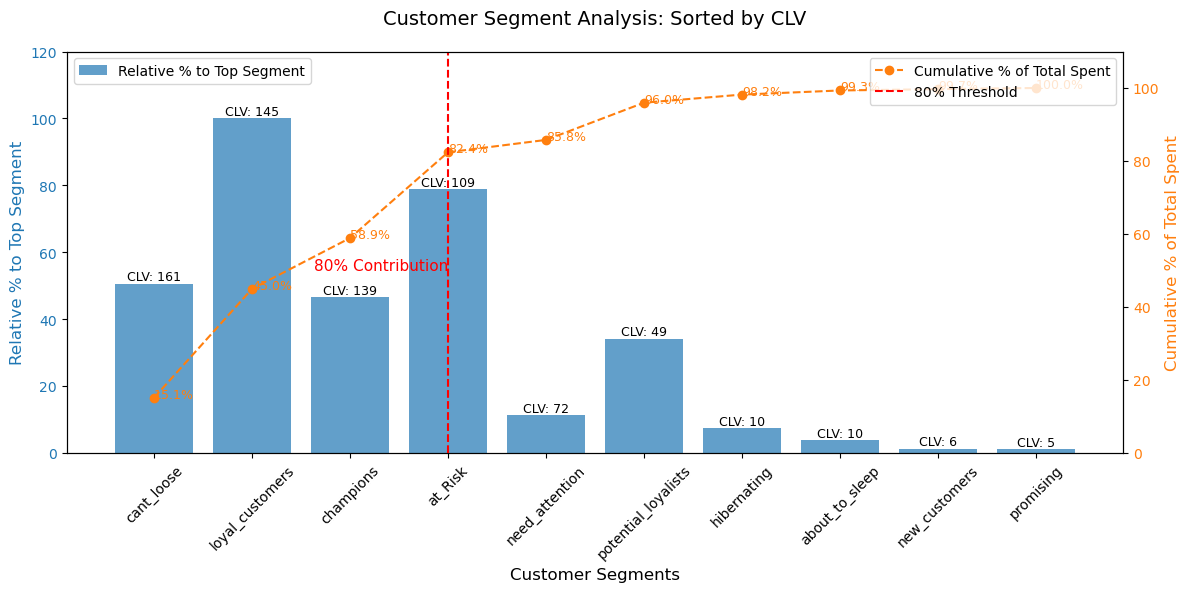

In [315]:
# 1. Segments to Promotions
# Group by segment
grouped = df.groupby('segment')
# Get average CLV per segment (this becomes our sort key)
clv_per_segment = grouped['CLV'].mean().sort_values(ascending=False)
# Reorder everything based on CLV
segments_ordered = clv_per_segment.index
spent_by_segment = grouped['total_spent'].sum()[segments_ordered]
# Bar: Relative to the top spender
relative_percentage = spent_by_segment / spent_by_segment.max() * 100
# Line: Cumulative percentage of total spent
cumulative_percentage = spent_by_segment.cumsum() / spent_by_segment.sum() * 100
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart
bars = ax1.bar(segments_ordered, relative_percentage, color='C0', alpha=0.7, label="Relative % to Top Segment")
for i, bar in enumerate(bars):
    yval = bar.get_height()
    clv_val = clv_per_segment.iloc[i]
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f"CLV: {clv_val:.0f}",
             ha='center', fontsize=9)

ax1.set_xlabel("Customer Segments", fontsize=12)
ax1.set_ylabel("Relative % to Top Segment", color='C0', fontsize=12)
ax1.tick_params(axis='y', labelcolor='C0')
ax1.set_xticks(range(len(segments_ordered)))
ax1.set_xticklabels(segments_ordered, rotation=45)
ax1.set_ylim(0, 120)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(segments_ordered, cumulative_percentage, color='C1', marker='o', linestyle='--', label="Cumulative % of Total Spent")
for i, val in enumerate(cumulative_percentage):
    ax2.text(i, val, f"{val:.1f}%", color='C1', fontsize=9, ha='left')

ax2.set_ylabel("Cumulative % of Total Spent", color='C1', fontsize=12)
ax2.tick_params(axis='y', labelcolor='C1')
ax2.set_ylim(0, 110)

# Vertical line at 80%
pareto_threshold = np.argmax(cumulative_percentage >= 80)
ax2.axvline(pareto_threshold, color='r', linestyle='dashed', label="80% Threshold")
ax2.text(pareto_threshold, 50, "80% Contribution", color="red", fontsize=11, ha="right")

# Legends and title
fig.suptitle("Customer Segment Analysis: Sorted by CLV", fontsize=14)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [239]:
# Loyal Customers, At-Risk, and Can’t Lose account for over 80% of total CLV.
# This aligns with the 80/20 rule
# Loyal Customers should be nurtured through loyalty programs to maintain engagement.
# At-Risk customers need retention strategies like exclusive offers or discounts.
# Can’t Lose customers require personalized attention to prevent churn.
'''  
To maximize Customer Lifetime Value (CLV) and reinforce the 80/20 rule, promotions should focus on high-value segments:
- Loyal Customers: Offer personalized rewards, VIP programs, and exclusive discounts to strengthen loyalty.
- At-Risk Customers: Use win-back promotions (e.g., time-sensitive discounts) to prevent churn.
- Can't Lose Customers: Provide tailored offers or premium services to retain them.
- Champions: Reward with referral bonuses and exclusive access to encourage advocacy and referrals.

✅ Loyal Customers, Champions Can't Loose Customers: Premium bundles with exclusive value. -> new premium product
✅ At-Risk & Can’t Lose Customers: High-incentive bundles to regain engagement. -> new product
'''

"  \nTo maximize Customer Lifetime Value (CLV) and reinforce the 80/20 rule, promotions should focus on high-value segments:\n- Loyal Customers: Offer personalized rewards, VIP programs, and exclusive discounts to strengthen loyalty.\n- At-Risk Customers: Use win-back promotions (e.g., time-sensitive discounts) to prevent churn.\n- Can't Lose Customers: Provide tailored offers or premium services to retain them.\n- Champions: Reward with referral bonuses and exclusive access to encourage advocacy and referrals.\n\n✅ Loyal Customers, Champions Can't Loose Customers: Premium bundles with exclusive value. -> new premium product\n✅ At-Risk & Can’t Lose Customers: High-incentive bundles to regain engagement. -> new product\n"

In [241]:
df_deals = df[df['deals_buy'] == 1]
print(df_deals['segment'].value_counts()) 


segment
hibernating            167
loyal_customers        154
at_Risk                146
about_to_sleep          96
champions               84
potential_loyalists     82
new_customers           79
cant_loose              77
promising               64
need_attention          21
Name: count, dtype: int64


In [242]:
# The "Hibernating" segment responds the most to discounts, followed by "Loyal Customers" and "At Risk" groups.

In [247]:
segments_of_interest = ["loyal_customers", "at_Risk", "cant_loose", "champions"]
df_filtered = df[df["segment"].isin(segments_of_interest)]
columns_of_interest = ["segment", "spent_wine", "spent_fruit", "spent_meat", "spent_fish", "spent_sweet", "spent_gold"]
df_summary = df_filtered[columns_of_interest].groupby("segment").sum()
df_summary

,spent_wine,spent_fruit,spent_meat,spent_fish,spent_sweet,spent_gold
segment,,,,,,
at_Risk,161376,12670,90055,18496,14036,22350
cant_loose,104832,8367,58599,12296,9107,11811
champions,92940,8602,54528,11943,8926,11919
loyal_customers,207177,18093,110513,25078,17947,26241


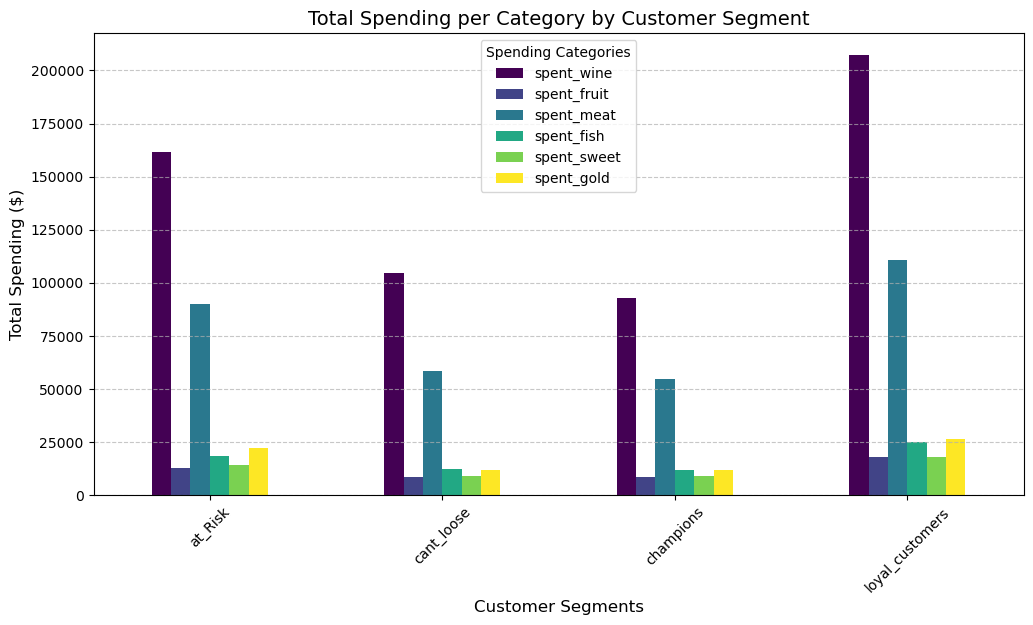

In [252]:
# Calculating Total Spending per Category by Customer Segment
df_summary.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Total Spending per Category by Customer Segment", fontsize=14)
plt.xlabel("Customer Segments", fontsize=12)
plt.ylabel("Total Spending ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Spending Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [248]:
'''
- Loyal Customers: Highest spenders across all categories, especially in wine and meat.
- At Risk: High spending on wine and meat, but lower in other categories.
- Champions and Can't Lose: Moderate spending across categories, valuable for targeted promotions.
'''

"\n- Loyal Customers: Highest spenders across all categories, especially in wine and meat.\n- At Risk: High spending on wine and meat, but lower in other categories.\n- Champions and Can't Lose: Moderate spending across categories, valuable for targeted promotions.\n"

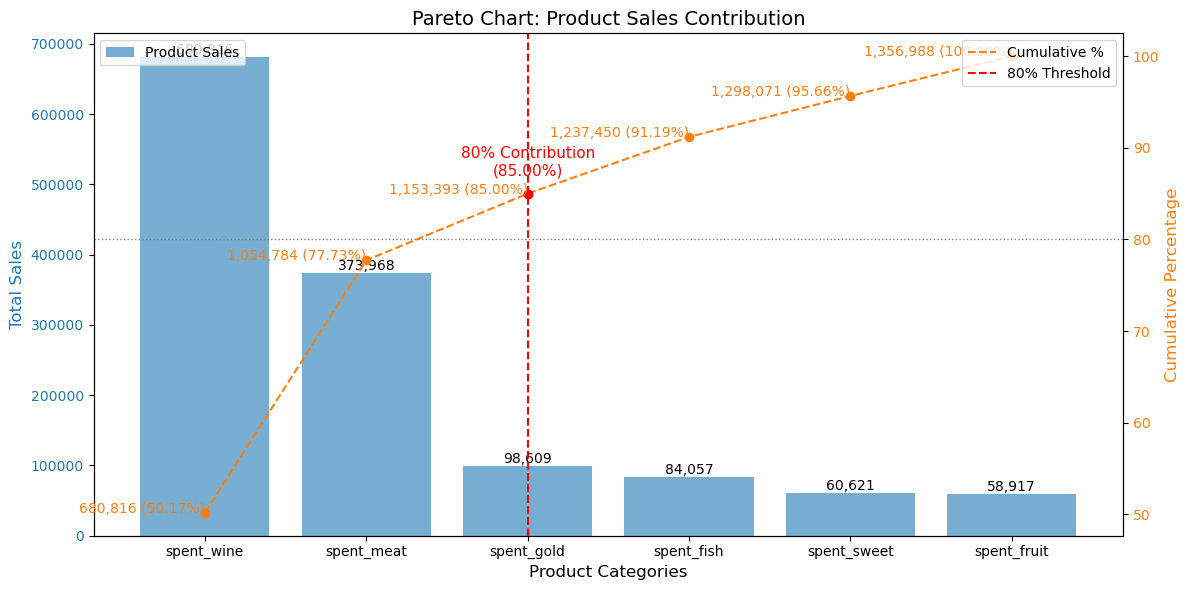

In [317]:
# 2. Products Sales to Promotions (Best Channel)
# Summing product sales
product_sales = df[["spent_wine", "spent_fruit", "spent_meat", "spent_fish", "spent_sweet", "spent_gold"]].sum()
product_sales_sorted = product_sales.sort_values(ascending=False)

# Calculate cumulative sales and percentage
cumulative_sales = product_sales_sorted.cumsum()
total_sales = cumulative_sales.iloc[-1]
cumulative_percentage = cumulative_sales / total_sales * 100

# Find Pareto 80% threshold index
pareto_threshold_index = np.argmax(cumulative_percentage >= 80)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
bars = ax1.bar(product_sales_sorted.index, product_sales_sorted, color='C0', alpha=0.6, label="Product Sales")
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

ax1.set_xlabel("Product Categories", fontsize=12)
ax1.set_ylabel("Total Sales", color='C0', fontsize=12)
ax1.tick_params(axis='y', labelcolor='C0', labelsize=10)

# Line chart
ax2 = ax1.twinx()
ax2.plot(product_sales_sorted.index, cumulative_percentage, color='C1', linestyle='dashed', label="Cumulative %")

# All cumulative points
for i in range(len(cumulative_percentage)):
    ax2.plot(i, cumulative_percentage.iloc[i], 'o', color='C1')
    ax2.text(i, cumulative_percentage.iloc[i], 
             f"{cumulative_sales.iloc[i]:,.0f} ({cumulative_percentage.iloc[i]:.2f}%)", 
             ha='right', fontsize=10, color='C1')

# Highlight 80% threshold
ax2.axvline(x=pareto_threshold_index, color='r', linestyle='dashed', label="80% Threshold")
ax2.axhline(y=80, color='gray', linestyle='dotted', linewidth=1)
ax2.plot(pareto_threshold_index, cumulative_percentage.iloc[pareto_threshold_index], 'ro')  # red dot
ax2.text(pareto_threshold_index, cumulative_percentage.iloc[pareto_threshold_index] + 2,
         f"80% Contribution\n({cumulative_percentage.iloc[pareto_threshold_index]:.2f}%)",
         color="red", fontsize=11, ha="center")

ax2.set_ylabel("Cumulative Percentage", color='C1', fontsize=12)
ax2.tick_params(axis='y', labelcolor='C1', labelsize=10)

plt.title("Pareto Chart: Product Sales Contribution", fontsize=14)
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


In [314]:
# # As per the Pareto principle, approximately 20% of the products (Wine, Meat, and Gold) account for over 80% of total product revenue

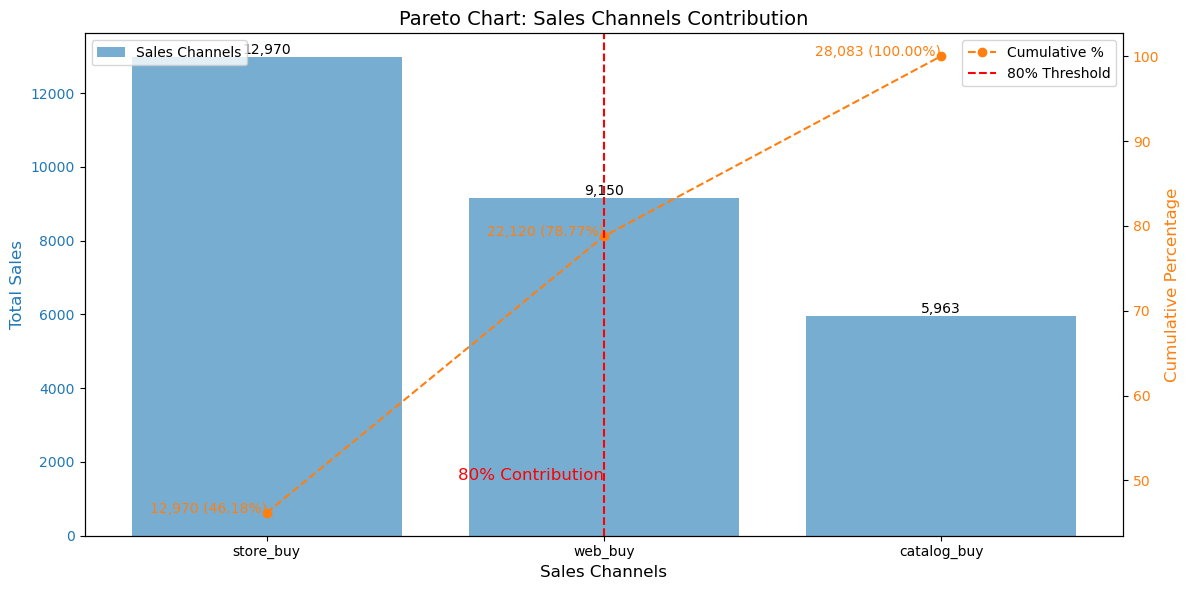

In [313]:
# 3. Sales Channel to Promotions (Best Channel)
sales_channels = df[["web_buy", "catalog_buy", "store_buy"]].sum()
sales_channels_sorted = sales_channels.sort_values(ascending=False)

# Calculate cumulative sales and percentage based on total sales
total_sales = sales_channels_sorted.sum()
cumulative_sales = sales_channels_sorted.cumsum()
cumulative_percentage = cumulative_sales / total_sales * 100

# Find the index where the cumulative percentage first exceeds 80%
pareto_threshold = np.argmax(cumulative_percentage >= 80)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for sales channels
bars = ax1.bar(sales_channels_sorted.index, sales_channels_sorted, color='C0', alpha=0.6, label="Sales Channels")
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}", ha='center', va='bottom', fontsize=10, color='black')

ax1.set_xlabel("Sales Channels", fontsize=12)
ax1.set_ylabel("Total Sales", color='C0', fontsize=12)
ax1.tick_params(axis='y', labelcolor='C0', labelsize=10)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
line, = ax2.plot(sales_channels_sorted.index, cumulative_percentage, color='C1', marker='o', linestyle='dashed', label="Cumulative %")
for i, txt in enumerate(cumulative_sales):
    ax2.text(i, cumulative_percentage[i], f"{cumulative_sales[i]:,} ({cumulative_percentage[i]:.2f}%)", ha='right', fontsize=10, color='C1')

ax2.set_ylabel("Cumulative Percentage", color='C1', fontsize=12)
ax2.tick_params(axis='y', labelcolor='C1', labelsize=10)

# Add a vertical line at the 80% threshold
ax2.axvline(x=pareto_threshold-1, color='r', linestyle='dashed', label="80% Threshold")
ax2.text(pareto_threshold-1, 50, "80% Contribution", color="red", fontsize=12, ha="right")

# Title and labels
plt.title("Pareto Chart: Sales Channels Contribution", fontsize=14)
fig.tight_layout()

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [294]:
# In-store purchases are the most dominant sales channel, accounting for over half of total transactions, followed by online website purchases
# Optimize in-store experience & boost online sales for existing shoppers

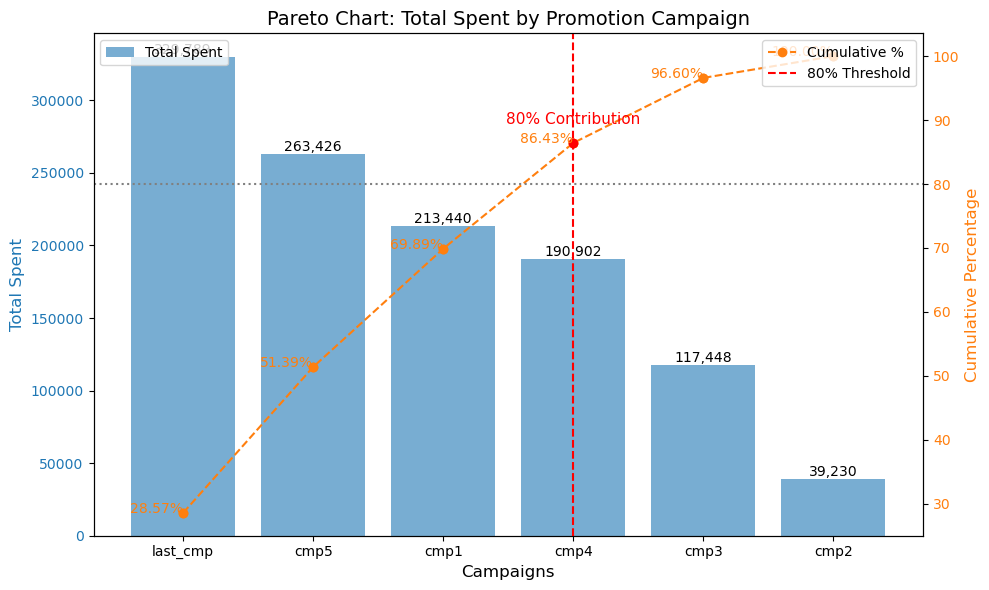

In [318]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Total spent per campaign
df["total_spent"] = df[["spent_wine", "spent_fruit", "spent_meat", "spent_fish", "spent_sweet", "spent_gold"]].sum(axis=1)
promotions = ["cmp1", "cmp2", "cmp3", "cmp4", "cmp5", "last_cmp"]
total_spent_per_promotion = {promo: df.loc[df[promo] == 1, "total_spent"].sum() for promo in promotions}

# 2. Prepare DataFrame
df_promo_spent = pd.DataFrame(list(total_spent_per_promotion.items()), columns=["Campaign", "Total_Spent"])
df_promo_spent = df_promo_spent.sort_values(by="Total_Spent", ascending=False).reset_index(drop=True)
df_promo_spent["Cumulative_Spent"] = df_promo_spent["Total_Spent"].cumsum()
df_promo_spent["Cumulative_Percentage"] = df_promo_spent["Cumulative_Spent"] / df_promo_spent["Total_Spent"].sum() * 100

# 3. Find 80% threshold
pareto_threshold = np.argmax(df_promo_spent["Cumulative_Percentage"] >= 80)

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
bars = ax1.bar(df_promo_spent["Campaign"], df_promo_spent["Total_Spent"], color='C0', alpha=0.6, label="Total Spent")
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

ax1.set_xlabel("Campaigns", fontsize=12)
ax1.set_ylabel("Total Spent", color='C0', fontsize=12)
ax1.tick_params(axis='y', labelcolor='C0', labelsize=10)

# Line plot for cumulative %
ax2 = ax1.twinx()
ax2.plot(df_promo_spent["Campaign"], df_promo_spent["Cumulative_Percentage"], color='C1', marker='o', linestyle='dashed', label="Cumulative %")

# Add all data point dots & text
for i in range(len(df_promo_spent)):
    ax2.plot(i, df_promo_spent["Cumulative_Percentage"].iloc[i], 'o', color='C1')
    ax2.text(i, df_promo_spent["Cumulative_Percentage"].iloc[i], 
             f"{df_promo_spent['Cumulative_Percentage'].iloc[i]:.2f}%", 
             ha='right', fontsize=10, color='C1')

# Highlight 80% threshold
ax2.axvline(x=pareto_threshold, color='r', linestyle='dashed', label="80% Threshold")
ax2.axhline(y=80, color='gray', linestyle='dotted')
ax2.plot(pareto_threshold, df_promo_spent["Cumulative_Percentage"].iloc[pareto_threshold], 'ro')
ax2.text(pareto_threshold, df_promo_spent["Cumulative_Percentage"].iloc[pareto_threshold] + 3, 
         "80% Contribution", color="red", fontsize=11, ha="center")

ax2.set_ylabel("Cumulative Percentage", color='C1', fontsize=12)
ax2.tick_params(axis='y', labelcolor='C1', labelsize=10)

plt.title("Pareto Chart: Total Spent by Promotion Campaign", fontsize=14)
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


In [ ]:
# The top four campaigns (last_cmp, cmp5, cmp1, and cmp4) account for 86.40% of total spending
# This aligns with the 80/20 principle, future promotional efforts should focus on optimizing the budget for high-performing campaigns

**WINE ANALYSIS**

Wine Classification by Carbonation Level (Primary Category) and Color (Subcategory of Still Wine)
-   🥂 Sparkling Wine – Contains natural or artificial carbonation (bubbly).
    Examples: Champagne (France), Prosecco (Italy), Cava (Spain).
-   🍷 Still Wine – No carbonation (includes most red, white, and rosé wines).
    -   🍷 Red Wine – Made from red grapes, fermented with skins.
        Examples: Cabernet Sauvignon, Merlot, Pinot Noir.
    -   🍾 White Wine – Made from green or red grapes without skin fermentation.
        Examples: Chardonnay, Sauvignon Blanc, Riesling.
    -   🍷 Rosé Wine – Short skin fermentation or blending red and white wine.
        Examples: Provence Rosé, White Zinfandel.

WINE MARKET:

The US market continues to be dominated by inexpensive wines (California, Oregon, Washington State-diverse and new taste)
E & J. Gallo Winery (California)
Constellation Brands, Inc. (NY)
The Wine Group, Inc (California)

Sales of red wine are up significantly more than those of white wine.
Red wine blends are up significantly (+10.4%) compared to 2013, considerably higher than the rise in single varietals (+2.9%).
Among the single varietals, the winners are Sauvignon Blanc (+8.5%), Cabernet Sauvignon (+7.6%), and Pinot Noir (+7%).  The losers are Syrah (-13.6%), White Zinfandel (-7.9%), and Merlot (-3.8%).Sparkling wine sales continuing to rise (+5.5%), driven by the incredible success of Prosecco.

https://i-winereview.com/blog/index.php/2015/04/27/the-us-wine-market-in-a-nutshell-2014-winners-losers/

PREMIUM WINE:

Josh Cellars
Founded by Joseph Carr, Josh Cellars quickly gained popularity thanks to its premium quality and accessible price point. The brand offers a range of varietals such as Cabernet Sauvignon, Chardonnay, and Pinot Noir.

WINE TREND:

Black Mesa Winery
Hailing from Velarde, New Mexico, Black Mesa Winery is known for its innovation, including a chocolate-infused red wine called 'Black Beauty'. In 2014, three of their vintages earned high accolades at the Jefferson Cup Invitational Wine Competition.

MYX Fusions
Launched in 2013 with Nicki Minaj as part of the brand, MYX Fusions offers a Moscato wine that appeals to younger consumers.

Known for its production of quality wine, Bear River Winery has won several medals at wine competitions, including for its 2014 Primitivo and 2014 Beardeaux 'Right Paw'.

**MEAT ANALYSIS**

MEAT MARKET:

In 2014, beef and pork dominated U.S. commercial red-meat production, with 51.2% and 48.3% respectively
The majority of meat consumption in the US consists of beef and poultry, which are a major part of the American diet.
In 2014, most meat consumed in the U.S., including red meat, was locally produced most in Texas, with imports filling specific demands.

MEAT PREMIUM:
Premium Meat refers to high-quality cuts of meat that are valued for their tenderness, marbling, and flavor. In the U.S., premium meat typically includes:

1. Premium Beef (Red Meat)
Wagyu Beef – Highly marbled, known for its buttery texture (e.g., Japanese Wagyu, American Wagyu).
USDA Prime Beef – The highest grade of beef in the U.S., with superior marbling (e.g., Ribeye, Filet Mignon).
Dry-Aged Beef – Aged for enhanced flavor and tenderness (e.g., Tomahawk Steak, Porterhouse).
2. Premium Pork
Iberico Pork – Rich, nutty flavor, from Spain but also available in the U.S.
Berkshire Pork (Kurobuta) – Highly marbled, juicy, and flavorful.
3. Premium Lamb
American Lamb – Larger and milder in taste compared to other lamb.

NEW TREND (MEAT):

Sustainable & Alternative Meats: 
- Grass-Fed Beef – Increasing demand for healthier, environmentally friendly beef.
- Plant-Based Meat – While still emerging, brands like Beyond Meat started gaining attention.

Emergence of Alternative Meats 
– Exotic meats like bison and venison gained popularity as new options on consumer menus.

Rise of Organic and Hormone-Free Meat 
– Growing health and environmental awareness drove demand for organic meat free from hormones and antibiotics.

Innovative Meat Processing
Hybrid Burgers (Beef & Mushroom Blend) – A flavorful, sustainable alternative.
Gourmet Sausages with Unique Ingredients – Infused with fruits like cranberry or apple.

----

# Evaluation

1. Descriptive Analytics (What Happened?)
    - What is the overall success rate of our campaigns? The overall success rate of our data has been approximately 7.12%
        - On average, 7.12% of customers have responded positively to a given campaign
        - The last campaign has had the highest acceptance rate (14.93%), indicating it has been particularly effective.
2. Diagnostic Analytics (Why Did It Happen?)
    - Which campaign led to the highest increase in revenue, and what factors contributed to its success? The campaign that has driven the highest increase in spending was last_cmp, which has had highest acceptance rate at 14.93%.
        - Higher participant : More customers have engaged with this campaign compared to others.
        - Likely a strong incentive: It could have included time-sensitive discounts or exclusive promotions.
        - Targeted towards high-value segments: Loyal customers and potential loyalists, who have been more likely to make repeat or higher-value purchases.
    - How do customer characteristics (e.g., generation, education, income, family size) influence buying behavior? 
        - Between 2012–2014, the highest spending customers were mostly Baby Boomers living alone. However, Generation X represents the largest customer group and also leads in total spending, especially on wine.
        - Most customers hold an undergraduate degree and belong to the lower-middle-income group (74.7% earning $16,000–$35,000). Boomers and Gen X dominate both in number and spending, making them ideal targets for future campaigns.
        - Spending is significantly higher among customers living alone—particularly Boomers. Households without kids or teens contribute the largest share of total spending (85.88% and 59.12% respectively).
        - Across all generations, physical stores remain the top-performing sales channel. Interestingly, Silent Generation customers shop online more frequently despite lower platform visits, while Gen X visits more but buys less.
    - Are frequent discount users driving long-term value or primarily responding to short-term deals?
        - Frequent discount users are primarily responding to short-term deals rather than driving long-term value
        - While discount-driven campaigns generated the highest success rate, the spending tends to be lower and more evenly distributed among these customers compared to non-discount users.
        - A t-test confirms a significant difference in total spending between those who used discounts and those who didn’t—discount users spend less on average.
        - Moreover, segmentation analysis shows that most discount responders fall into lower-value segments such as Hibernating and About to Sleep.
3. Prescriptive Analytics (What Should We Do Next?)
    - Which marketing strategy (discount vs. campaign) is more effective for revenue growth?
        - Frequent discount users tend to respond to short-term deals, resulting in lower spending on average.
        - While discounts have been intended to attract customers, they have not necessarily increased our revenue based on our observation. Even though discounts have been found to significantly influence customers to make transactions, they do not have a greater impact on our overall revenue.
        - Segmentation analysis also reveals that discounts primarily attract lower-value segments, such as Hibernating and About to Sleep.
        - While discount-driven campaigns generate quick results, campaigns that focus on engagement rather than price cuts are more effective for driving long-term revenue growth.
    - Which customer segments should be prioritized to maximize campaign impact? 
        - To maximize campaign impact based on the 80/20 rule, prioritize customer segments by their CLV. 
            - For Reengagement, focus on At-Risk Customers  with win-back strategies like time-sensitive discounts, and Can’t Lose Customers with personalized offers to prevent churn and reactivate their loyalty.
            - For Premium strategies, nurture Loyal Customers with rewards and exclusive bundle, while rewarding Champions with referral bonuses to encourage advocacy.
    - Which product combinations are frequently bought together and could be promote to increase basket size?
        - As per the Pareto principle, approximately 20% of products (Wine, Meat, and Gold) account for over 80% of total product revenue. How these products can be strategically promoted:
            - Wine and Meat Premium Bundles: Bundle these products for Loyal Customers, Champions, and Can't Lose customers. This can be done through upselling premium offers and cross-selling with complementary items, which enhances the value and engagement of these high-value segments.
            - Wine and Meat Regular Bundles: This combination is ideal for At-Risk Customers. Offering regular bundles can be a great way to re-engage them, providing attractive pricing to reignite their interest and prevent churn.
            - Meat/Wine and Gold (Cross-Selling): While these items don't complement each other for daily use, they can still be cross-sold in targeted promotions. For example, combining them in a special offer can appeal to customers looking for more luxury or premium purchases, though they work better as separate items in a larger bundle rather than daily-use pairings.
    - When is the optimal time to launch a campaign for the greatest business impact?
        - The optimal time to launch a campaign for the greatest business impact is during the third quartile, as it shows from the data retention, indicating favorable conditions for sustained customer engagement. This period offers the opportunity to target customers with campaigns that capitalize on ongoing retention trends.
        - Key events to consider during this time include July 4th (Labor Day) for special promotions, Back-to-School Shoppers to target families and students, before major weekends to capture increased shopping activity, and NFL Preseason & Game Days for sports-related promotions
        - Launching campaigns in the third quartile, while aligning with these events, can significantly boost customer engagement and maximize business impact.
    - Which sales channel should be prioritized based on performance and customer preference?
        - Based on sales performance and customer preferences, in-store sales should be prioritized as it dominates over half of total transactions, particularly appealing to Baby Boomers and Gen X. Enhancing the in-store experience is key for retaining these segments.
        - However, e-commerce is experiencing significant growth, with a 15.5% increase from the previous year. This growth is driven by rising internet usage and secure online payments, which should be leveraged to further boost revenue.

---

Going further analysis

#### 1. **🎯 TRADE-OFF DECISION STRATEGY: Maximize Average Spending Per Customer**

**📌 Objective:**

To increase success rates and maximize average spending per customer, we must prioritize customer segments and campaigns that drive retention, loyalty, and upselling.

**🔍 CAMPAIGN RECOMMENDATIONS:**
1. cmp1 – Moderate Engagement
    - Segments: Loyal Customers, Can’t Lose
    - Why: Already engaged customers have high potential for upselling and cross-selling.
    - Strategy: Personalized offers, Loyalty rewards, Product bundling or upgrades
2. cmp5 – Loyalty & Retention
    - Segments: Loyal Customers, Champions
    - Why: Targeting top-tier customers with exclusive rewards improves lifetime value and encourages repeat spending.
    - Strategy: VIP programs, Early access to new products, Birthday/anniversary perks
3. last_cmp – Major Retargeting
    - Segments: New Customers, Potential Loyalists, Loyal Customers, At Risk
    - Why: Retargeting increases conversion rates across both new and lapsed customers.
    - Strategy: Flash sales, End-of-season deals, Behavior-based email promotions
4. cmp4 – Reactivation + Seasonal
    - Segments: Hibernating, Potential Loyalists
    - Why: Dormant customers can be reactivated during seasonal periods, leading to large transactional boosts.
    - Strategy: Seasonal discounts, Special-event-based campaigns, Win-back messaging

**⚖️ CAMPAIGN STRATEGY OPTIONS**

1. Option 1: Broad Campaign to All Segments
    - Campaign: last_cmp
    - Pros:
        - Reaches a wide audience
        - Higher potential success rate through exposure
    - Cons:
        - High cost
        - Lower ROI due to low response from less valuable segments
    - Best For: When the goal is to boost visibility, acquire more customers, and grow the brand broadly

2. Option 2: Focused Campaign on Top 20% Segments
    - Campaigns: cmp4, cmp5, last_cmp
    - Targeted Strategy:
        - cmp4 → Focus on "At Risk" customers with personalized win-back offers
        - cmp5 → Target "Can’t Lose" loyal customers with rewards to prevent churn
        - last_cmp → Engage "Loyal & Champions" with exclusive promotions to deepen relationships
    - Pros:
        - Higher ROI
        - More cost-effective
        - Stronger retention and customer lifetime value
    - Cons:
        - May miss dormant or newly acquired customers
    - Best For: When budget is limited and focus is on long-term profitability and loyalty-building

**📈 APPLYING THE 80/20 RULE (Pareto Principle)**

- Focus on the top 20% of customers — typically Champions, Loyal, and Can’t Lose — as they often generate 80% of the revenue.
- Strategy: Design personalized campaigns (cmp1, cmp5, last_cmp) that reward loyalty, encourage engagement, and stimulate high spending from this key group.

**✅ FINAL RECOMMENDATION**

If the company’s priority is maximizing average spend per customer while ensuring cost-efficiency, go with Option 2:
- 🎯 Target the top-performing segments
- 💰 Use tailored campaign methods (cmp4, cmp5, last_cmp)
- 📉 Minimize churn, 📈 increase retention and customer lifetime value

-------------

#### 2. **🎯 DEFINING SUCCESS RATE TARGET**
Our company's campaign average was 7.4%, while the best campaign had reached 14.9%. Based on macroeconomic signals (Real Disposable Income growth of +3.6%, Retail Sales growth of +4.0%, and PCE growth of +2.3%), combined with strategic levers like audience segmentation and personalized offers, a projected uplift of +4.6% was considered realistic. Therefore, increasing our campaign success rate from 7.4% to 12% was both achievable and supported by data.

**📌 Assumptions:**
1. The company is in June 2014, forecasting for Q3 2014.
2. There are no detailed past success rate trends, only one baseline and a best-case campaign.
3. The goal is to project a new campaign success rate based on macroeconomic improvements.

**🔢 Step 1: Base Campaign Success Rate**

The company observed a current average success rate of:
Baseline Success Rate = 7.4%

**📈 Step 2: Adjust Based on Macro-Economic Growth Uplifts**
1. The team looked at the macro indicators before July 2014 that impacted consumer response:
    - Real Disposable Income Growth
        - Predicted Value: +3.6% YoY (BEA, Q1 2014) potential lift
    - Retail Sales Growth
        - Predicted Value: +4.0% YoY (Census Bureau) potential lift
    - PCE Growth
        - - Predicted Value: +2.3% YoY (BEA) potential lift
2. To estimate the combined economic influence, used weighted or additive logic (for simplicity, assumed additive):
    - Total Economic Lift = 3.6% + 4.0% + 2.3% = 9.9%
4. Applied this to the baseline success rate:

    7.4% × (1 + 0.099) = **8.19%**

    That was the **macro-adjusted uplift** only. The next step was figuring out how to reach **12%**.

**🚀 Step 3: Strategic Campaign Optimization Lift (Internal Levers)**

If macro gives ~+0.79% absolute lift, the rest comes from internal strategy such as:
- Better targeting (e.g. high-income, frequent buyers)
- Product focus (e.g. wine, gold → higher-margin)
- Channel selection (store vs. webstore)
- Recency strategies (targeting recent active buyers)

Assumed that internal optimization could bring a ~45–50% relative lift to the macro-adjusted baseline:

    8.19%×(1+0.45)≈11.87%

➡️ **Rounded = 12%** 🎯

**✅ Final Breakdown:**
- **Base:** 7.4%
- **Macro-Economic Lift:** +0.79% (7.4% × 1.099) = 8.19%
- **Strategic Campaign Optimization Lift:** +3.68% (8.19% × 1.45) = 11.87%
- **Total Lift:** 11.87%
- The final answer is: $\boxed{12}$


---

#### 3. **🎯 DEFINING AVERAGE SPENDING PER CUSTOMER TARGET**

When setting an ASCP (Average Spending per Customer) target, especially in a strategic business plan, there are two common methods:

**🎯 1. Inflation-Adjusted Growth**

This approach uses macroeconomic indicators like inflation and real income growth to estimate how much consumer spending can realistically grow, purely based on economic conditions.

    New ASCP = Current ASCP × (1 + Real Disposable Income Growth Rate)

If current ASCP is $605.8, and real disposable income is expected to grow +1.5%, then:

    $605.8 × (1 + 0.015) ≈ $615.89

(BEA real income reports)

**🚀 2. Strategic Lift (10–15%)**

This method estimates how much improvement is possible from internal initiatives like marketing, bundling, channel optimization, or segmentation. It assumes that with better execution, customers can be persuaded to spend more.
- Cross-selling & bundling: **+10–20%**
- Segmentation & personalization: **+5–15%**
- Campaign/channel optimization: **+5–10%**

    $605.8 × (1 + 0.15) = $696.67 → Rounded up to $700

(Marketing mix models (4P framework), Consumer psychology, McKinsey, BCG retail uplift reports)

**🧠 Combining the Two:**

A realistic +1.5% growth from macro trends (new baseline = ~$615)
Plus **+13.8% strategic lift** from segmentation, premium product focus, and optimized campaigns.

**Retail Case Study:**
- **Nielsen (Marketing ROI Benchmarks)**:
    
    “Retailers who used personalized offers saw an average +11% lift in basket size over 6 months.”
- **McKinsey & Company (Consumer Packaged Goods)**:

    “Optimizing the promotion mix and targeting delivered 12–18% increase in per-customer revenue.”



---

#### 4. **🎯 CALCULATING USING DEFINED TARGET (SUCCESS RATE & AVERAGE SPENDING PER CUSTOMER)**

If we assume the **average spending per successful customer** increases to **$700** (from $605.8) as part of **strategic uplift**, then we should **recalculate the campaign revenue** accordingly.

**📍 Assumptions:**

- 📍 Total Customers = 2,240
- 📣 Exposed Customers = 1,001 (Resulting in 1,001 successful customers)
- 🎯 Target Success Rate = 12% → ≈ 120 successful customers
- 💵 New Avg Spending per Successful Customer** = $700
- 🧮 Revenue = Successes × Spending per Customer

**🔢 Calculation:**
1. Target Successful Customers:**

    1,001×1.12=1,121.12≈1,121 targeted successful customers
2. Compare to Current Campaign Revenue:
    - Target Revenue:

        1,121×700=784,700

    - Current revenue
        
        1,001×605.8=605,800

    - Revenue Lift from Both Higher Rate & Higher Spending
        
        784,700−605,800=178,900

**✅ Insight:**
- An improved **success rate** (from 7.4% to 12%)
- A higher **average spending per customer** (from $605.8 to $700)
- The revenue lift of $178,900 is approximately a 29.53% increase from the current revenue of $605,800. ​

---

#### 4. **🎯 PROJECTED SEGMENT DISTRIBUTION BASED ON DEFINED TARGET**

📌 **Recap of Inputs**
- 🎯 Total Campaign Revenue Target = $784,700
- 🎯 80% Target from Pareto Segments = $627,760
- ✅ Assumed ASPC (Avg Spend per Conversion) = $700
- ✅ Total Conversions Needed (All Segments) = 1,120
- 🧮 Conversions from 4 Core Segments (80%) = 896

🔢 **Breakdown for Allocations**
We’ll allocate the 896 conversions and $627,760 revenue across the 4 key segments, using their last_cmp acceptance shares (most recent performance)

**🎯 Acceptance Counts from last_cmp**

| Segment     | cmp4 | cmp5 | last_cmp | Average Accept Count | % Share (Avg) |
|-------------|------|------|----------|----------------------|---------------|
| At Risk     | 47   | 41   | 40       | 42.67                | 26.98%        |
| Can’t Lose  | 22   | 28   | 26       | 25.33                | 16.04%        |
| Champions   | 23   | 28   | 58       | 36.33                | 23.03%        |
| Loyal Cust  | 44   | 50   | 70       | 54.67                | 34.60%        |
| **Total**   | 136  | 147  | 194      | 158                  | **100%**      |


**📊 Updated Allocation of Conversions & Revenue**

| Segment     | % Share | Conversions ≈          | Revenue ≈            |
|-------------|---------|------------------------|----------------------|
| At Risk     | 26.98%  | 896 × 26.98% ≈ 242     | 242 × $700 = $169,400|
| Can’t Lose  | 16.04%  | 896 × 16.04% ≈ 144     | 144 × $700 = $100,800|
| Champions   | 23.03%  | 896 × 23.03% ≈ 206     | 206 × $700 = $144,200|
| Loyal Cust  | 34.60%  | 896 × 34.60% ≈ 310     | 310 × $700 = $217,000|
| **Total**   | **100%**| **896**                | **$631,400**         |

**🧠 Key Insights**
- A total of 896 conversions is required from the four key segments to achieve approximately $631.4K in revenue.  
- Loyal Customers and At Risk segments are projected to contribute the most conversions, with around 310 and 242 respectively.  
- Champions and Can’t Lose remain strategically important due to their higher Customer Lifetime Value (CLV), even with lower conversion counts.


---

# Deployment 

In [320]:
''' 
📊 Create dashboards to visualize key metrics across customers, products, campaigns, and channels — transforming complex data into actionable business insights.
📩 Recommend optimal promotion methods for high-value segments using the Pareto principle — aiming to increase revenue through higher average customer spending.
🛍️ Optimize promotional strategies by analyzing customer behavior, product affinity, and campaign performance — enabling smarter, data-driven decisions.
'''

' \n📊 Create dashboards to visualize key metrics across customers, products, campaigns, and channels — transforming complex data into actionable business insights.\n📩 Recommend optimal promotion methods for high-value segments using the Pareto principle — aiming to increase revenue through higher average customer spending.\n🛍️ Optimize promotional strategies by analyzing customer behavior, product affinity, and campaign performance — enabling smarter, data-driven decisions.\n'

In [ ]:
# df.to_excel(r"C:\proyek\dti\script\exam2\supermarket_customers_clean2.xlsx", index=False)


============================================================================================================================================